In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy_financial as npf
from pandas import ExcelWriter
from time import time
from datetime import datetime

import gc
#import pickle5 as pickle

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

CABECERA_MES="MES "
NUM_MESES=92

##file_name='Tipologia 40 vi jupyter Rev'
##sheet_name=' Viabilidad 40 manteniendo+ ESE'
##sheet_name=' Viabilidad40manteniendo+2plESE'
##sheet_name=' Viabilidad40manteniendo+1plESE'
##sheet_name=' Viabilidad 40 manteniendo+2pl'
##sheet_name=' Viabilidad 40 manteniendo+1pl'
##sheet_name=' Viabilidad 40 NE'
##sheet_name=' Viabilidad 40 NE ampliando 2pl'
##sheet_name=' Viabilidad 40 NE ampliando 1pl'

##file_name='Tipologia 22 vi jupyter Rev'
##sheet_name=' Viabilidad 22 manteniendo+ ESE'
##sheet_name=' Viabilidad22manteniendo+2plESE'
##sheet_name=' Viabilidad22manteniendo+1plESE'
##sheet_name=' Viabilidad 22 manteniendo+2pl'
##sheet_name=' Viabilidad 22 manteniendo+1pl'
##sheet_name=' Viabilidad 22 NE'
##sheet_name=' Viabilidad 22 NE ampliando 2pl'
##sheet_name=' Viabilidad 22 NE ampliando 1pl'

##file_name='Tipologia 8 vi jupyter Rev'
##sheet_name=' Viabilidad 8 manteniendo+ ESE'
##sheet_name=' Viabilidad8manteniendo+2plESE'
##sheet_name=' Viabilidad8manteniendo+1plESE'
##sheet_name=' Viabilidad 8 manteniendo+2pl'
##sheet_name=' Viabilidad 8 manteniendo+1pl'
##sheet_name=' Viabilidad 8 NE'
##sheet_name=' Viabilidad 8 NE ampliando 2pl'
##sheet_name=' Viabilidad 8 NE ampliando 1pl'

file_name='Tipologia 88 vi jupyter Rev'
##sheet_name=' Viabilidad 88 manteniendo+ ESE'
##sheet_name=' Viabilidad88manteniendo+2plESE'
##sheet_name=' Viabilidad88manteniendo+1plESE'
##sheet_name=' Viabilidad 88 manteniendo+2pl'
##sheet_name=' Viabilidad 88 manteniendo+1pl'
##sheet_name=' Viabilidad 88 NE'
##sheet_name=' Viabilidad 88 NE ampliando 2pl'
sheet_name=' Viabilidad 88 NE ampliando 1pl'

##RUTA ANGEL:
##ruta='C://Users//angel//'

##RUTA LUIS:
##ruta='C://Users//luism//Dropbox//Angel-Luis//sensibilidad 20221010//'
ruta='C://Users//luism//'

##Elegir el experimento que estamos ejecutando
tipo_expedimento='TODO'
##tipo_expedimento='COSTES'
##tipo_expedimento='INGRESOS'

## Rutas salida
ruta_comun='sensibilidad//data//'
ruta_hoy=(datetime.today().strftime('%Y%m%d %H%M'))
rutaSalida=ruta+ruta_comun+file_name+'//'+sheet_name+'//'+tipo_expedimento+'//'+ruta_hoy+'//'
rutaEntrada=ruta+ruta_comun+file_name+'//'+sheet_name+'//'+tipo_expedimento+'//'+ruta_hoy+'//'


## El bueno
data = pd.read_excel(
   io=ruta+ruta_comun+file_name+'.xlsx',
   sheet_name =sheet_name, dtype = {"COEFICIENTE":float, "VALOR":float, "VALOR CALCULADO":float, "IMPORTES TOTALES":float}
)
    
gc.collect(generation=2)

data=data.fillna(value=0)
data = data.set_index('ELEMENTO')

In [2]:
ajusteValorPrestamoLargo=372910
ajusteValorPrestamoCorto=165698.28
## Podría venir cargado de la matriz. Tal cual se ha cambiado,  Aclarar si esto es Valor, Valor Calculado o que.
data.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-ajusteValorPrestamoLargo
data.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-ajusteValorPrestamoCorto

data.loc['Intereses prestamo largo', 'VALOR']=ajusteValorPrestamoLargo
data.loc['Intereses prestamo corto', 'VALOR']=ajusteValorPrestamoCorto


##Columnas VALOR elemento, elementosDependientes
matrizValorElementosDependientesDeValorCalculado_ORDEN2=[
                ['IVA', ['Informes previos', 'Topografia', 'Geotecnico']],
                ['Proyecto demolición', ['Demolición']],
                ['D.O. demolición', ['Demolición']],
                ['CSSE_1', ['Demolición']],
                ['Proyecto nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['D.O. nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['CSSE_2', ['Vivienda', 'Rehabilitación']],
                ['Gestión- Project Management', ['Demolición','Vivienda', 'Rehabilitación']],
                ['OCT', ['Vivienda', 'Rehabilitación']],
                ['Derribo', ['Demolición']],    
                ['Nueva edificacion', ['Vivienda', 'Rehabilitación']],
                ['LICENCIA nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['LICENCIA derribo', ['Demolición']],
                ['Notaria_1', ['Vivienda']],
                ['Registro_1', ['Vivienda']],
                ['Notaria_2', ['Vivienda']],
                ['Registro_2', ['Vivienda']],
                ['Seguro decenal', ['Vivienda']],            
            ]

matrizValorElementosDependientesDeValorCalculado_ORDEN3=[
                ['Impuestos - Sobre proyecto, D.O. Demolición y C.S.S.E.', ['Proyecto demolición', 'D.O. demolición', 'CSSE_1']],
                ['Impuestos - Sobre proyecto, D.O. Nueva Ejecución, C.S.S.E y PM', ['Proyecto nueva ejecución', 'D.O. nueva ejecución', 'CSSE_2', 'Gestión- Project Management']],
            ]

matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5=[
                ['AJD_3'],
                ['Constitución prestamo'],
                ['Banco comisión apertura'],
                ['Intereses prestamo corto'],
                ['Comisión cancelación']
]

## MESES
## elemento, coeficientes, resultados
matrizMesesElementosIndependientes=[['Informes previos', [1], ['MES 2']],
                 ['Topografia', [1], ['MES 4']],
                 ['Geotecnico', [1], ['MES 4']],
                 ['Proyecto demolición', [1], ['MES 6']],
                 ['D.O. demolición', [0.3, 0.7], ['MES 17','MES 18']],
                 ['CSSE_1', [0.5, 0.5], ['MES 17','MES 18']],
                 ['Proyecto nueva ejecución', [0.4, 0.6], ['MES 6','MES 9']],
                 ['D.O. nueva ejecución', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['CSSE_2', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['Gestión- Project Management', 
                      [0.05, 0.15, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.11], 
                      ['MES 4','MES 9','MES 11','MES 17','MES 18','MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32','MES 33']
                 ],
                 ['OCT', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],                 
                 ['Demolición', [0.4, 0.6], ['MES 17','MES 18']],
                 ['Gestión residuo-canon', [0.4, 0.6], ['MES 17','MES 18']],
                 ['Vivienda', [0.03, 0.04, 0.093, 0.105, 0.165, 0.205, 0.208, 0.082, 0.072], ['MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']],
                 ['Rehabilitación', [0.006, 0.016, 0.04, 0.0375, 0.045, 0.0945, 0.1175, 0.08, 0.133, 0.119, 0.1485, 0.0585, 0.1045], ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31']],
                 ['Legalizaciones-OCA', [1], ['MES 32']], 
                 ['LICENCIA nueva ejecución', [0.2, 0.8], ['MES 10','MES 13']],
                 ['LICENCIA derribo', [0.2, 0.8], ['MES 7','MES 9']],
                 ['Notaria_1', [1], ['MES 33']],
                 ['Registro_1', [1], ['MES 33']],
                 ['AJD_1', [1], ['MES 33']],
                 ['Notaria_2', [1], ['MES 33']],
                 ['Registro_2', [1], ['MES 33']],
                 ['AJD_2', [1], ['MES 33']],
                  
                 ['Seguro decenal', 
                      [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625], 
                      ['MES 17', 'MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['Tasación', [1], ['MES 33']],
                 ['Notaria prestamo', [1], ['MES 16']],
                 ['AJD_3', [1], ['MES 16']],
                 ['Registro prestamo', [1], ['MES 16']],
                 ['Constitución prestamo', [1], ['MES 16']],
                 ['Banco comisión apertura', [1], ['MES 16']],
                 ['Comisión cancelación', [1], ['MES 92']],

                 ['Mes alquiler', 
                      [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], 
                      ['MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25']
                 ],
                 ['Alquiler guardamuebles', 
                      [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], 
                      ['MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25']
                 ],
                 ['Venta viviendas', [1], ['MES 92']],
                 ['Ayudas a viviendas Ayto', [1], ['MES 33']],
                 ['Ayudas a viviendas DGA', [1], ['MES 33']],

                 ['Alquiler viviendas 5 años', 
                      [0.01666667, 0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667], 
                      ['MES 33', 'MES 34', 'MES 35','MES 36','MES 37','MES 38','MES 39','MES 40','MES 41','MES 42','MES 43','MES 44','MES 45','MES 46','MES 47','MES 48','MES 49','MES 50','MES 51','MES 52','MES 53','MES 54','MES 55','MES 56','MES 57','MES 58','MES 59','MES 60','MES 61','MES 62','MES 63','MES 64','MES 65','MES 66','MES 67','MES 68','MES 69','MES 70','MES 71','MES 72','MES 73','MES 74','MES 75','MES 76','MES 77','MES 78','MES 79','MES 80','MES 81','MES 82','MES 83','MES 84','MES 85','MES 86','MES 87','MES 88','MES 89','MES 90','MES 91','MES 92']
                 ],
                 ['Capitalizacion ahorro energetico', 
                      [0.01666667, 0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667], 
                      ['MES 33', 'MES 34', 'MES 35','MES 36','MES 37','MES 38','MES 39','MES 40','MES 41','MES 42','MES 43','MES 44','MES 45','MES 46','MES 47','MES 48','MES 49','MES 50','MES 51','MES 52','MES 53','MES 54','MES 55','MES 56','MES 57','MES 58','MES 59','MES 60','MES 61','MES 62','MES 63','MES 64','MES 65','MES 66','MES 67','MES 68','MES 69','MES 70','MES 71','MES 72','MES 73','MES 74','MES 75','MES 76','MES 77','MES 78','MES 79','MES 80','MES 81','MES 82','MES 83','MES 84','MES 85','MES 86','MES 87','MES 88','MES 89','MES 90','MES 91','MES 92']
                 ]   
            ]

## elementos de los que depende, meses destino, factor 
matrizMesesElementosDependientes=[
                    ['IVA', ['Informes previos', 'Topografia', 'Geotecnico'], ['MES 2', 'MES 4']],
                    ['Impuestos - Sobre proyecto, D.O. Demolición y C.S.S.E.', ['Proyecto demolición','D.O. demolición', 'CSSE_1'], ['MES 6','MES 17','MES 18']],
                    ['Impuestos - Sobre proyecto, D.O. Nueva Ejecución, C.S.S.E y PM', ['Proyecto nueva ejecución','D.O. nueva ejecución','CSSE_2','Gestión- Project Management'], ['MES 4','MES 6','MES 9','MES 11','MES 17', 'MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32', 'MES 33']],
                    ['Derribo', ['Demolición'], ['MES 17', 'MES 18']],
                    ['Nueva edificacion', ['Vivienda', 'Rehabilitación'], ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']]
]

## elemento, periodo, meses
matrizMesesElementosPrestamo=[
                ['Intereses prestamo largo', 60, ['MES 33', 'MES 34', 'MES 35', 'MES 36', 'MES 37', 'MES 38', 'MES 39', 'MES 40', 'MES 41', 'MES 42', 'MES 43', 'MES 44', 'MES 45', 'MES 46', 'MES 47', 'MES 48', 'MES 49', 'MES 50', 'MES 51', 'MES 52', 'MES 53', 'MES 54', 'MES 55', 'MES 56', 'MES 57', 'MES 58', 'MES 59', 'MES 60', 'MES 61', 'MES 62', 'MES 63', 'MES 64', 'MES 65', 'MES 66', 'MES 67', 'MES 68', 'MES 69', 'MES 70', 'MES 71', 'MES 72', 'MES 73', 'MES 74', 'MES 75', 'MES 76', 'MES 77', 'MES 78', 'MES 79', 'MES 80', 'MES 81', 'MES 82', 'MES 83', 'MES 84', 'MES 85', 'MES 86', 'MES 87', 'MES 88', 'MES 89', 'MES 90', 'MES 91', 'MES 92']],
                ['Intereses prestamo corto',16, ['MES 17', 'MES 18', 'MES 19', 'MES 20', 'MES 21', 'MES 22', 'MES 23', 'MES 24', 'MES 25', 'MES 26', 'MES 27', 'MES 28', 'MES 29', 'MES 30', 'MES 31', 'MES 32']]
            ]

In [3]:
## Creación de meses vacíos
## Rutina para crear las columnas de meses
def creaListaMeses(numMeses):
    lst_out=[]
    ##El rango empieza en 0. Tengo que añadir 1 y quitar el primero, que sería 0.
    for i in range(numMeses+1):
        if (i>0):
            mes=CABECERA_MES+str(i)
            lst_out.append(mes)
    return lst_out


listaMeses=creaListaMeses(NUM_MESES)



## Chapu para crearme las columnas de los meses
for i in range(len(listaMeses)):
    data[listaMeses[i]]=0


##Guarda en un XLS los dataframes de la lista en las correspondientes pestañas
def save_xls(xls_path, df):
    with ExcelWriter(xls_path, engine='xlsxwriter') as writer:
        list_dfs= [df]
        listaNombrePestanias= ['sensibilidad']
        for n, df in enumerate(list_dfs):
            ##print(n)
            ##print(listaInformesNombrePestanias[n])
            df.to_excel(writer,listaNombrePestanias[n])
            
            # Get the xlsxwriter workbook and worksheet objects.
            workbook  = writer.book
            worksheet = writer.sheets[listaNombrePestanias[n]]   
        writer.save()
listaInformesDataFrames= [data]
listaInformesNombrePestanias= ['sensibilidad']

def calcularColumnasValorCalculadoEImportesTotalesDeGastosEIngresos(df, ajustePrestamoLargo, ajustePrestamoCorto):
    for indice_fila, fila in df.iterrows():
        concepto=str(df.loc[indice_fila, 'CONCEPTO'])
        valorCalculado=df.loc[indice_fila, 'COEFICIENTE']*df.loc[indice_fila, 'VALOR']
        if (concepto.upper()=='COSTES'):
            df.loc[indice_fila, 'VALOR CALCULADO']=valorCalculado
            df.loc[indice_fila, 'IMPORTES TOTALES']=-valorCalculado
        elif (concepto.upper()=='INGRESOS'):
            df.loc[indice_fila, 'VALOR CALCULADO']=valorCalculado
            df.loc[indice_fila, 'IMPORTES TOTALES']=abs(valorCalculado)
    ## Restaura valores del préstamo según dato de entrada del préstamo, o según sumatorio del cálculo de los meses (creo que sobra)
    ##df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-ajustePrestamoLargo
    ##df.loc['Intereses prestamo largo', 'IMPORTES TOTALES']=ajustePrestamoLargo
    ##df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-ajustePrestamoCorto
    ##df.loc['Intereses prestamo corto', 'IMPORTES TOTALES']=ajustePrestamoCorto
    return df             
            
def calculaFilasIngresosGastosMargenDeCalculados(df): 
    dataAux=df[['CONCEPTO', 'IMPORTES TOTALES']].groupby('CONCEPTO').sum()
    df.loc['INGRESOS', 'IMPORTES TOTALES']=dataAux.loc['INGRESOS', 'IMPORTES TOTALES']
    df.loc['GASTOS', 'IMPORTES TOTALES']=dataAux.loc['COSTES', 'IMPORTES TOTALES']
    df.loc['MARGEN ', 'IMPORTES TOTALES']=dataAux.loc['INGRESOS', 'IMPORTES TOTALES']+dataAux.loc['COSTES', 'IMPORTES TOTALES']
    return df

## CALCULA VALOR
## Entrada:matrizValorElementosDependientesDeValorCalculado
## A partir de la lista de elementos calcula la suma de los elementos de los que depende, según se define enç
def calculaFilasValor(df, elementoResultado, arrayElementosSumatorios):
    suma=0
    for x in range(len(arrayElementosSumatorios)):  ##Busca los sumandos de la columna Valor Calculado
        suma=suma+df.loc[arrayElementosSumatorios[x], 'VALOR CALCULADO']
    df.loc[elementoResultado, 'VALOR']=suma
     
    concepto=str(df.loc[elementoResultado, 'CONCEPTO'])
    valorCalculado=df.loc[elementoResultado, 'COEFICIENTE']*df.loc[elementoResultado, 'VALOR']
    df.loc[elementoResultado, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elementoResultado, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elementoResultado, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df

## CALCULA VALOR
## Entrada: matrizValorElementosDependientesDeImportesTotalesCostes
## Calcula el valor de todos los costes, menos los financieros todo * 0,8
def calculaFilasValorCostesMenosFinancieros(df, elementos):
    dataConceptos=df[['CONCEPTO', 'IMPORTES TOTALES']].groupby('CONCEPTO').sum()
    costesTotales=dataConceptos.loc['COSTES', 'IMPORTES TOTALES']
    dataGrupo=df[['GRUPO', 'IMPORTES TOTALES']].groupby('GRUPO').sum()
    costesFinancieros=dataGrupo.loc['COSTES FINANCIEROS', 'IMPORTES TOTALES']    
    dataCostesSinFinancieros=costesTotales-costesFinancieros
    resultado=dataCostesSinFinancieros*0.8
    for x in range(len(elementos)):
        df.loc[elementos[x], 'VALOR']=abs(resultado)
        if (elementos[x]!='Intereses prestamo corto'):
            ##print(    elementos[x])
            concepto=str(df.loc[elementos[x], 'CONCEPTO'])
            valorCalculado=df.loc[elementos[x], 'COEFICIENTE']*df.loc[elementos[x], 'VALOR']
            df.loc[elementos[x], 'VALOR CALCULADO']=valorCalculado
            if (concepto.upper()=='COSTES'):
                df.loc[elementos[x], 'IMPORTES TOTALES']=-valorCalculado
            elif (concepto.upper()=='INGRESOS'):
                df.loc[elementos[x], 'IMPORTES TOTALES']=abs(valorCalculado)
    return df 

## CALCULA VALOR
## Entrada: Sólo sirve para el elemento 'Interes prestamo largo'
## Calcula Costes menos Ayudas * 0,8
## Precondición: Debe tener actualizados los valores de los prestamos con lo que haya de antes (dato inicial, o actualización de suma de meses)
def calculaFilasValorPrestamoLargo(df):
    ##Creo que estas dos primeras líneas sobran
    ##df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=ajustePrestamoLargo
    ##df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=ajustePrestamoCorto
    dataConceptos=df[['CONCEPTO', 'VALOR CALCULADO']].groupby('CONCEPTO').sum()
    costesTotales=dataConceptos.loc['COSTES', 'VALOR CALCULADO']
    ##print("costesTotales: ")
    ##print(costesTotales)
    dataGrupo=df[['GRUPO', 'VALOR CALCULADO']].groupby('GRUPO').sum()
    ayudas=dataGrupo.loc['AYUDAS', 'VALOR CALCULADO']
    ##print("ayudas")
    ##print(ayudas)
    dataCostesSinAyudas=costesTotales-ayudas
    resultado=dataCostesSinAyudas*0.8
    df.loc['Intereses prestamo largo', 'VALOR']=resultado
    return df  

## CALCULA MESES
## Entrada: matrizMesesElementosIndependientes
## Cada valor lo multiplica por su coeficiente y lo va guardando en el correspondiente mes, según la matriz
def calculaFilasMeses(df, elemento, arrayCoeficientes, arrayResultado):
    for x in range(len(arrayCoeficientes)):  ##Todos, de principio a fin
        #print(elemento)
        df.loc[elemento, arrayResultado[x]]=df.loc[elemento, 'IMPORTES TOTALES']*arrayCoeficientes[x]
    return df      

## TODO ANGEL: Tomar el coeficiente de la Excel, en vez de sacarlo de la matriz
## CALCULA MESES
## Entrada: matrizMesesElementosDependientes
##  ['IVA', ['Informes previos', 'Topografia', 'Geotecnico'], ['MES 2', 'MES 4'], [0.21]],
## Este procedmiento calcula la suma de los meses de los elementos que se indiquen, y el resultado se multiplica por el coeficiente que corresponda.
def calculaSumasColumnasMeses(df, elementoResultado, arrayElementosSumatorios, arrayMesDestino):
    coeficiente=df.loc[elementoResultado, 'COEFICIENTE']
    for y in range(len(arrayMesDestino)):  ##Meses que indica el array
        suma=0.0
        for x in range(len(arrayElementosSumatorios)):  ##Para cada mes hace la suma de los elementos que se quieren sumar
            suma=suma+df.loc[arrayElementosSumatorios[x], arrayMesDestino[y]]
        df.loc[elementoResultado, arrayMesDestino[y]]=suma*coeficiente
    return df 

## CALCULA MESES
## Entrada: matrizMesesElementosPrestamo
## Caso especial para el cálculo de meses de los intereses a largo y corto plazo. Devuelve la suma para poder hacer el ajuste
def calculaMesesPrestamo(df, elementoCalcular, periodo, arrayMeses):
    ##print (elementoCalcular)
    list_out = []
    sumaValorPrestamo=0
    total=df.loc[elementoCalcular, 'VALOR']
    tasa=df.loc[elementoCalcular, 'COEFICIENTE']
    tasa=tasa/12
    nMeses=len(arrayMeses)
    for nPeriodo in range(periodo+1): ## ComoMesesdesde 0 le añado 1 y omito la primera iteración
        if (nPeriodo>0):
            resultado = npf.ipmt(tasa, nPeriodo, nMeses, total)
            sumaValorPrestamo=sumaValorPrestamo+resultado
            list_out.append(resultado)
    for x in range(len(arrayMeses)):
        df.loc[elementoCalcular, arrayMeses[x]]=list_out[x]
    ##print('end')
    ##Ojo con los signos. El cálculo de intereses se hace a partir de los meses, y son negativos.
    if (elementoCalcular=='Intereses prestamo largo'):
        df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-sumaValorPrestamo
        df.loc['Intereses prestamo largo', 'IMPORTES TOTALES']=+sumaValorPrestamo
    elif (elementoCalcular=='Intereses prestamo corto'):
        df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-sumaValorPrestamo
        df.loc['Intereses prestamo corto', 'IMPORTES TOTALES']=+sumaValorPrestamo
    return df, sumaValorPrestamo

## Tasa R
data.loc['TASA R ESTIMADA ANUAL', 'IMPORTES TOTALES']=0.06
## Tasa interés
data.loc['TASA INTERES', 'IMPORTES TOTALES']=0.0005

## Vamos por el C-F PROYECTO (ingresos- pagos)
def calculaCFProyecto(df, listaMeses):
    acumuladoMeses=0
    for n, mes in enumerate(listaMeses):
        df.loc['C-F PROYECTO (ingresos- pagos)', listaMeses[n]]=0 ## Como en el dataframe ya tengo un valor, lo inicializo porque sino, la siguiente línea (sum) lo suma.
        totalMes = df[listaMeses[n]].sum()
        acumuladoMeses=acumuladoMeses+totalMes
        df.loc['C-F PROYECTO (ingresos- pagos)', listaMeses[n]]=totalMes
    df.loc['C-F ACUMULADO PROYECTO (ingresos-pagos)', 'IMPORTES TOTALES']=acumuladoMeses        
    return df

def tasaEstimadaMensual(df):
    tasaREstimadaAnual=df.loc['TASA R ESTIMADA ANUAL', 'IMPORTES TOTALES']
    tasaREstimadaAnual
    resultado=pow((1+tasaREstimadaAnual),(1/12))
    resultado= resultado-1
    #print (resultado)
    df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']=resultado
    return df

def calculaVAN(df, mesInicio, mesFin):
    lst_valores_van=[]
    valorMesesNoVan=0
    valorMesesVan=0
    ##Crea los literales de los meses
    for i in range(mesFin+1):
        if (i>0): ## Nos saltamos MES 0
            mes=CABECERA_MES+str(i)      
            
            valorMes=df.loc['C-F PROYECTO (ingresos- pagos)', mes]
            if (i<mesInicio):
                valorMesesNoVan=valorMesesNoVan+ valorMes
            else:
                lst_valores_van.append(valorMes)
                valorMesesVan=valorMesesVan+ valorMes
                ##print(valorMes)
        
    tasaEstimadaMensual= df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']
    VAN=npf.npv(tasaEstimadaMensual, lst_valores_van)
    VANfinal=VAN+valorMesesNoVan
##    print("Tasa:"+str(tasaEstimadaMensual))
##    print("valorMesesVan:"+str(valorMesesVan))
##    print("VAN formula = Tasa y valorMesesVan:"+str(VAN))
##    print("valor 9 primeros meses:"+str(valorMesesNoVan))
##    print("resultado VANfinal:"+str(VANfinal))
    df.loc['VAN PROYECTO', 'IMPORTES TOTALES']=VANfinal
    return df

def calculaTIR(df, mesInicio, mesFin):
    lst_valores_tir=[]
    valorMesesTir=0
    ##Crea los literales de los meses
    for i in range(NUM_MESES+1):
        if (i>0): ## Nos saltamos MES 0
            mes=CABECERA_MES+str(i)      
            #print (mes)
            valorMes=df.loc['C-F PROYECTO (ingresos- pagos)', mes]
            lst_valores_tir.append(valorMes)
            #print(lst_valores_tir)

    tasaEstimadaMensual= df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']
    tasaInteres= df.loc['TASA INTERES', 'IMPORTES TOTALES']
    valorTir=npf.mirr(lst_valores_tir, tasaInteres, tasaEstimadaMensual)
    df.loc['TIRM PROYECTO', 'IMPORTES TOTALES']=valorTir
    
    ##print("tasaInteres: "+str(tasaInteres))
    ##print("tasaEstimadaMensual: "+str(tasaEstimadaMensual))
    ##print("valorTir: "+str(valorTir))
    return df



In [4]:
def prepararDatos(df):
    ##Cálculo VALOR de orden 2
    for i in range(len(matrizValorElementosDependientesDeValorCalculado_ORDEN2)):
        df=calculaFilasValor(df, matrizValorElementosDependientesDeValorCalculado_ORDEN2[i][0], matrizValorElementosDependientesDeValorCalculado_ORDEN2[i][1])

    ##Cálculo VALOR de orden 3
    for i in range(len(matrizValorElementosDependientesDeValorCalculado_ORDEN3)):
        df=calculaFilasValor(df, matrizValorElementosDependientesDeValorCalculado_ORDEN3[i][0], matrizValorElementosDependientesDeValorCalculado_ORDEN3[i][1])


    ##Cálculo VALOR de orden 5, depende de cálculo anterior
    for i in range(len(matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5)):
        df=calculaFilasValorCostesMenosFinancieros(df, matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5[i])

    ##Cálculo VALOR para el elemento 'Interes prestamo largo'. Depende del valor calculado
    df=calculaFilasValorPrestamoLargo(df)


    ## Cálculo MESES
    ##Independientes
    for i in range(len(matrizMesesElementosIndependientes)):
        df=calculaFilasMeses(df, matrizMesesElementosIndependientes[i][0], matrizMesesElementosIndependientes[i][1], matrizMesesElementosIndependientes[i][2])

    ##Dependientes

    for i in range(len(matrizMesesElementosDependientes)):
        df=calculaSumasColumnasMeses(df, matrizMesesElementosDependientes[i][0], matrizMesesElementosDependientes[i][1], matrizMesesElementosDependientes[i][2])

    ##Meses Préstamo a largo y a corto plazo
    for i in range(len(matrizMesesElementosPrestamo)):
        df, valorPrestamo=calculaMesesPrestamo(df, matrizMesesElementosPrestamo[i][0], matrizMesesElementosPrestamo[i][1], matrizMesesElementosPrestamo[i][2])
    listaMeses=creaListaMeses(NUM_MESES)
    df=calculaCFProyecto(df, listaMeses)
    df=tasaEstimadaMensual(df)
    df=calculaVAN(df, 10, NUM_MESES)
    df=calculaTIR(df, 1, 92)
    
    df=calculaFilasIngresosGastosMargenDeCalculados(df)

    return df

In [5]:
##Guardamos una Excel con lo que hemos leido. Ojo que los meses los he limpiado.
save_xls(rutaSalida+sheet_name+' (sin calcular).xlsx', data)
print(rutaSalida+sheet_name+' (sin calcular).xlsx')

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//TODO//20230221 0647// Viabilidad 88 NE ampliando 1pl (sin calcular).xlsx


In [6]:
## matriz de configuración de elementos valor y porcentaje, según Excel "completoConAnotaciones"
## constante para el número de iteraciones
## Funcion para calcular la variación de cada elemento a partir de la matriz de configuración y del número de iteraciones
## Función para actualizar cada elemento de la matriz con su incremento.

## Hacer el precálculo
## Crear columna de iteración
## 
## Iteración de 100
## Actualizar data según matriz de configuración, con el incremento correspondinte (valor= valor + valor calculado)
## Hacer el cálculo de la Excel completa con los nuevos valores.

## Hacer un histograma con el VAN. Margen y TIR


In [7]:
def calculaValDesdeEIncremento(df, iteraciones, porcentajeInicio, porcentajeFin, elemento):
    valor=df.loc[elemento, 'VALOR']
    valorDesde=valor*(1-porcentajeInicio)
    valorHasta=valor*(1+porcentajeFin)
    incremento=(valorHasta-valorDesde)/(iteraciones-1)
    ##print('valor: '+str(valor))
    ##print('valorDesde: '+str(valorDesde))
    ##print('valorHasta: '+str(valorHasta))
    ##print('incremento: '+str(incremento))
    return valorDesde, incremento

def actualizaDatos(df, elemento, incremento):
    valor=df.loc[elemento, 'VALOR']
    valor=valor+incremento
    df.loc[elemento, 'VALOR']=valor
    concepto=str(df.loc[elemento, 'CONCEPTO'])
    valorCalculado=df.loc[elemento, 'COEFICIENTE']*df.loc[elemento, 'VALOR']
    df.loc[elemento, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elemento, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elemento, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df

def iniciaDatos(df, elemento, valor):
    df.loc[elemento, 'VALOR']=valor  
    concepto=str(df.loc[elemento, 'CONCEPTO'])
    valorCalculado=df.loc[elemento, 'COEFICIENTE']*df.loc[elemento, 'VALOR']
    df.loc[elemento, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elemento, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elemento, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df
    

def concatenaDataFrameSimplificado(resdf, df, iteracion):
    df = df.filter(['ELEMENTO','CONCEPTO','GRUPO', 'IMPORTES TOTALES'], axis=1)
    df=df.reset_index()
    dataResumen=df.loc[(df['ELEMENTO'] == 'Demolición')|(df['ELEMENTO'] == 'Gestión residuo-canon')|(df['ELEMENTO'] == 'Vivienda')|
                      (df['ELEMENTO'] == 'Rehabilitación')|(df['ELEMENTO'] == 'Venta viviendas')|(df['ELEMENTO'] == 'Ayudas a viviendas Ayto')|
                      (df['ELEMENTO'] == 'Ayudas a viviendas DGA')|(df['ELEMENTO'] == 'Alquiler viviendas 5 años')|(df['ELEMENTO'] == 'Capitalizacion ahorro energetico')|
                       (df['ELEMENTO'] == 'Capitalizacion ahorro energetico')|(df['ELEMENTO'] == 'INGRESOS')|(df['ELEMENTO'] == 'MARGEN ')|
                       (df['ELEMENTO'] == 'VAN PROYECTO')|(df['ELEMENTO'] == 'TIRM PROYECTO')
                      ]
    dataResumen['iteracion']=iteracion
    resdf = pd.concat([resdf, dataResumen])
    return resdf

def imprimeMuestraExcel(resData, iteracion):
    start_time = time()
    save_xls(rutaSalida+sheet_name+' (muestra).xlsx', resData)
    print(rutaSalida+sheet_name+' (muestra).xlsx')
    elapsed_time = time() - start_time
    print("Tiempo Guardar fichero Excel(s) de muestra para iteración "+str(iteracion)+": "+str(elapsed_time))


In [8]:
## Proceso para calcular TODO
def calculaTodo(inData):
    resultadoData= pd.DataFrame()
    start_time = time()
    elapsed_time = time() - start_time  

    iteracion=0
    iteraciones=3

    iteracionD1=0
    iteracionD2=0
    iteracionD3=0
    iteracionD4=0
    iteracionD5=0
    iteracionD6=0
    iteracionD7=0
    iteracionD8=0
    iteracionD9=0
    
    
    precision = 3

    ##Calcula valores de inicio e incremento a partir de las iteraciones.
    valorDesdeDemolicion, incrementoDemolicion = calculaValDesdeEIncremento(inData, precision, 0.1, 0.25, 'Demolición')
    valorDesdeResiduoCanon, incrementoResiduoCanon = calculaValDesdeEIncremento(inData, precision, 0, 0.5, 'Gestión residuo-canon')
    valorDesdeVivienda, incrementoVivienda = calculaValDesdeEIncremento(inData, precision, 0.15, 0.5, 'Vivienda')
    valorDesdeRehabilitacion, incrementoRehabilitacion = calculaValDesdeEIncremento(inData, precision, 0, 1.85, 'Rehabilitación')

    valorDesdeVentaViviendas, incrementoVentaViviendas = calculaValDesdeEIncremento(inData, precision, 0.35, 0.10, 'Venta viviendas')
    valorDesdeAyudasViviendasAyto, incrementoAyudasViviendasAyto = calculaValDesdeEIncremento(inData, precision, 0.35, 0.5, 'Ayudas a viviendas Ayto')
    valorDesdeAyudasViviendasDGA, incrementoAyudasViviendasDGA = calculaValDesdeEIncremento(inData, precision, 0.35, 0.5, 'Ayudas a viviendas DGA')
    valorDesdeAlquilerViviendas, incrementoAlquilerViviendas = calculaValDesdeEIncremento(inData, precision, 0.5, 0.5, 'Alquiler viviendas 5 años')
    valorDesdeCapitalizacionEnergia, incrementoCapitalizacionEnergia = calculaValDesdeEIncremento(inData, precision, 0.5, 1, 'Capitalizacion ahorro energetico')


    dataD1=inData.copy()
    for iteracionD1 in range(iteraciones):
        start_time_itera = time()
        if (iteracionD1==0):
            dataD1=iniciaDatos(dataD1, 'Demolición', valorDesdeDemolicion)
        else:
            dataD1=actualizaDatos(dataD1,  'Demolición', incrementoDemolicion)
            gc.collect(generation=2)
        ## Hace el recálculo.
        dataD1=prepararDatos(dataD1)    
        dataD2=dataD1.copy()

        for iteracionD2 in range(iteraciones):
            ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
            ## del dataframe. Si no, hace el incremento
            if (iteracionD2==0):
                dataD2=iniciaDatos(dataD2, 'Gestión residuo-canon', valorDesdeResiduoCanon)
            else:
                dataD2=actualizaDatos(dataD2, 'Gestión residuo-canon', incrementoResiduoCanon)           
            ## Hace el recálculo.
            dataD2=prepararDatos(dataD2)
            ## Actualiza la columna iteración    
            dataD3=dataD2.copy()

            for iteracionD3 in range(iteraciones):
                ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                ## del dataframe. Si no, hace el incremento
                if (iteracionD3==0):
                    dataD3=iniciaDatos(dataD3, 'Vivienda', valorDesdeVivienda)
                else:
                    dataD3=actualizaDatos(dataD3, 'Vivienda', incrementoVivienda)           
                ## Hace el recálculo.
                dataD3=prepararDatos(dataD3)
                dataD4=dataD3.copy()

                for iteracionD4 in range(iteraciones):
                    ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                    ## del dataframe. Si no, hace el incremento
                    if (iteracionD4==0):
                        dataD4=iniciaDatos(dataD4, 'Rehabilitación', valorDesdeRehabilitacion)
                    else:
                        dataD4=actualizaDatos(dataD4, 'Rehabilitación', incrementoRehabilitacion)           
                    ## Hace el recálculo.
                    dataD4=prepararDatos(dataD4)
                    dataD5=dataD4.copy() 
                    
                    for iteracionD5 in range(iteraciones):
                        if (iteracionD5==0):
                            dataD5=iniciaDatos(dataD5, 'Venta viviendas', valorDesdeVentaViviendas)
                        else:
                            dataD5=actualizaDatos(dataD5,  'Venta viviendas', incrementoVentaViviendas) 
                        ## Hace el recálculo.
                        dataD5=prepararDatos(dataD5)    
                        dataD6=dataD5.copy()

                        for iteracionD6 in range(iteraciones):
                            ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                            ## del dataframe. Si no, hace el incremento
                            if (iteracionD6==0):
                                dataD6=iniciaDatos(dataD6, 'Ayudas a viviendas Ayto', valorDesdeAyudasViviendasAyto)
                            else:
                                dataD6=actualizaDatos(dataD6, 'Ayudas a viviendas Ayto', incrementoAyudasViviendasAyto)           
                            ## Hace el recálculo.
                            dataD6=prepararDatos(dataD6)
                            ## Actualiza la columna iteración    
                            dataD7=dataD6.copy()

                            for iteracionD7 in range(iteraciones):
                                ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                                ## del dataframe. Si no, hace el incremento
                                if (iteracionD7==0):
                                    dataD7=iniciaDatos(dataD7, 'Ayudas a viviendas DGA', valorDesdeAyudasViviendasDGA)
                                else:
                                    dataD7=actualizaDatos(dataD7, 'Ayudas a viviendas DGA', incrementoAyudasViviendasDGA)           
                                ## Hace el recálculo.
                                dataD7=prepararDatos(dataD7)
                                ## Actualiza la columna iteración    
                                dataD8=dataD7.copy()

                                for iteracionD8 in range(iteraciones):
                                    ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                                    ## del dataframe. Si no, hace el incremento
                                    if (iteracionD8==0):
                                        dataD8=iniciaDatos(dataD8, 'Alquiler viviendas 5 años', valorDesdeAlquilerViviendas)
                                    else:
                                        dataD8=actualizaDatos(dataD8, 'Alquiler viviendas 5 años', incrementoAlquilerViviendas)           
                                    ## Hace el recálculo.
                                    dataD8=prepararDatos(dataD8)
                                    ## Actualiza la columna iteración    
                                    dataD9=dataD8.copy()            

                                    for iteracionD9 in range(iteraciones):
                                        ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                                        ## del dataframe. Si no, hace el incremento
                                        iteracion=iteracion+1
                                        if (iteracionD9==0):
                                            dataD9=iniciaDatos(dataD9, 'Capitalizacion ahorro energetico', valorDesdeCapitalizacionEnergia)
                                        else:
                                            dataD9=actualizaDatos(dataD9, 'Capitalizacion ahorro energetico', incrementoCapitalizacionEnergia)           
                                        ## Hace el recálculo.
                                        dataD9=prepararDatos(dataD9)
                                        if (iteracion==500):
                                            imprimeMuestraExcel(dataD9, iteracion)
                                        resultadoData=concatenaDataFrameSimplificado(resultadoData, dataD9, iteracion)
                                        time_aux = elapsed_time
                                        elapsed_time = time() - start_time
                                        partial_time = time() - start_time_itera
                                        print("Tiempo ejecución iteración. Número:"+str(iteracion)+", Tiempo acumulado(s): "+str(elapsed_time)+", Tiempo iteración(s): "+str(partial_time))
    return resultadoData

In [9]:
## En resData guardaremos todos los dataframes (data) que vayamos calculando
resData=calculaTodo(data)
resData.rename(columns={'IMPORTES TOTALES': 'IMPORTES_TOTALES'}, inplace=True)

Tiempo ejecución iteración. Número:1, Tiempo acumulado(s): 1.0646297931671143, Tiempo iteración(s): 1.0646297931671143
Tiempo ejecución iteración. Número:2, Tiempo acumulado(s): 1.1583938598632812, Tiempo iteración(s): 1.1583938598632812
Tiempo ejecución iteración. Número:3, Tiempo acumulado(s): 1.2510643005371094, Tiempo iteración(s): 1.2510643005371094
Tiempo ejecución iteración. Número:4, Tiempo acumulado(s): 1.4110348224639893, Tiempo iteración(s): 1.4110348224639893
Tiempo ejecución iteración. Número:5, Tiempo acumulado(s): 1.4935321807861328, Tiempo iteración(s): 1.4935321807861328
Tiempo ejecución iteración. Número:6, Tiempo acumulado(s): 1.5716395378112793, Tiempo iteración(s): 1.5716395378112793
Tiempo ejecución iteración. Número:7, Tiempo acumulado(s): 1.732511281967163, Tiempo iteración(s): 1.732511281967163
Tiempo ejecución iteración. Número:8, Tiempo acumulado(s): 1.826962947845459, Tiempo iteración(s): 1.826962947845459
Tiempo ejecución iteración. Número:9, Tiempo acumula

Tiempo ejecución iteración. Número:73, Tiempo acumulado(s): 9.622897386550903, Tiempo iteración(s): 9.622897386550903
Tiempo ejecución iteración. Número:74, Tiempo acumulado(s): 9.716622829437256, Tiempo iteración(s): 9.716622829437256
Tiempo ejecución iteración. Número:75, Tiempo acumulado(s): 9.794724941253662, Tiempo iteración(s): 9.794724941253662
Tiempo ejecución iteración. Número:76, Tiempo acumulado(s): 9.942575693130493, Tiempo iteración(s): 9.942575693130493
Tiempo ejecución iteración. Número:77, Tiempo acumulado(s): 10.03630805015564, Tiempo iteración(s): 10.03630805015564
Tiempo ejecución iteración. Número:78, Tiempo acumulado(s): 10.114410877227783, Tiempo iteración(s): 10.114410877227783
Tiempo ejecución iteración. Número:79, Tiempo acumulado(s): 10.283001184463501, Tiempo iteración(s): 10.283001184463501
Tiempo ejecución iteración. Número:80, Tiempo acumulado(s): 10.359318971633911, Tiempo iteración(s): 10.359318971633911
Tiempo ejecución iteración. Número:81, Tiempo acum

Tiempo ejecución iteración. Número:142, Tiempo acumulado(s): 17.829681634902954, Tiempo iteración(s): 17.829681634902954
Tiempo ejecución iteración. Número:143, Tiempo acumulado(s): 17.9133939743042, Tiempo iteración(s): 17.9133939743042
Tiempo ejecución iteración. Número:144, Tiempo acumulado(s): 18.007158041000366, Tiempo iteración(s): 18.007158041000366
Tiempo ejecución iteración. Número:145, Tiempo acumulado(s): 18.2263503074646, Tiempo iteración(s): 18.2263503074646
Tiempo ejecución iteración. Número:146, Tiempo acumulado(s): 18.30445408821106, Tiempo iteración(s): 18.30445408821106
Tiempo ejecución iteración. Número:147, Tiempo acumulado(s): 18.3981876373291, Tiempo iteración(s): 18.3981876373291
Tiempo ejecución iteración. Número:148, Tiempo acumulado(s): 18.556314706802368, Tiempo iteración(s): 18.556314706802368
Tiempo ejecución iteración. Número:149, Tiempo acumulado(s): 18.626168727874756, Tiempo iteración(s): 18.626168727874756
Tiempo ejecución iteración. Número:150, Tiempo

Tiempo ejecución iteración. Número:211, Tiempo acumulado(s): 26.07105541229248, Tiempo iteración(s): 26.07105541229248
Tiempo ejecución iteración. Número:212, Tiempo acumulado(s): 26.141597032546997, Tiempo iteración(s): 26.141597032546997
Tiempo ejecución iteración. Número:213, Tiempo acumulado(s): 26.23533606529236, Tiempo iteración(s): 26.23533606529236
Tiempo ejecución iteración. Número:214, Tiempo acumulado(s): 26.391547918319702, Tiempo iteración(s): 26.391547918319702
Tiempo ejecución iteración. Número:215, Tiempo acumulado(s): 26.47694754600525, Tiempo iteración(s): 26.47694754600525
Tiempo ejecución iteración. Número:216, Tiempo acumulado(s): 26.555051565170288, Tiempo iteración(s): 26.555051565170288
Tiempo ejecución iteración. Número:217, Tiempo acumulado(s): 26.854036569595337, Tiempo iteración(s): 26.854036569595337
Tiempo ejecución iteración. Número:218, Tiempo acumulado(s): 26.932140588760376, Tiempo iteración(s): 26.932140588760376
Tiempo ejecución iteración. Número:219

Tiempo ejecución iteración. Número:280, Tiempo acumulado(s): 34.451746702194214, Tiempo iteración(s): 34.451746702194214
Tiempo ejecución iteración. Número:281, Tiempo acumulado(s): 34.525630474090576, Tiempo iteración(s): 34.525630474090576
Tiempo ejecución iteración. Número:282, Tiempo acumulado(s): 34.61939263343811, Tiempo iteración(s): 34.61939263343811
Tiempo ejecución iteración. Número:283, Tiempo acumulado(s): 34.77970886230469, Tiempo iteración(s): 34.77970886230469
Tiempo ejecución iteración. Número:284, Tiempo acumulado(s): 34.857850074768066, Tiempo iteración(s): 34.857850074768066
Tiempo ejecución iteración. Número:285, Tiempo acumulado(s): 34.95158076286316, Tiempo iteración(s): 34.95158076286316
Tiempo ejecución iteración. Número:286, Tiempo acumulado(s): 35.11634826660156, Tiempo iteración(s): 35.11634826660156
Tiempo ejecución iteración. Número:287, Tiempo acumulado(s): 35.192259311676025, Tiempo iteración(s): 35.192259311676025
Tiempo ejecución iteración. Número:288, 

Tiempo ejecución iteración. Número:349, Tiempo acumulado(s): 43.69569253921509, Tiempo iteración(s): 43.69569253921509
Tiempo ejecución iteración. Número:350, Tiempo acumulado(s): 43.867541551589966, Tiempo iteración(s): 43.867541551589966
Tiempo ejecución iteración. Número:351, Tiempo acumulado(s): 44.054532289505005, Tiempo iteración(s): 44.054532289505005
Tiempo ejecución iteración. Número:352, Tiempo acumulado(s): 44.70537757873535, Tiempo iteración(s): 44.70537757873535
Tiempo ejecución iteración. Número:353, Tiempo acumulado(s): 44.84593105316162, Tiempo iteración(s): 44.84593105316162
Tiempo ejecución iteración. Número:354, Tiempo acumulado(s): 44.94623804092407, Tiempo iteración(s): 44.94623804092407
Tiempo ejecución iteración. Número:355, Tiempo acumulado(s): 45.08755946159363, Tiempo iteración(s): 45.08755946159363
Tiempo ejecución iteración. Número:356, Tiempo acumulado(s): 45.181288719177246, Tiempo iteración(s): 45.181288719177246
Tiempo ejecución iteración. Número:357, Ti

Tiempo ejecución iteración. Número:418, Tiempo acumulado(s): 52.62262010574341, Tiempo iteración(s): 52.62262010574341
Tiempo ejecución iteración. Número:419, Tiempo acumulado(s): 52.716315269470215, Tiempo iteración(s): 52.716315269470215
Tiempo ejecución iteración. Número:420, Tiempo acumulado(s): 52.794456243515015, Tiempo iteración(s): 52.794456243515015
Tiempo ejecución iteración. Número:421, Tiempo acumulado(s): 52.95597267150879, Tiempo iteración(s): 52.95597267150879
Tiempo ejecución iteración. Número:422, Tiempo acumulado(s): 53.03404974937439, Tiempo iteración(s): 53.03404974937439
Tiempo ejecución iteración. Número:423, Tiempo acumulado(s): 53.11215162277222, Tiempo iteración(s): 53.11215162277222
Tiempo ejecución iteración. Número:424, Tiempo acumulado(s): 53.34914493560791, Tiempo iteración(s): 53.34914493560791
Tiempo ejecución iteración. Número:425, Tiempo acumulado(s): 53.42366647720337, Tiempo iteración(s): 53.42366647720337
Tiempo ejecución iteración. Número:426, Tiem

Tiempo ejecución iteración. Número:487, Tiempo acumulado(s): 61.27341318130493, Tiempo iteración(s): 61.27341318130493
Tiempo ejecución iteración. Número:488, Tiempo acumulado(s): 61.36710739135742, Tiempo iteración(s): 61.36710739135742
Tiempo ejecución iteración. Número:489, Tiempo acumulado(s): 61.44521403312683, Tiempo iteración(s): 61.44521403312683
Tiempo ejecución iteración. Número:490, Tiempo acumulado(s): 61.6106538772583, Tiempo iteración(s): 61.6106538772583
Tiempo ejecución iteración. Número:491, Tiempo acumulado(s): 61.68876004219055, Tiempo iteración(s): 61.68876004219055
Tiempo ejecución iteración. Número:492, Tiempo acumulado(s): 61.78248858451843, Tiempo iteración(s): 61.78248858451843
Tiempo ejecución iteración. Número:493, Tiempo acumulado(s): 61.94206404685974, Tiempo iteración(s): 61.94206404685974
Tiempo ejecución iteración. Número:494, Tiempo acumulado(s): 62.035825967788696, Tiempo iteración(s): 62.035825967788696
Tiempo ejecución iteración. Número:495, Tiempo a

Tiempo ejecución iteración. Número:556, Tiempo acumulado(s): 70.00991535186768, Tiempo iteración(s): 70.00991535186768
Tiempo ejecución iteración. Número:557, Tiempo acumulado(s): 70.11067700386047, Tiempo iteración(s): 70.11067700386047
Tiempo ejecución iteración. Número:558, Tiempo acumulado(s): 70.21488046646118, Tiempo iteración(s): 70.21488046646118
Tiempo ejecución iteración. Número:559, Tiempo acumulado(s): 70.45847392082214, Tiempo iteración(s): 70.45847392082214
Tiempo ejecución iteración. Número:560, Tiempo acumulado(s): 70.55220246315002, Tiempo iteración(s): 70.55220246315002
Tiempo ejecución iteración. Número:561, Tiempo acumulado(s): 70.65742921829224, Tiempo iteración(s): 70.65742921829224
Tiempo ejecución iteración. Número:562, Tiempo acumulado(s): 70.8278923034668, Tiempo iteración(s): 70.8278923034668
Tiempo ejecución iteración. Número:563, Tiempo acumulado(s): 70.92165398597717, Tiempo iteración(s): 70.92165398597717
Tiempo ejecución iteración. Número:564, Tiempo acu

Tiempo ejecución iteración. Número:628, Tiempo acumulado(s): 79.62769436836243, Tiempo iteración(s): 79.62769436836243
Tiempo ejecución iteración. Número:629, Tiempo acumulado(s): 79.72568941116333, Tiempo iteración(s): 79.72568941116333
Tiempo ejecución iteración. Número:630, Tiempo acumulado(s): 79.80379605293274, Tiempo iteración(s): 79.80379605293274
Tiempo ejecución iteración. Número:631, Tiempo acumulado(s): 80.0469753742218, Tiempo iteración(s): 80.0469753742218
Tiempo ejecución iteración. Número:632, Tiempo acumulado(s): 80.12504601478577, Tiempo iteración(s): 80.12504601478577
Tiempo ejecución iteración. Número:633, Tiempo acumulado(s): 80.21877479553223, Tiempo iteración(s): 80.21877479553223
Tiempo ejecución iteración. Número:634, Tiempo acumulado(s): 80.39379835128784, Tiempo iteración(s): 80.39379835128784
Tiempo ejecución iteración. Número:635, Tiempo acumulado(s): 80.47364091873169, Tiempo iteración(s): 80.47364091873169
Tiempo ejecución iteración. Número:636, Tiempo acu

Tiempo ejecución iteración. Número:700, Tiempo acumulado(s): 88.82862424850464, Tiempo iteración(s): 88.82862424850464
Tiempo ejecución iteración. Número:701, Tiempo acumulado(s): 88.92457818984985, Tiempo iteración(s): 88.92457818984985
Tiempo ejecución iteración. Número:702, Tiempo acumulado(s): 89.01830506324768, Tiempo iteración(s): 89.01830506324768
Tiempo ejecución iteración. Número:703, Tiempo acumulado(s): 89.32021403312683, Tiempo iteración(s): 89.32021403312683
Tiempo ejecución iteración. Número:704, Tiempo acumulado(s): 89.41394376754761, Tiempo iteración(s): 89.41394376754761
Tiempo ejecución iteración. Número:705, Tiempo acumulado(s): 89.49204921722412, Tiempo iteración(s): 89.49204921722412
Tiempo ejecución iteración. Número:706, Tiempo acumulado(s): 89.66845965385437, Tiempo iteración(s): 89.66845965385437
Tiempo ejecución iteración. Número:707, Tiempo acumulado(s): 89.75468230247498, Tiempo iteración(s): 89.75468230247498
Tiempo ejecución iteración. Número:708, Tiempo a

Tiempo ejecución iteración. Número:769, Tiempo acumulado(s): 97.90510249137878, Tiempo iteración(s): 97.90510249137878
Tiempo ejecución iteración. Número:770, Tiempo acumulado(s): 97.98865699768066, Tiempo iteración(s): 97.98865699768066
Tiempo ejecución iteración. Número:771, Tiempo acumulado(s): 98.08238410949707, Tiempo iteración(s): 98.08238410949707
Tiempo ejecución iteración. Número:772, Tiempo acumulado(s): 98.25308322906494, Tiempo iteración(s): 98.25308322906494
Tiempo ejecución iteración. Número:773, Tiempo acumulado(s): 98.3378553390503, Tiempo iteración(s): 98.3378553390503
Tiempo ejecución iteración. Número:774, Tiempo acumulado(s): 98.41595983505249, Tiempo iteración(s): 98.41595983505249
Tiempo ejecución iteración. Número:775, Tiempo acumulado(s): 98.65939378738403, Tiempo iteración(s): 98.65939378738403
Tiempo ejecución iteración. Número:776, Tiempo acumulado(s): 98.75315642356873, Tiempo iteración(s): 98.75315642356873
Tiempo ejecución iteración. Número:777, Tiempo acu

Tiempo ejecución iteración. Número:838, Tiempo acumulado(s): 106.78103375434875, Tiempo iteración(s): 106.78103375434875
Tiempo ejecución iteración. Número:839, Tiempo acumulado(s): 106.87476205825806, Tiempo iteración(s): 106.87476205825806
Tiempo ejecución iteración. Número:840, Tiempo acumulado(s): 106.96848964691162, Tiempo iteración(s): 106.96848964691162
Tiempo ejecución iteración. Número:841, Tiempo acumulado(s): 107.13721871376038, Tiempo iteración(s): 107.13721871376038
Tiempo ejecución iteración. Número:842, Tiempo acumulado(s): 107.21531867980957, Tiempo iteración(s): 107.21531867980957
Tiempo ejecución iteración. Número:843, Tiempo acumulado(s): 107.30904769897461, Tiempo iteración(s): 107.30904769897461
Tiempo ejecución iteración. Número:844, Tiempo acumulado(s): 107.48896718025208, Tiempo iteración(s): 107.48896718025208
Tiempo ejecución iteración. Número:845, Tiempo acumulado(s): 107.57153463363647, Tiempo iteración(s): 107.57153463363647
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:907, Tiempo acumulado(s): 115.47532558441162, Tiempo iteración(s): 115.47532558441162
Tiempo ejecución iteración. Número:908, Tiempo acumulado(s): 115.55346465110779, Tiempo iteración(s): 115.55346465110779
Tiempo ejecución iteración. Número:909, Tiempo acumulado(s): 115.64719462394714, Tiempo iteración(s): 115.64719462394714
Tiempo ejecución iteración. Número:910, Tiempo acumulado(s): 115.90247964859009, Tiempo iteración(s): 115.90247964859009
Tiempo ejecución iteración. Número:911, Tiempo acumulado(s): 115.99620771408081, Tiempo iteración(s): 115.99620771408081
Tiempo ejecución iteración. Número:912, Tiempo acumulado(s): 116.08994007110596, Tiempo iteración(s): 116.08994007110596
Tiempo ejecución iteración. Número:913, Tiempo acumulado(s): 116.25857996940613, Tiempo iteración(s): 116.25857996940613
Tiempo ejecución iteración. Número:914, Tiempo acumulado(s): 116.35230946540833, Tiempo iteración(s): 116.35230946540833
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:976, Tiempo acumulado(s): 124.47496700286865, Tiempo iteración(s): 124.47496700286865
Tiempo ejecución iteración. Número:977, Tiempo acumulado(s): 124.56872844696045, Tiempo iteración(s): 124.56872844696045
Tiempo ejecución iteración. Número:978, Tiempo acumulado(s): 124.66245675086975, Tiempo iteración(s): 124.66245675086975
Tiempo ejecución iteración. Número:979, Tiempo acumulado(s): 124.84502720832825, Tiempo iteración(s): 124.84502720832825
Tiempo ejecución iteración. Número:980, Tiempo acumulado(s): 124.92187452316284, Tiempo iteración(s): 124.92187452316284
Tiempo ejecución iteración. Número:981, Tiempo acumulado(s): 125.01560354232788, Tiempo iteración(s): 125.01560354232788
Tiempo ejecución iteración. Número:982, Tiempo acumulado(s): 125.2559449672699, Tiempo iteración(s): 125.2559449672699
Tiempo ejecución iteración. Número:983, Tiempo acumulado(s): 125.33744668960571, Tiempo iteración(s): 125.33744668960571
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:1045, Tiempo acumulado(s): 133.30378413200378, Tiempo iteración(s): 133.30378413200378
Tiempo ejecución iteración. Número:1046, Tiempo acumulado(s): 133.3818805217743, Tiempo iteración(s): 133.3818805217743
Tiempo ejecución iteración. Número:1047, Tiempo acumulado(s): 133.4756052494049, Tiempo iteración(s): 133.4756052494049
Tiempo ejecución iteración. Número:1048, Tiempo acumulado(s): 133.64031457901, Tiempo iteración(s): 133.64031457901
Tiempo ejecución iteración. Número:1049, Tiempo acumulado(s): 133.73404002189636, Tiempo iteración(s): 133.73404002189636
Tiempo ejecución iteración. Número:1050, Tiempo acumulado(s): 133.82776761054993, Tiempo iteración(s): 133.82776761054993
Tiempo ejecución iteración. Número:1051, Tiempo acumulado(s): 133.99431896209717, Tiempo iteración(s): 133.99431896209717
Tiempo ejecución iteración. Número:1052, Tiempo acumulado(s): 134.0708405971527, Tiempo iteración(s): 134.0708405971527
Tiempo ejecución iteración. Número:1

Tiempo ejecución iteración. Número:1114, Tiempo acumulado(s): 142.12256693840027, Tiempo iteración(s): 142.12256693840027
Tiempo ejecución iteración. Número:1115, Tiempo acumulado(s): 142.21629571914673, Tiempo iteración(s): 142.21629571914673
Tiempo ejecución iteración. Número:1116, Tiempo acumulado(s): 142.31002283096313, Tiempo iteración(s): 142.31002283096313
Tiempo ejecución iteración. Número:1117, Tiempo acumulado(s): 142.53256559371948, Tiempo iteración(s): 142.53256559371948
Tiempo ejecución iteración. Número:1118, Tiempo acumulado(s): 142.6262927055359, Tiempo iteración(s): 142.6262927055359
Tiempo ejecución iteración. Número:1119, Tiempo acumulado(s): 142.7043993473053, Tiempo iteración(s): 142.7043993473053
Tiempo ejecución iteración. Número:1120, Tiempo acumulado(s): 142.87421441078186, Tiempo iteración(s): 142.87421441078186
Tiempo ejecución iteración. Número:1121, Tiempo acumulado(s): 142.96797680854797, Tiempo iteración(s): 142.96797680854797
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:1183, Tiempo acumulado(s): 150.96656155586243, Tiempo iteración(s): 150.96656155586243
Tiempo ejecución iteración. Número:1184, Tiempo acumulado(s): 151.05238962173462, Tiempo iteración(s): 151.05238962173462
Tiempo ejecución iteración. Número:1185, Tiempo acumulado(s): 151.13052916526794, Tiempo iteración(s): 151.13052916526794
Tiempo ejecución iteración. Número:1186, Tiempo acumulado(s): 151.3061888217926, Tiempo iteración(s): 151.3061888217926
Tiempo ejecución iteración. Número:1187, Tiempo acumulado(s): 151.39991664886475, Tiempo iteración(s): 151.39991664886475
Tiempo ejecución iteración. Número:1188, Tiempo acumulado(s): 151.4780240058899, Tiempo iteración(s): 151.4780240058899
Tiempo ejecución iteración. Número:1189, Tiempo acumulado(s): 151.7998149394989, Tiempo iteración(s): 151.7998149394989
Tiempo ejecución iteración. Número:1190, Tiempo acumulado(s): 151.89357662200928, Tiempo iteración(s): 151.89357662200928
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:1252, Tiempo acumulado(s): 159.92366075515747, Tiempo iteración(s): 159.92366075515747
Tiempo ejecución iteración. Número:1253, Tiempo acumulado(s): 160.01742601394653, Tiempo iteración(s): 160.01742601394653
Tiempo ejecución iteración. Número:1254, Tiempo acumulado(s): 160.1111500263214, Tiempo iteración(s): 160.1111500263214
Tiempo ejecución iteración. Número:1255, Tiempo acumulado(s): 160.28714680671692, Tiempo iteración(s): 160.28714680671692
Tiempo ejecución iteración. Número:1256, Tiempo acumulado(s): 160.380872964859, Tiempo iteración(s): 160.380872964859
Tiempo ejecución iteración. Número:1257, Tiempo acumulado(s): 160.47457003593445, Tiempo iteración(s): 160.47457003593445
Tiempo ejecución iteración. Número:1258, Tiempo acumulado(s): 160.6339886188507, Tiempo iteración(s): 160.6339886188507
Tiempo ejecución iteración. Número:1259, Tiempo acumulado(s): 160.71209573745728, Tiempo iteración(s): 160.71209573745728
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:1321, Tiempo acumulado(s): 168.73559045791626, Tiempo iteración(s): 168.73559045791626
Tiempo ejecución iteración. Número:1322, Tiempo acumulado(s): 168.8292829990387, Tiempo iteración(s): 168.8292829990387
Tiempo ejecución iteración. Número:1323, Tiempo acumulado(s): 168.92301177978516, Tiempo iteración(s): 168.92301177978516
Tiempo ejecución iteración. Número:1324, Tiempo acumulado(s): 169.24694895744324, Tiempo iteración(s): 169.24694895744324
Tiempo ejecución iteración. Número:1325, Tiempo acumulado(s): 169.34067749977112, Tiempo iteración(s): 169.34067749977112
Tiempo ejecución iteración. Número:1326, Tiempo acumulado(s): 169.41878485679626, Tiempo iteración(s): 169.41878485679626
Tiempo ejecución iteración. Número:1327, Tiempo acumulado(s): 169.60142135620117, Tiempo iteración(s): 169.60142135620117
Tiempo ejecución iteración. Número:1328, Tiempo acumulado(s): 169.68565917015076, Tiempo iteración(s): 169.68565917015076
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:1390, Tiempo acumulado(s): 177.74950742721558, Tiempo iteración(s): 177.74950742721558
Tiempo ejecución iteración. Número:1391, Tiempo acumulado(s): 177.83473563194275, Tiempo iteración(s): 177.83473563194275
Tiempo ejecución iteración. Número:1392, Tiempo acumulado(s): 177.92846131324768, Tiempo iteración(s): 177.92846131324768
Tiempo ejecución iteración. Número:1393, Tiempo acumulado(s): 178.1045081615448, Tiempo iteración(s): 178.1045081615448
Tiempo ejecución iteración. Número:1394, Tiempo acumulado(s): 178.198237657547, Tiempo iteración(s): 178.198237657547
Tiempo ejecución iteración. Número:1395, Tiempo acumulado(s): 178.29196500778198, Tiempo iteración(s): 178.29196500778198
Tiempo ejecución iteración. Número:1396, Tiempo acumulado(s): 178.54716897010803, Tiempo iteración(s): 178.54716897010803
Tiempo ejecución iteración. Número:1397, Tiempo acumulado(s): 178.64088916778564, Tiempo iteración(s): 178.64088916778564
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:1459, Tiempo acumulado(s): 186.763436794281, Tiempo iteración(s): 186.763436794281
Tiempo ejecución iteración. Número:1460, Tiempo acumulado(s): 186.84154057502747, Tiempo iteración(s): 186.84154057502747
Tiempo ejecución iteración. Número:1461, Tiempo acumulado(s): 186.93527102470398, Tiempo iteración(s): 186.93527102470398
Tiempo ejecución iteración. Número:1462, Tiempo acumulado(s): 187.111563205719, Tiempo iteración(s): 187.111563205719
Tiempo ejecución iteración. Número:1463, Tiempo acumulado(s): 187.20204544067383, Tiempo iteración(s): 187.20204544067383
Tiempo ejecución iteración. Número:1464, Tiempo acumulado(s): 187.29577088356018, Tiempo iteración(s): 187.29577088356018
Tiempo ejecución iteración. Número:1465, Tiempo acumulado(s): 187.46781826019287, Tiempo iteración(s): 187.46781826019287
Tiempo ejecución iteración. Número:1466, Tiempo acumulado(s): 187.55106234550476, Tiempo iteración(s): 187.55106234550476
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:1528, Tiempo acumulado(s): 195.79611539840698, Tiempo iteración(s): 195.79611539840698
Tiempo ejecución iteración. Número:1529, Tiempo acumulado(s): 195.86897253990173, Tiempo iteración(s): 195.86897253990173
Tiempo ejecución iteración. Número:1530, Tiempo acumulado(s): 195.96273255348206, Tiempo iteración(s): 195.96273255348206
Tiempo ejecución iteración. Número:1531, Tiempo acumulado(s): 196.2045123577118, Tiempo iteración(s): 196.2045123577118
Tiempo ejecución iteración. Número:1532, Tiempo acumulado(s): 196.2982051372528, Tiempo iteración(s): 196.2982051372528
Tiempo ejecución iteración. Número:1533, Tiempo acumulado(s): 196.39196634292603, Tiempo iteración(s): 196.39196634292603
Tiempo ejecución iteración. Número:1534, Tiempo acumulado(s): 196.55234003067017, Tiempo iteración(s): 196.55234003067017
Tiempo ejecución iteración. Número:1535, Tiempo acumulado(s): 196.64607191085815, Tiempo iteración(s): 196.64607191085815
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:1597, Tiempo acumulado(s): 204.73108053207397, Tiempo iteración(s): 204.73108053207397
Tiempo ejecución iteración. Número:1598, Tiempo acumulado(s): 204.81688356399536, Tiempo iteración(s): 204.81688356399536
Tiempo ejecución iteración. Número:1599, Tiempo acumulado(s): 204.91061234474182, Tiempo iteración(s): 204.91061234474182
Tiempo ejecución iteración. Número:1600, Tiempo acumulado(s): 205.09576725959778, Tiempo iteración(s): 205.09576725959778
Tiempo ejecución iteración. Número:1601, Tiempo acumulado(s): 205.18424344062805, Tiempo iteración(s): 205.18424344062805
Tiempo ejecución iteración. Número:1602, Tiempo acumulado(s): 205.27797174453735, Tiempo iteración(s): 205.27797174453735
Tiempo ejecución iteración. Número:1603, Tiempo acumulado(s): 205.5352816581726, Tiempo iteración(s): 205.5352816581726
Tiempo ejecución iteración. Número:1604, Tiempo acumulado(s): 205.62900733947754, Tiempo iteración(s): 205.62900733947754
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:1666, Tiempo acumulado(s): 213.6358618736267, Tiempo iteración(s): 213.6358618736267
Tiempo ejecución iteración. Número:1667, Tiempo acumulado(s): 213.72962188720703, Tiempo iteración(s): 213.72962188720703
Tiempo ejecución iteración. Número:1668, Tiempo acumulado(s): 213.82334995269775, Tiempo iteración(s): 213.82334995269775
Tiempo ejecución iteración. Número:1669, Tiempo acumulado(s): 213.99579048156738, Tiempo iteración(s): 213.99579048156738
Tiempo ejecución iteración. Número:1670, Tiempo acumulado(s): 214.08433532714844, Tiempo iteración(s): 214.08433532714844
Tiempo ejecución iteración. Número:1671, Tiempo acumulado(s): 214.1624436378479, Tiempo iteración(s): 214.1624436378479
Tiempo ejecución iteración. Número:1672, Tiempo acumulado(s): 214.33835744857788, Tiempo iteración(s): 214.33835744857788
Tiempo ejecución iteración. Número:1673, Tiempo acumulado(s): 214.43499279022217, Tiempo iteración(s): 214.43499279022217
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:1735, Tiempo acumulado(s): 222.49856328964233, Tiempo iteración(s): 222.49856328964233
Tiempo ejecución iteración. Número:1736, Tiempo acumulado(s): 222.59552025794983, Tiempo iteración(s): 222.59552025794983
Tiempo ejecución iteración. Número:1737, Tiempo acumulado(s): 222.68428230285645, Tiempo iteración(s): 222.68428230285645
Tiempo ejecución iteración. Número:1738, Tiempo acumulado(s): 222.92563891410828, Tiempo iteración(s): 222.92563891410828
Tiempo ejecución iteración. Número:1739, Tiempo acumulado(s): 223.01240968704224, Tiempo iteración(s): 223.01240968704224
Tiempo ejecución iteración. Número:1740, Tiempo acumulado(s): 223.1001753807068, Tiempo iteración(s): 223.1001753807068
Tiempo ejecución iteración. Número:1741, Tiempo acumulado(s): 223.27271223068237, Tiempo iteración(s): 223.27271223068237
Tiempo ejecución iteración. Número:1742, Tiempo acumulado(s): 223.36446714401245, Tiempo iteración(s): 223.36446714401245
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:1804, Tiempo acumulado(s): 231.38967514038086, Tiempo iteración(s): 231.38967514038086
Tiempo ejecución iteración. Número:1805, Tiempo acumulado(s): 231.48469972610474, Tiempo iteración(s): 231.48469972610474
Tiempo ejecución iteración. Número:1806, Tiempo acumulado(s): 231.57842445373535, Tiempo iteración(s): 231.57842445373535
Tiempo ejecución iteración. Número:1807, Tiempo acumulado(s): 231.7533140182495, Tiempo iteración(s): 231.7533140182495
Tiempo ejecución iteración. Número:1808, Tiempo acumulado(s): 231.84707617759705, Tiempo iteración(s): 231.84707617759705
Tiempo ejecución iteración. Número:1809, Tiempo acumulado(s): 231.94080591201782, Tiempo iteración(s): 231.94080591201782
Tiempo ejecución iteración. Número:1810, Tiempo acumulado(s): 232.26058673858643, Tiempo iteración(s): 232.26058673858643
Tiempo ejecución iteración. Número:1811, Tiempo acumulado(s): 232.35431432724, Tiempo iteración(s): 232.35431432724
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:1873, Tiempo acumulado(s): 240.409321308136, Tiempo iteración(s): 240.409321308136
Tiempo ejecución iteración. Número:1874, Tiempo acumulado(s): 240.50301671028137, Tiempo iteración(s): 240.50301671028137
Tiempo ejecución iteración. Número:1875, Tiempo acumulado(s): 240.58116102218628, Tiempo iteración(s): 240.58116102218628
Tiempo ejecución iteración. Número:1876, Tiempo acumulado(s): 240.75402283668518, Tiempo iteración(s): 240.75402283668518
Tiempo ejecución iteración. Número:1877, Tiempo acumulado(s): 240.84779500961304, Tiempo iteración(s): 240.84779500961304
Tiempo ejecución iteración. Número:1878, Tiempo acumulado(s): 240.94148230552673, Tiempo iteración(s): 240.94148230552673
Tiempo ejecución iteración. Número:1879, Tiempo acumulado(s): 241.1138825416565, Tiempo iteración(s): 241.1138825416565
Tiempo ejecución iteración. Número:1880, Tiempo acumulado(s): 241.19202041625977, Tiempo iteración(s): 241.19202041625977
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:1942, Tiempo acumulado(s): 249.18046069145203, Tiempo iteración(s): 249.18046069145203
Tiempo ejecución iteración. Número:1943, Tiempo acumulado(s): 249.25853443145752, Tiempo iteración(s): 249.25853443145752
Tiempo ejecución iteración. Número:1944, Tiempo acumulado(s): 249.35226368904114, Tiempo iteración(s): 249.35226368904114
Tiempo ejecución iteración. Número:1945, Tiempo acumulado(s): 249.8136134147644, Tiempo iteración(s): 249.8136134147644
Tiempo ejecución iteración. Número:1946, Tiempo acumulado(s): 249.89168548583984, Tiempo iteración(s): 249.89168548583984
Tiempo ejecución iteración. Número:1947, Tiempo acumulado(s): 249.98541474342346, Tiempo iteración(s): 249.98541474342346
Tiempo ejecución iteración. Número:1948, Tiempo acumulado(s): 250.16347646713257, Tiempo iteración(s): 250.16347646713257
Tiempo ejecución iteración. Número:1949, Tiempo acumulado(s): 250.24995923042297, Tiempo iteración(s): 250.24995923042297
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:2011, Tiempo acumulado(s): 258.29976987838745, Tiempo iteración(s): 258.29976987838745
Tiempo ejecución iteración. Número:2012, Tiempo acumulado(s): 258.3934986591339, Tiempo iteración(s): 258.3934986591339
Tiempo ejecución iteración. Número:2013, Tiempo acumulado(s): 258.47160506248474, Tiempo iteración(s): 258.47160506248474
Tiempo ejecución iteración. Número:2014, Tiempo acumulado(s): 258.64678955078125, Tiempo iteración(s): 258.64678955078125
Tiempo ejecución iteración. Número:2015, Tiempo acumulado(s): 258.7404856681824, Tiempo iteración(s): 258.7404856681824
Tiempo ejecución iteración. Número:2016, Tiempo acumulado(s): 258.83421421051025, Tiempo iteración(s): 258.83421421051025
Tiempo ejecución iteración. Número:2017, Tiempo acumulado(s): 259.0748178958893, Tiempo iteración(s): 259.0748178958893
Tiempo ejecución iteración. Número:2018, Tiempo acumulado(s): 259.15289068222046, Tiempo iteración(s): 259.15289068222046
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:2080, Tiempo acumulado(s): 267.1702675819397, Tiempo iteración(s): 267.1702675819397
Tiempo ejecución iteración. Número:2081, Tiempo acumulado(s): 267.263991355896, Tiempo iteración(s): 267.263991355896
Tiempo ejecución iteración. Número:2082, Tiempo acumulado(s): 267.3577241897583, Tiempo iteración(s): 267.3577241897583
Tiempo ejecución iteración. Número:2083, Tiempo acumulado(s): 267.5305120944977, Tiempo iteración(s): 267.5305120944977
Tiempo ejecución iteración. Número:2084, Tiempo acumulado(s): 267.6160080432892, Tiempo iteración(s): 267.6160080432892
Tiempo ejecución iteración. Número:2085, Tiempo acumulado(s): 267.70973229408264, Tiempo iteración(s): 267.70973229408264
Tiempo ejecución iteración. Número:2086, Tiempo acumulado(s): 267.8861610889435, Tiempo iteración(s): 267.8861610889435
Tiempo ejecución iteración. Número:2087, Tiempo acumulado(s): 267.96609902381897, Tiempo iteración(s): 267.96609902381897
Tiempo ejecución iteración. Número:208

Tiempo ejecución iteración. Número:2149, Tiempo acumulado(s): 275.9918279647827, Tiempo iteración(s): 275.9918279647827
Tiempo ejecución iteración. Número:2150, Tiempo acumulado(s): 276.08236384391785, Tiempo iteración(s): 276.08236384391785
Tiempo ejecución iteración. Número:2151, Tiempo acumulado(s): 276.178423166275, Tiempo iteración(s): 276.178423166275
Tiempo ejecución iteración. Número:2152, Tiempo acumulado(s): 276.4282064437866, Tiempo iteración(s): 276.4282064437866
Tiempo ejecución iteración. Número:2153, Tiempo acumulado(s): 276.52193427085876, Tiempo iteración(s): 276.52193427085876
Tiempo ejecución iteración. Número:2154, Tiempo acumulado(s): 276.60004687309265, Tiempo iteración(s): 276.60004687309265
Tiempo ejecución iteración. Número:2155, Tiempo acumulado(s): 276.78305745124817, Tiempo iteración(s): 276.78305745124817
Tiempo ejecución iteración. Número:2156, Tiempo acumulado(s): 276.86459398269653, Tiempo iteración(s): 276.86459398269653
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:2218, Tiempo acumulado(s): 285.3330018520355, Tiempo iteración(s): 285.3330018520355
Tiempo ejecución iteración. Número:2219, Tiempo acumulado(s): 285.41110706329346, Tiempo iteración(s): 285.41110706329346
Tiempo ejecución iteración. Número:2220, Tiempo acumulado(s): 285.50483536720276, Tiempo iteración(s): 285.50483536720276
Tiempo ejecución iteración. Número:2221, Tiempo acumulado(s): 285.6808912754059, Tiempo iteración(s): 285.6808912754059
Tiempo ejecución iteración. Número:2222, Tiempo acumulado(s): 285.7589862346649, Tiempo iteración(s): 285.7589862346649
Tiempo ejecución iteración. Número:2223, Tiempo acumulado(s): 285.85271167755127, Tiempo iteración(s): 285.85271167755127
Tiempo ejecución iteración. Número:2224, Tiempo acumulado(s): 286.09266662597656, Tiempo iteración(s): 286.09266662597656
Tiempo ejecución iteración. Número:2225, Tiempo acumulado(s): 286.17077445983887, Tiempo iteración(s): 286.17077445983887
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:2287, Tiempo acumulado(s): 294.263338804245, Tiempo iteración(s): 294.263338804245
Tiempo ejecución iteración. Número:2288, Tiempo acumulado(s): 294.35707092285156, Tiempo iteración(s): 294.35707092285156
Tiempo ejecución iteración. Número:2289, Tiempo acumulado(s): 294.43517327308655, Tiempo iteración(s): 294.43517327308655
Tiempo ejecución iteración. Número:2290, Tiempo acumulado(s): 294.62168526649475, Tiempo iteración(s): 294.62168526649475
Tiempo ejecución iteración. Número:2291, Tiempo acumulado(s): 294.71382665634155, Tiempo iteración(s): 294.71382665634155
Tiempo ejecución iteración. Número:2292, Tiempo acumulado(s): 294.80755400657654, Tiempo iteración(s): 294.80755400657654
Tiempo ejecución iteración. Número:2293, Tiempo acumulado(s): 294.98307943344116, Tiempo iteración(s): 294.98307943344116
Tiempo ejecución iteración. Número:2294, Tiempo acumulado(s): 295.06675815582275, Tiempo iteración(s): 295.06675815582275
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:2356, Tiempo acumulado(s): 303.1656286716461, Tiempo iteración(s): 303.1656286716461
Tiempo ejecución iteración. Número:2357, Tiempo acumulado(s): 303.2593562602997, Tiempo iteración(s): 303.2593562602997
Tiempo ejecución iteración. Número:2358, Tiempo acumulado(s): 303.3374648094177, Tiempo iteración(s): 303.3374648094177
Tiempo ejecución iteración. Número:2359, Tiempo acumulado(s): 303.5780737400055, Tiempo iteración(s): 303.5780737400055
Tiempo ejecución iteración. Número:2360, Tiempo acumulado(s): 303.6718032360077, Tiempo iteración(s): 303.6718032360077
Tiempo ejecución iteración. Número:2361, Tiempo acumulado(s): 303.74990677833557, Tiempo iteración(s): 303.74990677833557
Tiempo ejecución iteración. Número:2362, Tiempo acumulado(s): 303.9299883842468, Tiempo iteración(s): 303.9299883842468
Tiempo ejecución iteración. Número:2363, Tiempo acumulado(s): 304.0144772529602, Tiempo iteración(s): 304.0144772529602
Tiempo ejecución iteración. Número:236

Tiempo ejecución iteración. Número:2425, Tiempo acumulado(s): 312.23014092445374, Tiempo iteración(s): 312.23014092445374
Tiempo ejecución iteración. Número:2426, Tiempo acumulado(s): 312.33087038993835, Tiempo iteración(s): 312.33087038993835
Tiempo ejecución iteración. Número:2427, Tiempo acumulado(s): 312.4305725097656, Tiempo iteración(s): 312.4305725097656
Tiempo ejecución iteración. Número:2428, Tiempo acumulado(s): 312.6400456428528, Tiempo iteración(s): 312.6400456428528
Tiempo ejecución iteración. Número:2429, Tiempo acumulado(s): 312.74377393722534, Tiempo iteración(s): 312.74377393722534
Tiempo ejecución iteración. Número:2430, Tiempo acumulado(s): 312.84649419784546, Tiempo iteración(s): 312.84649419784546
Tiempo ejecución iteración. Número:2431, Tiempo acumulado(s): 313.33618664741516, Tiempo iteración(s): 313.33618664741516
Tiempo ejecución iteración. Número:2432, Tiempo acumulado(s): 313.4289393424988, Tiempo iteración(s): 313.4289393424988
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:2494, Tiempo acumulado(s): 321.48885774612427, Tiempo iteración(s): 321.48885774612427
Tiempo ejecución iteración. Número:2495, Tiempo acumulado(s): 321.56696367263794, Tiempo iteración(s): 321.56696367263794
Tiempo ejecución iteración. Número:2496, Tiempo acumulado(s): 321.66068935394287, Tiempo iteración(s): 321.66068935394287
Tiempo ejecución iteración. Número:2497, Tiempo acumulado(s): 321.83991742134094, Tiempo iteración(s): 321.83991742134094
Tiempo ejecución iteración. Número:2498, Tiempo acumulado(s): 321.9304575920105, Tiempo iteración(s): 321.9304575920105
Tiempo ejecución iteración. Número:2499, Tiempo acumulado(s): 322.0241844654083, Tiempo iteración(s): 322.0241844654083
Tiempo ejecución iteración. Número:2500, Tiempo acumulado(s): 322.2002909183502, Tiempo iteración(s): 322.2002909183502
Tiempo ejecución iteración. Número:2501, Tiempo acumulado(s): 322.2940194606781, Tiempo iteración(s): 322.2940194606781
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:2563, Tiempo acumulado(s): 330.31657457351685, Tiempo iteración(s): 330.31657457351685
Tiempo ejecución iteración. Número:2564, Tiempo acumulado(s): 330.41026997566223, Tiempo iteración(s): 330.41026997566223
Tiempo ejecución iteración. Número:2565, Tiempo acumulado(s): 330.5039987564087, Tiempo iteración(s): 330.5039987564087
Tiempo ejecución iteración. Número:2566, Tiempo acumulado(s): 330.8239166736603, Tiempo iteración(s): 330.8239166736603
Tiempo ejecución iteración. Número:2567, Tiempo acumulado(s): 330.91760897636414, Tiempo iteración(s): 330.91760897636414
Tiempo ejecución iteración. Número:2568, Tiempo acumulado(s): 331.01133966445923, Tiempo iteración(s): 331.01133966445923
Tiempo ejecución iteración. Número:2569, Tiempo acumulado(s): 331.18005299568176, Tiempo iteración(s): 331.18005299568176
Tiempo ejecución iteración. Número:2570, Tiempo acumulado(s): 331.27374720573425, Tiempo iteración(s): 331.27374720573425
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:2632, Tiempo acumulado(s): 339.2931251525879, Tiempo iteración(s): 339.2931251525879
Tiempo ejecución iteración. Número:2633, Tiempo acumulado(s): 339.37961649894714, Tiempo iteración(s): 339.37961649894714
Tiempo ejecución iteración. Número:2634, Tiempo acumulado(s): 339.47334694862366, Tiempo iteración(s): 339.47334694862366
Tiempo ejecución iteración. Número:2635, Tiempo acumulado(s): 339.64540004730225, Tiempo iteración(s): 339.64540004730225
Tiempo ejecución iteración. Número:2636, Tiempo acumulado(s): 339.7235050201416, Tiempo iteración(s): 339.7235050201416
Tiempo ejecución iteración. Número:2637, Tiempo acumulado(s): 339.8172335624695, Tiempo iteración(s): 339.8172335624695
Tiempo ejecución iteración. Número:2638, Tiempo acumulado(s): 340.07757806777954, Tiempo iteración(s): 340.07757806777954
Tiempo ejecución iteración. Número:2639, Tiempo acumulado(s): 340.1713056564331, Tiempo iteración(s): 340.1713056564331
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:2701, Tiempo acumulado(s): 348.4408326148987, Tiempo iteración(s): 348.4408326148987
Tiempo ejecución iteración. Número:2702, Tiempo acumulado(s): 348.534526348114, Tiempo iteración(s): 348.534526348114
Tiempo ejecución iteración. Número:2703, Tiempo acumulado(s): 348.612633228302, Tiempo iteración(s): 348.612633228302
Tiempo ejecución iteración. Número:2704, Tiempo acumulado(s): 348.7793598175049, Tiempo iteración(s): 348.7793598175049
Tiempo ejecución iteración. Número:2705, Tiempo acumulado(s): 348.87308979034424, Tiempo iteración(s): 348.87308979034424
Tiempo ejecución iteración. Número:2706, Tiempo acumulado(s): 348.96678280830383, Tiempo iteración(s): 348.96678280830383
Tiempo ejecución iteración. Número:2707, Tiempo acumulado(s): 349.1283166408539, Tiempo iteración(s): 349.1283166408539
Tiempo ejecución iteración. Número:2708, Tiempo acumulado(s): 349.2220435142517, Tiempo iteración(s): 349.2220435142517
Tiempo ejecución iteración. Número:2709,

Tiempo ejecución iteración. Número:2770, Tiempo acumulado(s): 357.5415234565735, Tiempo iteración(s): 357.5415234565735
Tiempo ejecución iteración. Número:2771, Tiempo acumulado(s): 357.63521671295166, Tiempo iteración(s): 357.63521671295166
Tiempo ejecución iteración. Número:2772, Tiempo acumulado(s): 357.7133228778839, Tiempo iteración(s): 357.7133228778839
Tiempo ejecución iteración. Número:2773, Tiempo acumulado(s): 357.98100090026855, Tiempo iteración(s): 357.98100090026855
Tiempo ejecución iteración. Número:2774, Tiempo acumulado(s): 358.07472801208496, Tiempo iteración(s): 358.07472801208496
Tiempo ejecución iteración. Número:2775, Tiempo acumulado(s): 358.1684572696686, Tiempo iteración(s): 358.1684572696686
Tiempo ejecución iteración. Número:2776, Tiempo acumulado(s): 358.34268736839294, Tiempo iteración(s): 358.34268736839294
Tiempo ejecución iteración. Número:2777, Tiempo acumulado(s): 358.44351744651794, Tiempo iteración(s): 358.44351744651794
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:2839, Tiempo acumulado(s): 366.6453583240509, Tiempo iteración(s): 366.6453583240509
Tiempo ejecución iteración. Número:2840, Tiempo acumulado(s): 366.7390866279602, Tiempo iteración(s): 366.7390866279602
Tiempo ejecución iteración. Número:2841, Tiempo acumulado(s): 366.83284997940063, Tiempo iteración(s): 366.83284997940063
Tiempo ejecución iteración. Número:2842, Tiempo acumulado(s): 367.0101315975189, Tiempo iteración(s): 367.0101315975189
Tiempo ejecución iteración. Número:2843, Tiempo acumulado(s): 367.0933630466461, Tiempo iteración(s): 367.0933630466461
Tiempo ejecución iteración. Número:2844, Tiempo acumulado(s): 367.17146730422974, Tiempo iteración(s): 367.17146730422974
Tiempo ejecución iteración. Número:2845, Tiempo acumulado(s): 367.407927274704, Tiempo iteración(s): 367.407927274704
Tiempo ejecución iteración. Número:2846, Tiempo acumulado(s): 367.5016520023346, Tiempo iteración(s): 367.5016520023346
Tiempo ejecución iteración. Número:284

Tiempo ejecución iteración. Número:2908, Tiempo acumulado(s): 375.4450137615204, Tiempo iteración(s): 375.4450137615204
Tiempo ejecución iteración. Número:2909, Tiempo acumulado(s): 375.538743019104, Tiempo iteración(s): 375.538743019104
Tiempo ejecución iteración. Número:2910, Tiempo acumulado(s): 375.6168487071991, Tiempo iteración(s): 375.6168487071991
Tiempo ejecución iteración. Número:2911, Tiempo acumulado(s): 375.79603910446167, Tiempo iteración(s): 375.79603910446167
Tiempo ejecución iteración. Número:2912, Tiempo acumulado(s): 375.8897669315338, Tiempo iteración(s): 375.8897669315338
Tiempo ejecución iteración. Número:2913, Tiempo acumulado(s): 375.9834976196289, Tiempo iteración(s): 375.9834976196289
Tiempo ejecución iteración. Número:2914, Tiempo acumulado(s): 376.1593840122223, Tiempo iteración(s): 376.1593840122223
Tiempo ejecución iteración. Número:2915, Tiempo acumulado(s): 376.24493956565857, Tiempo iteración(s): 376.24493956565857
Tiempo ejecución iteración. Número:291

Tiempo ejecución iteración. Número:2977, Tiempo acumulado(s): 384.97938299179077, Tiempo iteración(s): 384.97938299179077
Tiempo ejecución iteración. Número:2978, Tiempo acumulado(s): 385.08873987197876, Tiempo iteración(s): 385.08873987197876
Tiempo ejecución iteración. Número:2979, Tiempo acumulado(s): 385.1947901248932, Tiempo iteración(s): 385.1947901248932
Tiempo ejecución iteración. Número:2980, Tiempo acumulado(s): 385.45800828933716, Tiempo iteración(s): 385.45800828933716
Tiempo ejecución iteración. Número:2981, Tiempo acumulado(s): 385.5445635318756, Tiempo iteración(s): 385.5445635318756
Tiempo ejecución iteración. Número:2982, Tiempo acumulado(s): 385.63829231262207, Tiempo iteración(s): 385.63829231262207
Tiempo ejecución iteración. Número:2983, Tiempo acumulado(s): 385.810177564621, Tiempo iteración(s): 385.810177564621
Tiempo ejecución iteración. Número:2984, Tiempo acumulado(s): 385.9039058685303, Tiempo iteración(s): 385.9039058685303
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:3046, Tiempo acumulado(s): 394.0577871799469, Tiempo iteración(s): 394.0577871799469
Tiempo ejecución iteración. Número:3047, Tiempo acumulado(s): 394.15151262283325, Tiempo iteración(s): 394.15151262283325
Tiempo ejecución iteración. Número:3048, Tiempo acumulado(s): 394.2452416419983, Tiempo iteración(s): 394.2452416419983
Tiempo ejecución iteración. Número:3049, Tiempo acumulado(s): 394.417683839798, Tiempo iteración(s): 394.417683839798
Tiempo ejecución iteración. Número:3050, Tiempo acumulado(s): 394.5088963508606, Tiempo iteración(s): 394.5088963508606
Tiempo ejecución iteración. Número:3051, Tiempo acumulado(s): 394.60262274742126, Tiempo iteración(s): 394.60262274742126
Tiempo ejecución iteración. Número:3052, Tiempo acumulado(s): 394.92331099510193, Tiempo iteración(s): 394.92331099510193
Tiempo ejecución iteración. Número:3053, Tiempo acumulado(s): 395.01704025268555, Tiempo iteración(s): 395.01704025268555
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:3115, Tiempo acumulado(s): 402.959077835083, Tiempo iteración(s): 402.959077835083
Tiempo ejecución iteración. Número:3116, Tiempo acumulado(s): 403.052805185318, Tiempo iteración(s): 403.052805185318
Tiempo ejecución iteración. Número:3117, Tiempo acumulado(s): 403.14650106430054, Tiempo iteración(s): 403.14650106430054
Tiempo ejecución iteración. Número:3118, Tiempo acumulado(s): 403.31256675720215, Tiempo iteración(s): 403.31256675720215
Tiempo ejecución iteración. Número:3119, Tiempo acumulado(s): 403.4062933921814, Tiempo iteración(s): 403.4062933921814
Tiempo ejecución iteración. Número:3120, Tiempo acumulado(s): 403.5000219345093, Tiempo iteración(s): 403.5000219345093
Tiempo ejecución iteración. Número:3121, Tiempo acumulado(s): 403.68039321899414, Tiempo iteración(s): 403.68039321899414
Tiempo ejecución iteración. Número:3122, Tiempo acumulado(s): 403.774121761322, Tiempo iteración(s): 403.774121761322
Tiempo ejecución iteración. Número:3123,

Tiempo ejecución iteración. Número:3184, Tiempo acumulado(s): 411.84699034690857, Tiempo iteración(s): 411.84699034690857
Tiempo ejecución iteración. Número:3185, Tiempo acumulado(s): 411.9268870353699, Tiempo iteración(s): 411.9268870353699
Tiempo ejecución iteración. Número:3186, Tiempo acumulado(s): 412.0206162929535, Tiempo iteración(s): 412.0206162929535
Tiempo ejecución iteración. Número:3187, Tiempo acumulado(s): 412.35596990585327, Tiempo iteración(s): 412.35596990585327
Tiempo ejecución iteración. Número:3188, Tiempo acumulado(s): 412.4496967792511, Tiempo iteración(s): 412.4496967792511
Tiempo ejecución iteración. Número:3189, Tiempo acumulado(s): 412.54342436790466, Tiempo iteración(s): 412.54342436790466
Tiempo ejecución iteración. Número:3190, Tiempo acumulado(s): 412.69176721572876, Tiempo iteración(s): 412.69176721572876
Tiempo ejecución iteración. Número:3191, Tiempo acumulado(s): 412.7854971885681, Tiempo iteración(s): 412.7854971885681
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:3253, Tiempo acumulado(s): 420.8255195617676, Tiempo iteración(s): 420.8255195617676
Tiempo ejecución iteración. Número:3254, Tiempo acumulado(s): 420.9077594280243, Tiempo iteración(s): 420.9077594280243
Tiempo ejecución iteración. Número:3255, Tiempo acumulado(s): 421.00148820877075, Tiempo iteración(s): 421.00148820877075
Tiempo ejecución iteración. Número:3256, Tiempo acumulado(s): 421.1607675552368, Tiempo iteración(s): 421.1607675552368
Tiempo ejecución iteración. Número:3257, Tiempo acumulado(s): 421.25449657440186, Tiempo iteración(s): 421.25449657440186
Tiempo ejecución iteración. Número:3258, Tiempo acumulado(s): 421.3482279777527, Tiempo iteración(s): 421.3482279777527
Tiempo ejecución iteración. Número:3259, Tiempo acumulado(s): 421.5892834663391, Tiempo iteración(s): 421.5892834663391
Tiempo ejecución iteración. Número:3260, Tiempo acumulado(s): 421.68301033973694, Tiempo iteración(s): 421.68301033973694
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:3322, Tiempo acumulado(s): 429.7530469894409, Tiempo iteración(s): 429.7530469894409
Tiempo ejecución iteración. Número:3323, Tiempo acumulado(s): 429.84680557250977, Tiempo iteración(s): 429.84680557250977
Tiempo ejecución iteración. Número:3324, Tiempo acumulado(s): 429.94053649902344, Tiempo iteración(s): 429.94053649902344
Tiempo ejecución iteración. Número:3325, Tiempo acumulado(s): 430.1301386356354, Tiempo iteración(s): 430.1301386356354
Tiempo ejecución iteración. Número:3326, Tiempo acumulado(s): 430.2335331439972, Tiempo iteración(s): 430.2335331439972
Tiempo ejecución iteración. Número:3327, Tiempo acumulado(s): 430.3089280128479, Tiempo iteración(s): 430.3089280128479
Tiempo ejecución iteración. Número:3328, Tiempo acumulado(s): 430.4886257648468, Tiempo iteración(s): 430.4886257648468
Tiempo ejecución iteración. Número:3329, Tiempo acumulado(s): 430.5909934043884, Tiempo iteración(s): 430.5909934043884
Tiempo ejecución iteración. Número:3

Tiempo ejecución iteración. Número:3391, Tiempo acumulado(s): 438.8601191043854, Tiempo iteración(s): 438.8601191043854
Tiempo ejecución iteración. Número:3392, Tiempo acumulado(s): 438.93822836875916, Tiempo iteración(s): 438.93822836875916
Tiempo ejecución iteración. Número:3393, Tiempo acumulado(s): 439.03195667266846, Tiempo iteración(s): 439.03195667266846
Tiempo ejecución iteración. Número:3394, Tiempo acumulado(s): 439.27463126182556, Tiempo iteración(s): 439.27463126182556
Tiempo ejecución iteración. Número:3395, Tiempo acumulado(s): 439.36835527420044, Tiempo iteración(s): 439.36835527420044
Tiempo ejecución iteración. Número:3396, Tiempo acumulado(s): 439.46208453178406, Tiempo iteración(s): 439.46208453178406
Tiempo ejecución iteración. Número:3397, Tiempo acumulado(s): 439.62923789024353, Tiempo iteración(s): 439.62923789024353
Tiempo ejecución iteración. Número:3398, Tiempo acumulado(s): 439.7230110168457, Tiempo iteración(s): 439.7230110168457
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:3460, Tiempo acumulado(s): 448.0878484249115, Tiempo iteración(s): 448.0878484249115
Tiempo ejecución iteración. Número:3461, Tiempo acumulado(s): 448.18157601356506, Tiempo iteración(s): 448.18157601356506
Tiempo ejecución iteración. Número:3462, Tiempo acumulado(s): 448.2753086090088, Tiempo iteración(s): 448.2753086090088
Tiempo ejecución iteración. Número:3463, Tiempo acumulado(s): 448.4432213306427, Tiempo iteración(s): 448.4432213306427
Tiempo ejecución iteración. Número:3464, Tiempo acumulado(s): 448.53694891929626, Tiempo iteración(s): 448.53694891929626
Tiempo ejecución iteración. Número:3465, Tiempo acumulado(s): 448.63067865371704, Tiempo iteración(s): 448.63067865371704
Tiempo ejecución iteración. Número:3466, Tiempo acumulado(s): 448.8691599369049, Tiempo iteración(s): 448.8691599369049
Tiempo ejecución iteración. Número:3467, Tiempo acumulado(s): 448.9628896713257, Tiempo iteración(s): 448.9628896713257
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:3529, Tiempo acumulado(s): 456.9728157520294, Tiempo iteración(s): 456.9728157520294
Tiempo ejecución iteración. Número:3530, Tiempo acumulado(s): 457.0665431022644, Tiempo iteración(s): 457.0665431022644
Tiempo ejecución iteración. Número:3531, Tiempo acumulado(s): 457.1602728366852, Tiempo iteración(s): 457.1602728366852
Tiempo ejecución iteración. Número:3532, Tiempo acumulado(s): 457.3398849964142, Tiempo iteración(s): 457.3398849964142
Tiempo ejecución iteración. Número:3533, Tiempo acumulado(s): 457.4336111545563, Tiempo iteración(s): 457.4336111545563
Tiempo ejecución iteración. Número:3534, Tiempo acumulado(s): 457.51171827316284, Tiempo iteración(s): 457.51171827316284
Tiempo ejecución iteración. Número:3535, Tiempo acumulado(s): 457.692711353302, Tiempo iteración(s): 457.692711353302
Tiempo ejecución iteración. Número:3536, Tiempo acumulado(s): 457.78644132614136, Tiempo iteración(s): 457.78644132614136
Tiempo ejecución iteración. Número:353

Tiempo ejecución iteración. Número:3598, Tiempo acumulado(s): 465.93607687950134, Tiempo iteración(s): 465.93607687950134
Tiempo ejecución iteración. Número:3599, Tiempo acumulado(s): 466.02456402778625, Tiempo iteración(s): 466.02456402778625
Tiempo ejecución iteración. Número:3600, Tiempo acumulado(s): 466.11829113960266, Tiempo iteración(s): 466.11829113960266
Tiempo ejecución iteración. Número:3601, Tiempo acumulado(s): 466.36097836494446, Tiempo iteración(s): 466.36097836494446
Tiempo ejecución iteración. Número:3602, Tiempo acumulado(s): 466.4454219341278, Tiempo iteración(s): 466.4454219341278
Tiempo ejecución iteración. Número:3603, Tiempo acumulado(s): 466.5391836166382, Tiempo iteración(s): 466.5391836166382
Tiempo ejecución iteración. Número:3604, Tiempo acumulado(s): 466.70682549476624, Tiempo iteración(s): 466.70682549476624
Tiempo ejecución iteración. Número:3605, Tiempo acumulado(s): 466.80053782463074, Tiempo iteración(s): 466.80053782463074
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:3667, Tiempo acumulado(s): 475.18982791900635, Tiempo iteración(s): 475.18982791900635
Tiempo ejecución iteración. Número:3668, Tiempo acumulado(s): 475.26791858673096, Tiempo iteración(s): 475.26791858673096
Tiempo ejecución iteración. Número:3669, Tiempo acumulado(s): 475.361643075943, Tiempo iteración(s): 475.361643075943
Tiempo ejecución iteración. Número:3670, Tiempo acumulado(s): 475.52522587776184, Tiempo iteración(s): 475.52522587776184
Tiempo ejecución iteración. Número:3671, Tiempo acumulado(s): 475.6189548969269, Tiempo iteración(s): 475.6189548969269
Tiempo ejecución iteración. Número:3672, Tiempo acumulado(s): 475.71268463134766, Tiempo iteración(s): 475.71268463134766
Tiempo ejecución iteración. Número:3673, Tiempo acumulado(s): 476.0388059616089, Tiempo iteración(s): 476.0388059616089
Tiempo ejecución iteración. Número:3674, Tiempo acumulado(s): 476.1169173717499, Tiempo iteración(s): 476.1169173717499
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:3736, Tiempo acumulado(s): 484.2425982952118, Tiempo iteración(s): 484.2425982952118
Tiempo ejecución iteración. Número:3737, Tiempo acumulado(s): 484.33632612228394, Tiempo iteración(s): 484.33632612228394
Tiempo ejecución iteración. Número:3738, Tiempo acumulado(s): 484.43005442619324, Tiempo iteración(s): 484.43005442619324
Tiempo ejecución iteración. Número:3739, Tiempo acumulado(s): 484.60611033439636, Tiempo iteración(s): 484.60611033439636
Tiempo ejecución iteración. Número:3740, Tiempo acumulado(s): 484.6998224258423, Tiempo iteración(s): 484.6998224258423
Tiempo ejecución iteración. Número:3741, Tiempo acumulado(s): 484.7779281139374, Tiempo iteración(s): 484.7779281139374
Tiempo ejecución iteración. Número:3742, Tiempo acumulado(s): 484.9602267742157, Tiempo iteración(s): 484.9602267742157
Tiempo ejecución iteración. Número:3743, Tiempo acumulado(s): 485.03836727142334, Tiempo iteración(s): 485.03836727142334
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:3805, Tiempo acumulado(s): 493.10924649238586, Tiempo iteración(s): 493.10924649238586
Tiempo ejecución iteración. Número:3806, Tiempo acumulado(s): 493.2030086517334, Tiempo iteración(s): 493.2030086517334
Tiempo ejecución iteración. Número:3807, Tiempo acumulado(s): 493.2811162471771, Tiempo iteración(s): 493.2811162471771
Tiempo ejecución iteración. Número:3808, Tiempo acumulado(s): 493.6755015850067, Tiempo iteración(s): 493.6755015850067
Tiempo ejecución iteración. Número:3809, Tiempo acumulado(s): 493.7692394256592, Tiempo iteración(s): 493.7692394256592
Tiempo ejecución iteración. Número:3810, Tiempo acumulado(s): 493.86295890808105, Tiempo iteración(s): 493.86295890808105
Tiempo ejecución iteración. Número:3811, Tiempo acumulado(s): 494.026962518692, Tiempo iteración(s): 494.026962518692
Tiempo ejecución iteración. Número:3812, Tiempo acumulado(s): 494.12355637550354, Tiempo iteración(s): 494.12355637550354
Tiempo ejecución iteración. Número:3

Tiempo ejecución iteración. Número:3874, Tiempo acumulado(s): 502.2746436595917, Tiempo iteración(s): 502.2746436595917
Tiempo ejecución iteración. Número:3875, Tiempo acumulado(s): 502.36837124824524, Tiempo iteración(s): 502.36837124824524
Tiempo ejecución iteración. Número:3876, Tiempo acumulado(s): 502.4621012210846, Tiempo iteración(s): 502.4621012210846
Tiempo ejecución iteración. Número:3877, Tiempo acumulado(s): 502.65291452407837, Tiempo iteración(s): 502.65291452407837
Tiempo ejecución iteración. Número:3878, Tiempo acumulado(s): 502.7380814552307, Tiempo iteración(s): 502.7380814552307
Tiempo ejecución iteración. Número:3879, Tiempo acumulado(s): 502.8318099975586, Tiempo iteración(s): 502.8318099975586
Tiempo ejecución iteración. Número:3880, Tiempo acumulado(s): 503.0901675224304, Tiempo iteración(s): 503.0901675224304
Tiempo ejecución iteración. Número:3881, Tiempo acumulado(s): 503.1682770252228, Tiempo iteración(s): 503.1682770252228
Tiempo ejecución iteración. Número:3

Tiempo ejecución iteración. Número:3943, Tiempo acumulado(s): 511.38310074806213, Tiempo iteración(s): 511.38310074806213
Tiempo ejecución iteración. Número:3944, Tiempo acumulado(s): 511.46124053001404, Tiempo iteración(s): 511.46124053001404
Tiempo ejecución iteración. Número:3945, Tiempo acumulado(s): 511.5549716949463, Tiempo iteración(s): 511.5549716949463
Tiempo ejecución iteración. Número:3946, Tiempo acumulado(s): 511.7341799736023, Tiempo iteración(s): 511.7341799736023
Tiempo ejecución iteración. Número:3947, Tiempo acumulado(s): 511.8216669559479, Tiempo iteración(s): 511.8216669559479
Tiempo ejecución iteración. Número:3948, Tiempo acumulado(s): 511.8997688293457, Tiempo iteración(s): 511.8997688293457
Tiempo ejecución iteración. Número:3949, Tiempo acumulado(s): 512.0754961967468, Tiempo iteración(s): 512.0754961967468
Tiempo ejecución iteración. Número:3950, Tiempo acumulado(s): 512.1727225780487, Tiempo iteración(s): 512.1727225780487
Tiempo ejecución iteración. Número:3

Tiempo ejecución iteración. Número:4012, Tiempo acumulado(s): 520.1555161476135, Tiempo iteración(s): 520.1555161476135
Tiempo ejecución iteración. Número:4013, Tiempo acumulado(s): 520.2390141487122, Tiempo iteración(s): 520.2390141487122
Tiempo ejecución iteración. Número:4014, Tiempo acumulado(s): 520.3327448368073, Tiempo iteración(s): 520.3327448368073
Tiempo ejecución iteración. Número:4015, Tiempo acumulado(s): 520.5713131427765, Tiempo iteración(s): 520.5713131427765
Tiempo ejecución iteración. Número:4016, Tiempo acumulado(s): 520.6494154930115, Tiempo iteración(s): 520.6494154930115
Tiempo ejecución iteración. Número:4017, Tiempo acumulado(s): 520.7431426048279, Tiempo iteración(s): 520.7431426048279
Tiempo ejecución iteración. Número:4018, Tiempo acumulado(s): 520.9184846878052, Tiempo iteración(s): 520.9184846878052
Tiempo ejecución iteración. Número:4019, Tiempo acumulado(s): 521.0036497116089, Tiempo iteración(s): 521.0036497116089
Tiempo ejecución iteración. Número:4020,

Tiempo ejecución iteración. Número:4081, Tiempo acumulado(s): 529.2388367652893, Tiempo iteración(s): 529.2388367652893
Tiempo ejecución iteración. Número:4082, Tiempo acumulado(s): 529.3213398456573, Tiempo iteración(s): 529.3213398456573
Tiempo ejecución iteración. Número:4083, Tiempo acumulado(s): 529.4150660037994, Tiempo iteración(s): 529.4150660037994
Tiempo ejecución iteración. Número:4084, Tiempo acumulado(s): 529.592248916626, Tiempo iteración(s): 529.592248916626
Tiempo ejecución iteración. Número:4085, Tiempo acumulado(s): 529.688681602478, Tiempo iteración(s): 529.688681602478
Tiempo ejecución iteración. Número:4086, Tiempo acumulado(s): 529.7824087142944, Tiempo iteración(s): 529.7824087142944
Tiempo ejecución iteración. Número:4087, Tiempo acumulado(s): 530.0219752788544, Tiempo iteración(s): 530.0219752788544
Tiempo ejecución iteración. Número:4088, Tiempo acumulado(s): 530.1157028675079, Tiempo iteración(s): 530.1157028675079
Tiempo ejecución iteración. Número:4089, Tie

Tiempo ejecución iteración. Número:4150, Tiempo acumulado(s): 538.2529535293579, Tiempo iteración(s): 538.2529535293579
Tiempo ejecución iteración. Número:4151, Tiempo acumulado(s): 538.346682548523, Tiempo iteración(s): 538.346682548523
Tiempo ejecución iteración. Número:4152, Tiempo acumulado(s): 538.4404120445251, Tiempo iteración(s): 538.4404120445251
Tiempo ejecución iteración. Número:4153, Tiempo acumulado(s): 538.6084456443787, Tiempo iteración(s): 538.6084456443787
Tiempo ejecución iteración. Número:4154, Tiempo acumulado(s): 538.7022089958191, Tiempo iteración(s): 538.7022089958191
Tiempo ejecución iteración. Número:4155, Tiempo acumulado(s): 538.795934677124, Tiempo iteración(s): 538.795934677124
Tiempo ejecución iteración. Número:4156, Tiempo acumulado(s): 538.9706044197083, Tiempo iteración(s): 538.9706044197083
Tiempo ejecución iteración. Número:4157, Tiempo acumulado(s): 539.0487432479858, Tiempo iteración(s): 539.0487432479858
Tiempo ejecución iteración. Número:4158, Tie

Tiempo ejecución iteración. Número:4219, Tiempo acumulado(s): 547.1382865905762, Tiempo iteración(s): 547.1382865905762
Tiempo ejecución iteración. Número:4220, Tiempo acumulado(s): 547.232017993927, Tiempo iteración(s): 547.232017993927
Tiempo ejecución iteración. Número:4221, Tiempo acumulado(s): 547.3257448673248, Tiempo iteración(s): 547.3257448673248
Tiempo ejecución iteración. Número:4222, Tiempo acumulado(s): 547.5566608905792, Tiempo iteración(s): 547.5566608905792
Tiempo ejecución iteración. Número:4223, Tiempo acumulado(s): 547.6503870487213, Tiempo iteración(s): 547.6503870487213
Tiempo ejecución iteración. Número:4224, Tiempo acumulado(s): 547.7441191673279, Tiempo iteración(s): 547.7441191673279
Tiempo ejecución iteración. Número:4225, Tiempo acumulado(s): 547.9233291149139, Tiempo iteración(s): 547.9233291149139
Tiempo ejecución iteración. Número:4226, Tiempo acumulado(s): 548.0170590877533, Tiempo iteración(s): 548.0170590877533
Tiempo ejecución iteración. Número:4227, T

Tiempo ejecución iteración. Número:4288, Tiempo acumulado(s): 556.4858679771423, Tiempo iteración(s): 556.4858679771423
Tiempo ejecución iteración. Número:4289, Tiempo acumulado(s): 556.6065142154694, Tiempo iteración(s): 556.6065142154694
Tiempo ejecución iteración. Número:4290, Tiempo acumulado(s): 556.6993963718414, Tiempo iteración(s): 556.6993963718414
Tiempo ejecución iteración. Número:4291, Tiempo acumulado(s): 556.8779573440552, Tiempo iteración(s): 556.8779573440552
Tiempo ejecución iteración. Número:4292, Tiempo acumulado(s): 556.9717054367065, Tiempo iteración(s): 556.9717054367065
Tiempo ejecución iteración. Número:4293, Tiempo acumulado(s): 557.068445444107, Tiempo iteración(s): 557.068445444107
Tiempo ejecución iteración. Número:4294, Tiempo acumulado(s): 557.4804275035858, Tiempo iteración(s): 557.4804275035858
Tiempo ejecución iteración. Número:4295, Tiempo acumulado(s): 557.5761704444885, Tiempo iteración(s): 557.5761704444885
Tiempo ejecución iteración. Número:4296, T

Tiempo ejecución iteración. Número:4357, Tiempo acumulado(s): 565.6007807254791, Tiempo iteración(s): 565.6007807254791
Tiempo ejecución iteración. Número:4358, Tiempo acumulado(s): 565.6945104598999, Tiempo iteración(s): 565.6945104598999
Tiempo ejecución iteración. Número:4359, Tiempo acumulado(s): 565.7882399559021, Tiempo iteración(s): 565.7882399559021
Tiempo ejecución iteración. Número:4360, Tiempo acumulado(s): 565.9715423583984, Tiempo iteración(s): 565.9715423583984
Tiempo ejecución iteración. Número:4361, Tiempo acumulado(s): 566.0652713775635, Tiempo iteración(s): 566.0652713775635
Tiempo ejecución iteración. Número:4362, Tiempo acumulado(s): 566.1433756351471, Tiempo iteración(s): 566.1433756351471
Tiempo ejecución iteración. Número:4363, Tiempo acumulado(s): 566.3237388134003, Tiempo iteración(s): 566.3237388134003
Tiempo ejecución iteración. Número:4364, Tiempo acumulado(s): 566.4175012111664, Tiempo iteración(s): 566.4175012111664
Tiempo ejecución iteración. Número:4365,

Tiempo ejecución iteración. Número:4426, Tiempo acumulado(s): 574.6859703063965, Tiempo iteración(s): 574.6859703063965
Tiempo ejecución iteración. Número:4427, Tiempo acumulado(s): 574.768143415451, Tiempo iteración(s): 574.768143415451
Tiempo ejecución iteración. Número:4428, Tiempo acumulado(s): 574.8618693351746, Tiempo iteración(s): 574.8618693351746
Tiempo ejecución iteración. Número:4429, Tiempo acumulado(s): 575.1586122512817, Tiempo iteración(s): 575.1586122512817
Tiempo ejecución iteración. Número:4430, Tiempo acumulado(s): 575.2367215156555, Tiempo iteración(s): 575.2367215156555
Tiempo ejecución iteración. Número:4431, Tiempo acumulado(s): 575.3304481506348, Tiempo iteración(s): 575.3304481506348
Tiempo ejecución iteración. Número:4432, Tiempo acumulado(s): 575.5034394264221, Tiempo iteración(s): 575.5034394264221
Tiempo ejecución iteración. Número:4433, Tiempo acumulado(s): 575.5971653461456, Tiempo iteración(s): 575.5971653461456
Tiempo ejecución iteración. Número:4434, T

Tiempo ejecución iteración. Número:4495, Tiempo acumulado(s): 583.6822731494904, Tiempo iteración(s): 583.6822731494904
Tiempo ejecución iteración. Número:4496, Tiempo acumulado(s): 583.776004076004, Tiempo iteración(s): 583.776004076004
Tiempo ejecución iteración. Número:4497, Tiempo acumulado(s): 583.8697328567505, Tiempo iteración(s): 583.8697328567505
Tiempo ejecución iteración. Número:4498, Tiempo acumulado(s): 584.0520527362823, Tiempo iteración(s): 584.0520527362823
Tiempo ejecución iteración. Número:4499, Tiempo acumulado(s): 584.1457772254944, Tiempo iteración(s): 584.1457772254944
Tiempo ejecución iteración. Número:4500, Tiempo acumulado(s): 584.2395057678223, Tiempo iteración(s): 584.2395057678223
Tiempo ejecución iteración. Número:4501, Tiempo acumulado(s): 584.4687030315399, Tiempo iteración(s): 584.4687030315399
Tiempo ejecución iteración. Número:4502, Tiempo acumulado(s): 584.5689582824707, Tiempo iteración(s): 584.5689582824707
Tiempo ejecución iteración. Número:4503, T

Tiempo ejecución iteración. Número:4564, Tiempo acumulado(s): 592.761111497879, Tiempo iteración(s): 592.761111497879
Tiempo ejecución iteración. Número:4565, Tiempo acumulado(s): 592.8548419475555, Tiempo iteración(s): 592.8548419475555
Tiempo ejecución iteración. Número:4566, Tiempo acumulado(s): 592.9329483509064, Tiempo iteración(s): 592.9329483509064
Tiempo ejecución iteración. Número:4567, Tiempo acumulado(s): 593.1058006286621, Tiempo iteración(s): 593.1058006286621
Tiempo ejecución iteración. Número:4568, Tiempo acumulado(s): 593.1995639801025, Tiempo iteración(s): 593.1995639801025
Tiempo ejecución iteración. Número:4569, Tiempo acumulado(s): 593.2776708602905, Tiempo iteración(s): 593.2776708602905
Tiempo ejecución iteración. Número:4570, Tiempo acumulado(s): 593.4527208805084, Tiempo iteración(s): 593.4527208805084
Tiempo ejecución iteración. Número:4571, Tiempo acumulado(s): 593.546450138092, Tiempo iteración(s): 593.546450138092
Tiempo ejecución iteración. Número:4572, Tie

Tiempo ejecución iteración. Número:4633, Tiempo acumulado(s): 601.649246931076, Tiempo iteración(s): 601.649246931076
Tiempo ejecución iteración. Número:4634, Tiempo acumulado(s): 601.7429747581482, Tiempo iteración(s): 601.7429747581482
Tiempo ejecución iteración. Número:4635, Tiempo acumulado(s): 601.8367037773132, Tiempo iteración(s): 601.8367037773132
Tiempo ejecución iteración. Número:4636, Tiempo acumulado(s): 602.062737941742, Tiempo iteración(s): 602.062737941742
Tiempo ejecución iteración. Número:4637, Tiempo acumulado(s): 602.1408755779266, Tiempo iteración(s): 602.1408755779266
Tiempo ejecución iteración. Número:4638, Tiempo acumulado(s): 602.2346036434174, Tiempo iteración(s): 602.2346036434174
Tiempo ejecución iteración. Número:4639, Tiempo acumulado(s): 602.4138927459717, Tiempo iteración(s): 602.4138927459717
Tiempo ejecución iteración. Número:4640, Tiempo acumulado(s): 602.5013744831085, Tiempo iteración(s): 602.5013744831085
Tiempo ejecución iteración. Número:4641, Tie

Tiempo ejecución iteración. Número:4702, Tiempo acumulado(s): 610.6472113132477, Tiempo iteración(s): 610.6472113132477
Tiempo ejecución iteración. Número:4703, Tiempo acumulado(s): 610.7253143787384, Tiempo iteración(s): 610.7253143787384
Tiempo ejecución iteración. Número:4704, Tiempo acumulado(s): 610.819046497345, Tiempo iteración(s): 610.819046497345
Tiempo ejecución iteración. Número:4705, Tiempo acumulado(s): 610.9854116439819, Tiempo iteración(s): 610.9854116439819
Tiempo ejecución iteración. Número:4706, Tiempo acumulado(s): 611.0791420936584, Tiempo iteración(s): 611.0791420936584
Tiempo ejecución iteración. Número:4707, Tiempo acumulado(s): 611.172869682312, Tiempo iteración(s): 611.172869682312
Tiempo ejecución iteración. Número:4708, Tiempo acumulado(s): 611.4331727027893, Tiempo iteración(s): 611.4331727027893
Tiempo ejecución iteración. Número:4709, Tiempo acumulado(s): 611.5112800598145, Tiempo iteración(s): 611.5112800598145
Tiempo ejecución iteración. Número:4710, Tie

Tiempo ejecución iteración. Número:4771, Tiempo acumulado(s): 619.5183174610138, Tiempo iteración(s): 619.5183174610138
Tiempo ejecución iteración. Número:4772, Tiempo acumulado(s): 619.5964150428772, Tiempo iteración(s): 619.5964150428772
Tiempo ejecución iteración. Número:4773, Tiempo acumulado(s): 619.6901519298553, Tiempo iteración(s): 619.6901519298553
Tiempo ejecución iteración. Número:4774, Tiempo acumulado(s): 619.8483648300171, Tiempo iteración(s): 619.8483648300171
Tiempo ejecución iteración. Número:4775, Tiempo acumulado(s): 619.9348459243774, Tiempo iteración(s): 619.9348459243774
Tiempo ejecución iteración. Número:4776, Tiempo acumulado(s): 620.012953042984, Tiempo iteración(s): 620.012953042984
Tiempo ejecución iteración. Número:4777, Tiempo acumulado(s): 620.1944522857666, Tiempo iteración(s): 620.1944522857666
Tiempo ejecución iteración. Número:4778, Tiempo acumulado(s): 620.2839314937592, Tiempo iteración(s): 620.2839314937592
Tiempo ejecución iteración. Número:4779, T

Tiempo ejecución iteración. Número:4840, Tiempo acumulado(s): 628.4327092170715, Tiempo iteración(s): 628.4327092170715
Tiempo ejecución iteración. Número:4841, Tiempo acumulado(s): 628.5324912071228, Tiempo iteración(s): 628.5324912071228
Tiempo ejecución iteración. Número:4842, Tiempo acumulado(s): 628.6262202262878, Tiempo iteración(s): 628.6262202262878
Tiempo ejecución iteración. Número:4843, Tiempo acumulado(s): 628.8679814338684, Tiempo iteración(s): 628.8679814338684
Tiempo ejecución iteración. Número:4844, Tiempo acumulado(s): 628.9460892677307, Tiempo iteración(s): 628.9460892677307
Tiempo ejecución iteración. Número:4845, Tiempo acumulado(s): 629.0398180484772, Tiempo iteración(s): 629.0398180484772
Tiempo ejecución iteración. Número:4846, Tiempo acumulado(s): 629.2110056877136, Tiempo iteración(s): 629.2110056877136
Tiempo ejecución iteración. Número:4847, Tiempo acumulado(s): 629.2991600036621, Tiempo iteración(s): 629.2991600036621
Tiempo ejecución iteración. Número:4848,

Tiempo ejecución iteración. Número:4909, Tiempo acumulado(s): 637.4809918403625, Tiempo iteración(s): 637.4809918403625
Tiempo ejecución iteración. Número:4910, Tiempo acumulado(s): 637.5659146308899, Tiempo iteración(s): 637.5659146308899
Tiempo ejecución iteración. Número:4911, Tiempo acumulado(s): 637.6596443653107, Tiempo iteración(s): 637.6596443653107
Tiempo ejecución iteración. Número:4912, Tiempo acumulado(s): 637.8353626728058, Tiempo iteración(s): 637.8353626728058
Tiempo ejecución iteración. Número:4913, Tiempo acumulado(s): 637.9290902614594, Tiempo iteración(s): 637.9290902614594
Tiempo ejecución iteración. Número:4914, Tiempo acumulado(s): 638.0228204727173, Tiempo iteración(s): 638.0228204727173
Tiempo ejecución iteración. Número:4915, Tiempo acumulado(s): 638.3459758758545, Tiempo iteración(s): 638.3459758758545
Tiempo ejecución iteración. Número:4916, Tiempo acumulado(s): 638.4397010803223, Tiempo iteración(s): 638.4397010803223
Tiempo ejecución iteración. Número:4917,

Tiempo ejecución iteración. Número:4978, Tiempo acumulado(s): 646.5248429775238, Tiempo iteración(s): 646.5248429775238
Tiempo ejecución iteración. Número:4979, Tiempo acumulado(s): 646.6029169559479, Tiempo iteración(s): 646.6029169559479
Tiempo ejecución iteración. Número:4980, Tiempo acumulado(s): 646.6966772079468, Tiempo iteración(s): 646.6966772079468
Tiempo ejecución iteración. Número:4981, Tiempo acumulado(s): 646.8633522987366, Tiempo iteración(s): 646.8633522987366
Tiempo ejecución iteración. Número:4982, Tiempo acumulado(s): 646.9570820331573, Tiempo iteración(s): 646.9570820331573
Tiempo ejecución iteración. Número:4983, Tiempo acumulado(s): 647.0508091449738, Tiempo iteración(s): 647.0508091449738
Tiempo ejecución iteración. Número:4984, Tiempo acumulado(s): 647.2202334403992, Tiempo iteración(s): 647.2202334403992
Tiempo ejecución iteración. Número:4985, Tiempo acumulado(s): 647.298374414444, Tiempo iteración(s): 647.298374414444
Tiempo ejecución iteración. Número:4986, T

Tiempo ejecución iteración. Número:5047, Tiempo acumulado(s): 655.3099231719971, Tiempo iteración(s): 655.3099231719971
Tiempo ejecución iteración. Número:5048, Tiempo acumulado(s): 655.3994002342224, Tiempo iteración(s): 655.3994002342224
Tiempo ejecución iteración. Número:5049, Tiempo acumulado(s): 655.4931282997131, Tiempo iteración(s): 655.4931282997131
Tiempo ejecución iteración. Número:5050, Tiempo acumulado(s): 655.8137221336365, Tiempo iteración(s): 655.8137221336365
Tiempo ejecución iteración. Número:5051, Tiempo acumulado(s): 655.9074521064758, Tiempo iteración(s): 655.9074521064758
Tiempo ejecución iteración. Número:5052, Tiempo acumulado(s): 656.0011785030365, Tiempo iteración(s): 656.0011785030365
Tiempo ejecución iteración. Número:5053, Tiempo acumulado(s): 656.1699211597443, Tiempo iteración(s): 656.1699211597443
Tiempo ejecución iteración. Número:5054, Tiempo acumulado(s): 656.2637021541595, Tiempo iteración(s): 656.2637021541595
Tiempo ejecución iteración. Número:5055,

Tiempo ejecución iteración. Número:5116, Tiempo acumulado(s): 664.4841401576996, Tiempo iteración(s): 664.4841401576996
Tiempo ejecución iteración. Número:5117, Tiempo acumulado(s): 664.577867269516, Tiempo iteración(s): 664.577867269516
Tiempo ejecución iteración. Número:5118, Tiempo acumulado(s): 664.6715972423553, Tiempo iteración(s): 664.6715972423553
Tiempo ejecución iteración. Número:5119, Tiempo acumulado(s): 664.8303911685944, Tiempo iteración(s): 664.8303911685944
Tiempo ejecución iteración. Número:5120, Tiempo acumulado(s): 664.924117565155, Tiempo iteración(s): 664.924117565155
Tiempo ejecución iteración. Número:5121, Tiempo acumulado(s): 665.0178475379944, Tiempo iteración(s): 665.0178475379944
Tiempo ejecución iteración. Número:5122, Tiempo acumulado(s): 665.2497789859772, Tiempo iteración(s): 665.2497789859772
Tiempo ejecución iteración. Número:5123, Tiempo acumulado(s): 665.3435082435608, Tiempo iteración(s): 665.3435082435608
Tiempo ejecución iteración. Número:5124, Tie

Tiempo ejecución iteración. Número:5185, Tiempo acumulado(s): 673.6412363052368, Tiempo iteración(s): 673.6412363052368
Tiempo ejecución iteración. Número:5186, Tiempo acumulado(s): 673.7329881191254, Tiempo iteración(s): 673.7329881191254
Tiempo ejecución iteración. Número:5187, Tiempo acumulado(s): 673.8247456550598, Tiempo iteración(s): 673.8247456550598
Tiempo ejecución iteración. Número:5188, Tiempo acumulado(s): 674.0032713413239, Tiempo iteración(s): 674.0032713413239
Tiempo ejecución iteración. Número:5189, Tiempo acumulado(s): 674.0970170497894, Tiempo iteración(s): 674.0970170497894
Tiempo ejecución iteración. Número:5190, Tiempo acumulado(s): 674.1907665729523, Tiempo iteración(s): 674.1907665729523
Tiempo ejecución iteración. Número:5191, Tiempo acumulado(s): 674.368260383606, Tiempo iteración(s): 674.368260383606
Tiempo ejecución iteración. Número:5192, Tiempo acumulado(s): 674.4660313129425, Tiempo iteración(s): 674.4660313129425
Tiempo ejecución iteración. Número:5193, T

Tiempo ejecución iteración. Número:5254, Tiempo acumulado(s): 682.5679707527161, Tiempo iteración(s): 682.5679707527161
Tiempo ejecución iteración. Número:5255, Tiempo acumulado(s): 682.6616995334625, Tiempo iteración(s): 682.6616995334625
Tiempo ejecución iteración. Número:5256, Tiempo acumulado(s): 682.7554249763489, Tiempo iteración(s): 682.7554249763489
Tiempo ejecución iteración. Número:5257, Tiempo acumulado(s): 682.9990825653076, Tiempo iteración(s): 682.9990825653076
Tiempo ejecución iteración. Número:5258, Tiempo acumulado(s): 683.0928161144257, Tiempo iteración(s): 683.0928161144257
Tiempo ejecución iteración. Número:5259, Tiempo acumulado(s): 683.186541557312, Tiempo iteración(s): 683.186541557312
Tiempo ejecución iteración. Número:5260, Tiempo acumulado(s): 683.3657824993134, Tiempo iteración(s): 683.3657824993134
Tiempo ejecución iteración. Número:5261, Tiempo acumulado(s): 683.4595098495483, Tiempo iteración(s): 683.4595098495483
Tiempo ejecución iteración. Número:5262, T

Tiempo ejecución iteración. Número:5323, Tiempo acumulado(s): 691.6365756988525, Tiempo iteración(s): 691.6365756988525
Tiempo ejecución iteración. Número:5324, Tiempo acumulado(s): 691.731113910675, Tiempo iteración(s): 691.731113910675
Tiempo ejecución iteración. Número:5325, Tiempo acumulado(s): 691.8248434066772, Tiempo iteración(s): 691.8248434066772
Tiempo ejecución iteración. Número:5326, Tiempo acumulado(s): 692.0007617473602, Tiempo iteración(s): 692.0007617473602
Tiempo ejecución iteración. Número:5327, Tiempo acumulado(s): 692.0944600105286, Tiempo iteración(s): 692.0944600105286
Tiempo ejecución iteración. Número:5328, Tiempo acumulado(s): 692.1882185935974, Tiempo iteración(s): 692.1882185935974
Tiempo ejecución iteración. Número:5329, Tiempo acumulado(s): 692.4091279506683, Tiempo iteración(s): 692.4091279506683
Tiempo ejecución iteración. Número:5330, Tiempo acumulado(s): 692.5028560161591, Tiempo iteración(s): 692.5028560161591
Tiempo ejecución iteración. Número:5331, T

Tiempo ejecución iteración. Número:5392, Tiempo acumulado(s): 700.614030122757, Tiempo iteración(s): 700.614030122757
Tiempo ejecución iteración. Número:5393, Tiempo acumulado(s): 700.707751750946, Tiempo iteración(s): 700.707751750946
Tiempo ejecución iteración. Número:5394, Tiempo acumulado(s): 700.7858657836914, Tiempo iteración(s): 700.7858657836914
Tiempo ejecución iteración. Número:5395, Tiempo acumulado(s): 700.9528858661652, Tiempo iteración(s): 700.9528858661652
Tiempo ejecución iteración. Número:5396, Tiempo acumulado(s): 701.0483570098877, Tiempo iteración(s): 701.0483570098877
Tiempo ejecución iteración. Número:5397, Tiempo acumulado(s): 701.1264615058899, Tiempo iteración(s): 701.1264615058899
Tiempo ejecución iteración. Número:5398, Tiempo acumulado(s): 701.3088130950928, Tiempo iteración(s): 701.3088130950928
Tiempo ejecución iteración. Número:5399, Tiempo acumulado(s): 701.397294998169, Tiempo iteración(s): 701.397294998169
Tiempo ejecución iteración. Número:5400, Tiemp

Tiempo ejecución iteración. Número:5461, Tiempo acumulado(s): 709.6510603427887, Tiempo iteración(s): 709.6510603427887
Tiempo ejecución iteración. Número:5462, Tiempo acumulado(s): 709.7448241710663, Tiempo iteración(s): 709.7448241710663
Tiempo ejecución iteración. Número:5463, Tiempo acumulado(s): 709.8229279518127, Tiempo iteración(s): 709.8229279518127
Tiempo ejecución iteración. Número:5464, Tiempo acumulado(s): 710.0573089122772, Tiempo iteración(s): 710.0573089122772
Tiempo ejecución iteración. Número:5465, Tiempo acumulado(s): 710.1354055404663, Tiempo iteración(s): 710.1354055404663
Tiempo ejecución iteración. Número:5466, Tiempo acumulado(s): 710.2291445732117, Tiempo iteración(s): 710.2291445732117
Tiempo ejecución iteración. Número:5467, Tiempo acumulado(s): 710.4124138355255, Tiempo iteración(s): 710.4124138355255
Tiempo ejecución iteración. Número:5468, Tiempo acumulado(s): 710.4969069957733, Tiempo iteración(s): 710.4969069957733
Tiempo ejecución iteración. Número:5469,

Tiempo ejecución iteración. Número:5530, Tiempo acumulado(s): 718.5799622535706, Tiempo iteración(s): 718.5799622535706
Tiempo ejecución iteración. Número:5531, Tiempo acumulado(s): 718.6736919879913, Tiempo iteración(s): 718.6736919879913
Tiempo ejecución iteración. Número:5532, Tiempo acumulado(s): 718.7674241065979, Tiempo iteración(s): 718.7674241065979
Tiempo ejecución iteración. Número:5533, Tiempo acumulado(s): 718.9314024448395, Tiempo iteración(s): 718.9314024448395
Tiempo ejecución iteración. Número:5534, Tiempo acumulado(s): 719.0251324176788, Tiempo iteración(s): 719.0251324176788
Tiempo ejecución iteración. Número:5535, Tiempo acumulado(s): 719.1188597679138, Tiempo iteración(s): 719.1188597679138
Tiempo ejecución iteración. Número:5536, Tiempo acumulado(s): 719.4225468635559, Tiempo iteración(s): 719.4225468635559
Tiempo ejecución iteración. Número:5537, Tiempo acumulado(s): 719.5006520748138, Tiempo iteración(s): 719.5006520748138
Tiempo ejecución iteración. Número:5538,

Tiempo ejecución iteración. Número:5599, Tiempo acumulado(s): 727.695145368576, Tiempo iteración(s): 727.695145368576
Tiempo ejecución iteración. Número:5600, Tiempo acumulado(s): 727.7888739109039, Tiempo iteración(s): 727.7888739109039
Tiempo ejecución iteración. Número:5601, Tiempo acumulado(s): 727.8826086521149, Tiempo iteración(s): 727.8826086521149
Tiempo ejecución iteración. Número:5602, Tiempo acumulado(s): 728.0502803325653, Tiempo iteración(s): 728.0502803325653
Tiempo ejecución iteración. Número:5603, Tiempo acumulado(s): 728.1440422534943, Tiempo iteración(s): 728.1440422534943
Tiempo ejecución iteración. Número:5604, Tiempo acumulado(s): 728.2377707958221, Tiempo iteración(s): 728.2377707958221
Tiempo ejecución iteración. Número:5605, Tiempo acumulado(s): 728.4169826507568, Tiempo iteración(s): 728.4169826507568
Tiempo ejecución iteración. Número:5606, Tiempo acumulado(s): 728.4951250553131, Tiempo iteración(s): 728.4951250553131
Tiempo ejecución iteración. Número:5607, T

Tiempo ejecución iteración. Número:5668, Tiempo acumulado(s): 736.5457458496094, Tiempo iteración(s): 736.5457458496094
Tiempo ejecución iteración. Número:5669, Tiempo acumulado(s): 736.6394770145416, Tiempo iteración(s): 736.6394770145416
Tiempo ejecución iteración. Número:5670, Tiempo acumulado(s): 736.7332010269165, Tiempo iteración(s): 736.7332010269165
Tiempo ejecución iteración. Número:5671, Tiempo acumulado(s): 737.1188232898712, Tiempo iteración(s): 737.1188232898712
Tiempo ejecución iteración. Número:5672, Tiempo acumulado(s): 737.1968944072723, Tiempo iteración(s): 737.1968944072723
Tiempo ejecución iteración. Número:5673, Tiempo acumulado(s): 737.2906227111816, Tiempo iteración(s): 737.2906227111816
Tiempo ejecución iteración. Número:5674, Tiempo acumulado(s): 737.4632573127747, Tiempo iteración(s): 737.4632573127747
Tiempo ejecución iteración. Número:5675, Tiempo acumulado(s): 737.5467829704285, Tiempo iteración(s): 737.5467829704285
Tiempo ejecución iteración. Número:5676,

Tiempo ejecución iteración. Número:5737, Tiempo acumulado(s): 745.6432509422302, Tiempo iteración(s): 745.6432509422302
Tiempo ejecución iteración. Número:5738, Tiempo acumulado(s): 745.7281186580658, Tiempo iteración(s): 745.7281186580658
Tiempo ejecución iteración. Número:5739, Tiempo acumulado(s): 745.8218464851379, Tiempo iteración(s): 745.8218464851379
Tiempo ejecución iteración. Número:5740, Tiempo acumulado(s): 746.0111467838287, Tiempo iteración(s): 746.0111467838287
Tiempo ejecución iteración. Número:5741, Tiempo acumulado(s): 746.0943069458008, Tiempo iteración(s): 746.0943069458008
Tiempo ejecución iteración. Número:5742, Tiempo acumulado(s): 746.1880390644073, Tiempo iteración(s): 746.1880390644073
Tiempo ejecución iteración. Número:5743, Tiempo acumulado(s): 746.4215266704559, Tiempo iteración(s): 746.4215266704559
Tiempo ejecución iteración. Número:5744, Tiempo acumulado(s): 746.5152204036713, Tiempo iteración(s): 746.5152204036713
Tiempo ejecución iteración. Número:5745,

Tiempo ejecución iteración. Número:5806, Tiempo acumulado(s): 754.6378467082977, Tiempo iteración(s): 754.6378467082977
Tiempo ejecución iteración. Número:5807, Tiempo acumulado(s): 754.7315800189972, Tiempo iteración(s): 754.7315800189972
Tiempo ejecución iteración. Número:5808, Tiempo acumulado(s): 754.8096840381622, Tiempo iteración(s): 754.8096840381622
Tiempo ejecución iteración. Número:5809, Tiempo acumulado(s): 754.992101430893, Tiempo iteración(s): 754.992101430893
Tiempo ejecución iteración. Número:5810, Tiempo acumulado(s): 755.0858306884766, Tiempo iteración(s): 755.0858306884766
Tiempo ejecución iteración. Número:5811, Tiempo acumulado(s): 755.1795616149902, Tiempo iteración(s): 755.1795616149902
Tiempo ejecución iteración. Número:5812, Tiempo acumulado(s): 755.3557648658752, Tiempo iteración(s): 755.3557648658752
Tiempo ejecución iteración. Número:5813, Tiempo acumulado(s): 755.4452714920044, Tiempo iteración(s): 755.4452714920044
Tiempo ejecución iteración. Número:5814, T

Tiempo ejecución iteración. Número:5875, Tiempo acumulado(s): 763.8635139465332, Tiempo iteración(s): 763.8635139465332
Tiempo ejecución iteración. Número:5876, Tiempo acumulado(s): 763.9572432041168, Tiempo iteración(s): 763.9572432041168
Tiempo ejecución iteración. Número:5877, Tiempo acumulado(s): 764.0353465080261, Tiempo iteración(s): 764.0353465080261
Tiempo ejecución iteración. Número:5878, Tiempo acumulado(s): 764.2906103134155, Tiempo iteración(s): 764.2906103134155
Tiempo ejecución iteración. Número:5879, Tiempo acumulado(s): 764.384336233139, Tiempo iteración(s): 764.384336233139
Tiempo ejecución iteración. Número:5880, Tiempo acumulado(s): 764.4780657291412, Tiempo iteración(s): 764.4780657291412
Tiempo ejecución iteración. Número:5881, Tiempo acumulado(s): 764.6490020751953, Tiempo iteración(s): 764.6490020751953
Tiempo ejecución iteración. Número:5882, Tiempo acumulado(s): 764.7427310943604, Tiempo iteración(s): 764.7427310943604
Tiempo ejecución iteración. Número:5883, T

Tiempo ejecución iteración. Número:5944, Tiempo acumulado(s): 772.94544672966, Tiempo iteración(s): 772.94544672966
Tiempo ejecución iteración. Número:5945, Tiempo acumulado(s): 773.0391747951508, Tiempo iteración(s): 773.0391747951508
Tiempo ejecución iteración. Número:5946, Tiempo acumulado(s): 773.1329035758972, Tiempo iteración(s): 773.1329035758972
Tiempo ejecución iteración. Número:5947, Tiempo acumulado(s): 773.292266368866, Tiempo iteración(s): 773.292266368866
Tiempo ejecución iteración. Número:5948, Tiempo acumulado(s): 773.3859932422638, Tiempo iteración(s): 773.3859932422638
Tiempo ejecución iteración. Número:5949, Tiempo acumulado(s): 773.4640944004059, Tiempo iteración(s): 773.4640944004059
Tiempo ejecución iteración. Número:5950, Tiempo acumulado(s): 773.7051186561584, Tiempo iteración(s): 773.7051186561584
Tiempo ejecución iteración. Número:5951, Tiempo acumulado(s): 773.7988495826721, Tiempo iteración(s): 773.7988495826721
Tiempo ejecución iteración. Número:5952, Tiemp

Tiempo ejecución iteración. Número:6013, Tiempo acumulado(s): 781.8887987136841, Tiempo iteración(s): 781.8887987136841
Tiempo ejecución iteración. Número:6014, Tiempo acumulado(s): 781.9825267791748, Tiempo iteración(s): 781.9825267791748
Tiempo ejecución iteración. Número:6015, Tiempo acumulado(s): 782.0606405735016, Tiempo iteración(s): 782.0606405735016
Tiempo ejecución iteración. Número:6016, Tiempo acumulado(s): 782.2305734157562, Tiempo iteración(s): 782.2305734157562
Tiempo ejecución iteración. Número:6017, Tiempo acumulado(s): 782.324303150177, Tiempo iteración(s): 782.324303150177
Tiempo ejecución iteración. Número:6018, Tiempo acumulado(s): 782.4180331230164, Tiempo iteración(s): 782.4180331230164
Tiempo ejecución iteración. Número:6019, Tiempo acumulado(s): 782.5960032939911, Tiempo iteración(s): 782.5960032939911
Tiempo ejecución iteración. Número:6020, Tiempo acumulado(s): 782.6762487888336, Tiempo iteración(s): 782.6762487888336
Tiempo ejecución iteración. Número:6021, T

Tiempo ejecución iteración. Número:6082, Tiempo acumulado(s): 790.9486610889435, Tiempo iteración(s): 790.9486610889435
Tiempo ejecución iteración. Número:6083, Tiempo acumulado(s): 791.0423774719238, Tiempo iteración(s): 791.0423774719238
Tiempo ejecución iteración. Número:6084, Tiempo acumulado(s): 791.1501221656799, Tiempo iteración(s): 791.1501221656799
Tiempo ejecución iteración. Número:6085, Tiempo acumulado(s): 791.4093973636627, Tiempo iteración(s): 791.4093973636627
Tiempo ejecución iteración. Número:6086, Tiempo acumulado(s): 791.507138967514, Tiempo iteración(s): 791.507138967514
Tiempo ejecución iteración. Número:6087, Tiempo acumulado(s): 791.6019179821014, Tiempo iteración(s): 791.6019179821014
Tiempo ejecución iteración. Número:6088, Tiempo acumulado(s): 791.7784457206726, Tiempo iteración(s): 791.7784457206726
Tiempo ejecución iteración. Número:6089, Tiempo acumulado(s): 791.8721981048584, Tiempo iteración(s): 791.8721981048584
Tiempo ejecución iteración. Número:6090, T

Tiempo ejecución iteración. Número:6151, Tiempo acumulado(s): 800.117518901825, Tiempo iteración(s): 800.117518901825
Tiempo ejecución iteración. Número:6152, Tiempo acumulado(s): 800.2110140323639, Tiempo iteración(s): 800.2110140323639
Tiempo ejecución iteración. Número:6153, Tiempo acumulado(s): 800.3047413825989, Tiempo iteración(s): 800.3047413825989
Tiempo ejecución iteración. Número:6154, Tiempo acumulado(s): 800.4807224273682, Tiempo iteración(s): 800.4807224273682
Tiempo ejecución iteración. Número:6155, Tiempo acumulado(s): 800.5744848251343, Tiempo iteración(s): 800.5744848251343
Tiempo ejecución iteración. Número:6156, Tiempo acumulado(s): 800.6682121753693, Tiempo iteración(s): 800.6682121753693
Tiempo ejecución iteración. Número:6157, Tiempo acumulado(s): 801.0660841464996, Tiempo iteración(s): 801.0660841464996
Tiempo ejecución iteración. Número:6158, Tiempo acumulado(s): 801.1598143577576, Tiempo iteración(s): 801.1598143577576
Tiempo ejecución iteración. Número:6159, T

Tiempo ejecución iteración. Número:6220, Tiempo acumulado(s): 809.1116509437561, Tiempo iteración(s): 809.1116509437561
Tiempo ejecución iteración. Número:6221, Tiempo acumulado(s): 809.2053797245026, Tiempo iteración(s): 809.2053797245026
Tiempo ejecución iteración. Número:6222, Tiempo acumulado(s): 809.2991101741791, Tiempo iteración(s): 809.2991101741791
Tiempo ejecución iteración. Número:6223, Tiempo acumulado(s): 809.4596750736237, Tiempo iteración(s): 809.4596750736237
Tiempo ejecución iteración. Número:6224, Tiempo acumulado(s): 809.5534036159515, Tiempo iteración(s): 809.5534036159515
Tiempo ejecución iteración. Número:6225, Tiempo acumulado(s): 809.6471297740936, Tiempo iteración(s): 809.6471297740936
Tiempo ejecución iteración. Número:6226, Tiempo acumulado(s): 809.8253180980682, Tiempo iteración(s): 809.8253180980682
Tiempo ejecución iteración. Número:6227, Tiempo acumulado(s): 809.9095237255096, Tiempo iteración(s): 809.9095237255096
Tiempo ejecución iteración. Número:6228,

Tiempo ejecución iteración. Número:6289, Tiempo acumulado(s): 818.0147454738617, Tiempo iteración(s): 818.0147454738617
Tiempo ejecución iteración. Número:6290, Tiempo acumulado(s): 818.0936362743378, Tiempo iteración(s): 818.0936362743378
Tiempo ejecución iteración. Número:6291, Tiempo acumulado(s): 818.1717426776886, Tiempo iteración(s): 818.1717426776886
Tiempo ejecución iteración. Número:6292, Tiempo acumulado(s): 818.4915196895599, Tiempo iteración(s): 818.4915196895599
Tiempo ejecución iteración. Número:6293, Tiempo acumulado(s): 818.5852451324463, Tiempo iteración(s): 818.5852451324463
Tiempo ejecución iteración. Número:6294, Tiempo acumulado(s): 818.6789755821228, Tiempo iteración(s): 818.6789755821228
Tiempo ejecución iteración. Número:6295, Tiempo acumulado(s): 818.8592486381531, Tiempo iteración(s): 818.8592486381531
Tiempo ejecución iteración. Número:6296, Tiempo acumulado(s): 818.9415144920349, Tiempo iteración(s): 818.9415144920349
Tiempo ejecución iteración. Número:6297,

Tiempo ejecución iteración. Número:6358, Tiempo acumulado(s): 827.1451914310455, Tiempo iteración(s): 827.1451914310455
Tiempo ejecución iteración. Número:6359, Tiempo acumulado(s): 827.2389574050903, Tiempo iteración(s): 827.2389574050903
Tiempo ejecución iteración. Número:6360, Tiempo acumulado(s): 827.3482973575592, Tiempo iteración(s): 827.3482973575592
Tiempo ejecución iteración. Número:6361, Tiempo acumulado(s): 827.5056948661804, Tiempo iteración(s): 827.5056948661804
Tiempo ejecución iteración. Número:6362, Tiempo acumulado(s): 827.6026606559753, Tiempo iteración(s): 827.6026606559753
Tiempo ejecución iteración. Número:6363, Tiempo acumulado(s): 827.6765694618225, Tiempo iteración(s): 827.6765694618225
Tiempo ejecución iteración. Número:6364, Tiempo acumulado(s): 827.9122846126556, Tiempo iteración(s): 827.9122846126556
Tiempo ejecución iteración. Número:6365, Tiempo acumulado(s): 828.0100150108337, Tiempo iteración(s): 828.0100150108337
Tiempo ejecución iteración. Número:6366,

Tiempo ejecución iteración. Número:6427, Tiempo acumulado(s): 836.157381772995, Tiempo iteración(s): 836.157381772995
Tiempo ejecución iteración. Número:6428, Tiempo acumulado(s): 836.2511117458344, Tiempo iteración(s): 836.2511117458344
Tiempo ejecución iteración. Número:6429, Tiempo acumulado(s): 836.3448436260223, Tiempo iteración(s): 836.3448436260223
Tiempo ejecución iteración. Número:6430, Tiempo acumulado(s): 836.5259366035461, Tiempo iteración(s): 836.5259366035461
Tiempo ejecución iteración. Número:6431, Tiempo acumulado(s): 836.6084420681, Tiempo iteración(s): 836.6084420681
Tiempo ejecución iteración. Número:6432, Tiempo acumulado(s): 836.7021672725677, Tiempo iteración(s): 836.7021672725677
Tiempo ejecución iteración. Número:6433, Tiempo acumulado(s): 836.8905515670776, Tiempo iteración(s): 836.8905515670776
Tiempo ejecución iteración. Número:6434, Tiempo acumulado(s): 836.9743909835815, Tiempo iteración(s): 836.9743909835815
Tiempo ejecución iteración. Número:6435, Tiempo 

Tiempo ejecución iteración. Número:6497, Tiempo acumulado(s): 845.9282491207123, Tiempo iteración(s): 845.9282491207123
Tiempo ejecución iteración. Número:6498, Tiempo acumulado(s): 846.0090873241425, Tiempo iteración(s): 846.0090873241425
Tiempo ejecución iteración. Número:6499, Tiempo acumulado(s): 846.2288241386414, Tiempo iteración(s): 846.2288241386414
Tiempo ejecución iteración. Número:6500, Tiempo acumulado(s): 846.3225893974304, Tiempo iteración(s): 846.3225893974304
Tiempo ejecución iteración. Número:6501, Tiempo acumulado(s): 846.4006938934326, Tiempo iteración(s): 846.4006938934326
Tiempo ejecución iteración. Número:6502, Tiempo acumulado(s): 846.5654761791229, Tiempo iteración(s): 846.5654761791229
Tiempo ejecución iteración. Número:6503, Tiempo acumulado(s): 846.6417510509491, Tiempo iteración(s): 846.6417510509491
Tiempo ejecución iteración. Número:6504, Tiempo acumulado(s): 846.7198555469513, Tiempo iteración(s): 846.7198555469513
Tiempo ejecución iteración. Número:6505,

Tiempo ejecución iteración. Número:6568, Tiempo acumulado(s): 855.2441353797913, Tiempo iteración(s): 1.4291503429412842
Tiempo ejecución iteración. Número:6569, Tiempo acumulado(s): 855.337863445282, Tiempo iteración(s): 1.5228784084320068
Tiempo ejecución iteración. Número:6570, Tiempo acumulado(s): 855.43159532547, Tiempo iteración(s): 1.6166102886199951
Tiempo ejecución iteración. Número:6571, Tiempo acumulado(s): 855.6757254600525, Tiempo iteración(s): 1.8607404232025146
Tiempo ejecución iteración. Número:6572, Tiempo acumulado(s): 855.769455909729, Tiempo iteración(s): 1.9544708728790283
Tiempo ejecución iteración. Número:6573, Tiempo acumulado(s): 855.8631868362427, Tiempo iteración(s): 2.0482017993927
Tiempo ejecución iteración. Número:6574, Tiempo acumulado(s): 856.0454542636871, Tiempo iteración(s): 2.230469226837158
Tiempo ejecución iteración. Número:6575, Tiempo acumulado(s): 856.1392211914062, Tiempo iteración(s): 2.3242361545562744
Tiempo ejecución iteración. Número:6576,

Tiempo ejecución iteración. Número:6637, Tiempo acumulado(s): 864.15740275383, Tiempo iteración(s): 10.34241771697998
Tiempo ejecución iteración. Número:6638, Tiempo acumulado(s): 864.2396483421326, Tiempo iteración(s): 10.424663305282593
Tiempo ejecución iteración. Número:6639, Tiempo acumulado(s): 864.333375453949, Tiempo iteración(s): 10.518390417098999
Tiempo ejecución iteración. Número:6640, Tiempo acumulado(s): 864.5250473022461, Tiempo iteración(s): 10.710062265396118
Tiempo ejecución iteración. Número:6641, Tiempo acumulado(s): 864.6187751293182, Tiempo iteración(s): 10.803790092468262
Tiempo ejecución iteración. Número:6642, Tiempo acumulado(s): 864.7125024795532, Tiempo iteración(s): 10.897517442703247
Tiempo ejecución iteración. Número:6643, Tiempo acumulado(s): 865.0947549343109, Tiempo iteración(s): 11.279769897460938
Tiempo ejecución iteración. Número:6644, Tiempo acumulado(s): 865.1728625297546, Tiempo iteración(s): 11.357877492904663
Tiempo ejecución iteración. Número:6

Tiempo ejecución iteración. Número:6706, Tiempo acumulado(s): 873.223717212677, Tiempo iteración(s): 19.408732175827026
Tiempo ejecución iteración. Número:6707, Tiempo acumulado(s): 873.3174455165863, Tiempo iteración(s): 19.502460479736328
Tiempo ejecución iteración. Número:6708, Tiempo acumulado(s): 873.4111404418945, Tiempo iteración(s): 19.596155405044556
Tiempo ejecución iteración. Número:6709, Tiempo acumulado(s): 873.5727128982544, Tiempo iteración(s): 19.75772786140442
Tiempo ejecución iteración. Número:6710, Tiempo acumulado(s): 873.6507833003998, Tiempo iteración(s): 19.835798263549805
Tiempo ejecución iteración. Número:6711, Tiempo acumulado(s): 873.7445123195648, Tiempo iteración(s): 19.929527282714844
Tiempo ejecución iteración. Número:6712, Tiempo acumulado(s): 873.9083361625671, Tiempo iteración(s): 20.093351125717163
Tiempo ejecución iteración. Número:6713, Tiempo acumulado(s): 874.0020291805267, Tiempo iteración(s): 20.187044143676758
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:6775, Tiempo acumulado(s): 882.1067402362823, Tiempo iteración(s): 28.291755199432373
Tiempo ejecución iteración. Número:6776, Tiempo acumulado(s): 882.1961529254913, Tiempo iteración(s): 28.381167888641357
Tiempo ejecución iteración. Número:6777, Tiempo acumulado(s): 882.2898814678192, Tiempo iteración(s): 28.47489643096924
Tiempo ejecución iteración. Número:6778, Tiempo acumulado(s): 882.613763332367, Tiempo iteración(s): 28.798778295516968
Tiempo ejecución iteración. Número:6779, Tiempo acumulado(s): 882.7074933052063, Tiempo iteración(s): 28.892508268356323
Tiempo ejecución iteración. Número:6780, Tiempo acumulado(s): 882.8012211322784, Tiempo iteración(s): 28.986236095428467
Tiempo ejecución iteración. Número:6781, Tiempo acumulado(s): 882.9732105731964, Tiempo iteración(s): 29.158225536346436
Tiempo ejecución iteración. Número:6782, Tiempo acumulado(s): 883.0513188838959, Tiempo iteración(s): 29.2363338470459
Tiempo ejecución iteración. Número:6

Tiempo ejecución iteración. Número:6844, Tiempo acumulado(s): 891.2753691673279, Tiempo iteración(s): 37.460384130477905
Tiempo ejecución iteración. Número:6845, Tiempo acumulado(s): 891.3569300174713, Tiempo iteración(s): 37.54194498062134
Tiempo ejecución iteración. Número:6846, Tiempo acumulado(s): 891.4506599903107, Tiempo iteración(s): 37.63567495346069
Tiempo ejecución iteración. Número:6847, Tiempo acumulado(s): 891.6293768882751, Tiempo iteración(s): 37.81439185142517
Tiempo ejecución iteración. Número:6848, Tiempo acumulado(s): 891.7072811126709, Tiempo iteración(s): 37.89229607582092
Tiempo ejecución iteración. Número:6849, Tiempo acumulado(s): 891.8010096549988, Tiempo iteración(s): 37.986024618148804
Tiempo ejecución iteración. Número:6850, Tiempo acumulado(s): 892.0426740646362, Tiempo iteración(s): 38.227689027786255
Tiempo ejecución iteración. Número:6851, Tiempo acumulado(s): 892.1364018917084, Tiempo iteración(s): 38.3214168548584
Tiempo ejecución iteración. Número:685

Tiempo ejecución iteración. Número:6913, Tiempo acumulado(s): 900.2957715988159, Tiempo iteración(s): 46.48078656196594
Tiempo ejecución iteración. Número:6914, Tiempo acumulado(s): 900.3895013332367, Tiempo iteración(s): 46.57451629638672
Tiempo ejecución iteración. Número:6915, Tiempo acumulado(s): 900.4832308292389, Tiempo iteración(s): 46.668245792388916
Tiempo ejecución iteración. Número:6916, Tiempo acumulado(s): 900.6683394908905, Tiempo iteración(s): 46.85335445404053
Tiempo ejecución iteración. Número:6917, Tiempo acumulado(s): 900.7558226585388, Tiempo iteración(s): 46.94083762168884
Tiempo ejecución iteración. Número:6918, Tiempo acumulado(s): 900.833927154541, Tiempo iteración(s): 47.01894211769104
Tiempo ejecución iteración. Número:6919, Tiempo acumulado(s): 901.008887052536, Tiempo iteración(s): 47.193902015686035
Tiempo ejecución iteración. Número:6920, Tiempo acumulado(s): 901.1026165485382, Tiempo iteración(s): 47.28763151168823
Tiempo ejecución iteración. Número:6921,

Tiempo ejecución iteración. Número:6982, Tiempo acumulado(s): 909.1720645427704, Tiempo iteración(s): 55.35707950592041
Tiempo ejecución iteración. Número:6983, Tiempo acumulado(s): 909.2657947540283, Tiempo iteración(s): 55.450809717178345
Tiempo ejecución iteración. Número:6984, Tiempo acumulado(s): 909.3439025878906, Tiempo iteración(s): 55.52891755104065
Tiempo ejecución iteración. Número:6985, Tiempo acumulado(s): 909.5971610546112, Tiempo iteración(s): 55.78217601776123
Tiempo ejecución iteración. Número:6986, Tiempo acumulado(s): 909.6908888816833, Tiempo iteración(s): 55.875903844833374
Tiempo ejecución iteración. Número:6987, Tiempo acumulado(s): 909.7846205234528, Tiempo iteración(s): 55.96963548660278
Tiempo ejecución iteración. Número:6988, Tiempo acumulado(s): 909.9596507549286, Tiempo iteración(s): 56.14466571807861
Tiempo ejecución iteración. Número:6989, Tiempo acumulado(s): 910.0539174079895, Tiempo iteración(s): 56.238932371139526
Tiempo ejecución iteración. Número:69

Tiempo ejecución iteración. Número:7051, Tiempo acumulado(s): 918.5765266418457, Tiempo iteración(s): 64.76154160499573
Tiempo ejecución iteración. Número:7052, Tiempo acumulado(s): 918.670289516449, Tiempo iteración(s): 64.855304479599
Tiempo ejecución iteración. Número:7053, Tiempo acumulado(s): 918.7640187740326, Tiempo iteración(s): 64.94903373718262
Tiempo ejecución iteración. Número:7054, Tiempo acumulado(s): 918.9445819854736, Tiempo iteración(s): 65.12959694862366
Tiempo ejecución iteración. Número:7055, Tiempo acumulado(s): 919.0377814769745, Tiempo iteración(s): 65.22279644012451
Tiempo ejecución iteración. Número:7056, Tiempo acumulado(s): 919.1315076351166, Tiempo iteración(s): 65.3165225982666
Tiempo ejecución iteración. Número:7057, Tiempo acumulado(s): 919.3857128620148, Tiempo iteración(s): 65.5707278251648
Tiempo ejecución iteración. Número:7058, Tiempo acumulado(s): 919.4794383049011, Tiempo iteración(s): 65.66445326805115
Tiempo ejecución iteración. Número:7059, Tiem

Tiempo ejecución iteración. Número:7120, Tiempo acumulado(s): 927.5429563522339, Tiempo iteración(s): 73.72797131538391
Tiempo ejecución iteración. Número:7121, Tiempo acumulado(s): 927.6367175579071, Tiempo iteración(s): 73.82173252105713
Tiempo ejecución iteración. Número:7122, Tiempo acumulado(s): 927.730446100235, Tiempo iteración(s): 73.91546106338501
Tiempo ejecución iteración. Número:7123, Tiempo acumulado(s): 927.9099459648132, Tiempo iteración(s): 74.09496092796326
Tiempo ejecución iteración. Número:7124, Tiempo acumulado(s): 928.0041377544403, Tiempo iteración(s): 74.18915271759033
Tiempo ejecución iteración. Número:7125, Tiempo acumulado(s): 928.097865819931, Tiempo iteración(s): 74.28288078308105
Tiempo ejecución iteración. Número:7126, Tiempo acumulado(s): 928.2738349437714, Tiempo iteración(s): 74.45884990692139
Tiempo ejecución iteración. Número:7127, Tiempo acumulado(s): 928.3569073677063, Tiempo iteración(s): 74.54192233085632
Tiempo ejecución iteración. Número:7128, T

Tiempo ejecución iteración. Número:7189, Tiempo acumulado(s): 936.5445051193237, Tiempo iteración(s): 82.72952008247375
Tiempo ejecución iteración. Número:7190, Tiempo acumulado(s): 936.6388301849365, Tiempo iteración(s): 82.82384514808655
Tiempo ejecución iteración. Número:7191, Tiempo acumulado(s): 936.7325584888458, Tiempo iteración(s): 82.91757345199585
Tiempo ejecución iteración. Número:7192, Tiempo acumulado(s): 936.9719836711884, Tiempo iteración(s): 83.15699863433838
Tiempo ejecución iteración. Número:7193, Tiempo acumulado(s): 937.0657439231873, Tiempo iteración(s): 83.25075888633728
Tiempo ejecución iteración. Número:7194, Tiempo acumulado(s): 937.1594724655151, Tiempo iteración(s): 83.34448742866516
Tiempo ejecución iteración. Número:7195, Tiempo acumulado(s): 937.3357372283936, Tiempo iteración(s): 83.52075219154358
Tiempo ejecución iteración. Número:7196, Tiempo acumulado(s): 937.419938325882, Tiempo iteración(s): 83.60495328903198
Tiempo ejecución iteración. Número:7197, 

Tiempo ejecución iteración. Número:7258, Tiempo acumulado(s): 945.489443063736, Tiempo iteración(s): 91.67445802688599
Tiempo ejecución iteración. Número:7259, Tiempo acumulado(s): 945.5831754207611, Tiempo iteración(s): 91.76819038391113
Tiempo ejecución iteración. Número:7260, Tiempo acumulado(s): 945.661276102066, Tiempo iteración(s): 91.84629106521606
Tiempo ejecución iteración. Número:7261, Tiempo acumulado(s): 945.8383977413177, Tiempo iteración(s): 92.02341270446777
Tiempo ejecución iteración. Número:7262, Tiempo acumulado(s): 945.9196281433105, Tiempo iteración(s): 92.10464310646057
Tiempo ejecución iteración. Número:7263, Tiempo acumulado(s): 946.0133578777313, Tiempo iteración(s): 92.19837284088135
Tiempo ejecución iteración. Número:7264, Tiempo acumulado(s): 946.3324568271637, Tiempo iteración(s): 92.51747179031372
Tiempo ejecución iteración. Número:7265, Tiempo acumulado(s): 946.4261856079102, Tiempo iteración(s): 92.61120057106018
Tiempo ejecución iteración. Número:7266, T

Tiempo ejecución iteración. Número:7327, Tiempo acumulado(s): 954.7077977657318, Tiempo iteración(s): 100.89281272888184
Tiempo ejecución iteración. Número:7328, Tiempo acumulado(s): 954.8015620708466, Tiempo iteración(s): 100.98657703399658
Tiempo ejecución iteración. Número:7329, Tiempo acumulado(s): 954.8952889442444, Tiempo iteración(s): 101.08030390739441
Tiempo ejecución iteración. Número:7330, Tiempo acumulado(s): 955.0837759971619, Tiempo iteración(s): 101.26879096031189
Tiempo ejecución iteración. Número:7331, Tiempo acumulado(s): 955.1775085926056, Tiempo iteración(s): 101.36252355575562
Tiempo ejecución iteración. Número:7332, Tiempo acumulado(s): 955.271234035492, Tiempo iteración(s): 101.45624899864197
Tiempo ejecución iteración. Número:7333, Tiempo acumulado(s): 955.4369568824768, Tiempo iteración(s): 101.62197184562683
Tiempo ejecución iteración. Número:7334, Tiempo acumulado(s): 955.5150253772736, Tiempo iteración(s): 101.70004034042358
Tiempo ejecución iteración. Númer

Tiempo ejecución iteración. Número:7396, Tiempo acumulado(s): 963.6887154579163, Tiempo iteración(s): 109.87373042106628
Tiempo ejecución iteración. Número:7397, Tiempo acumulado(s): 963.7824440002441, Tiempo iteración(s): 109.96745896339417
Tiempo ejecución iteración. Número:7398, Tiempo acumulado(s): 963.8761742115021, Tiempo iteración(s): 110.0611891746521
Tiempo ejecución iteración. Número:7399, Tiempo acumulado(s): 964.1834089756012, Tiempo iteración(s): 110.36842393875122
Tiempo ejecución iteración. Número:7400, Tiempo acumulado(s): 964.2771022319794, Tiempo iteración(s): 110.4621171951294
Tiempo ejecución iteración. Número:7401, Tiempo acumulado(s): 964.3708665370941, Tiempo iteración(s): 110.55588150024414
Tiempo ejecución iteración. Número:7402, Tiempo acumulado(s): 964.5372774600983, Tiempo iteración(s): 110.72229242324829
Tiempo ejecución iteración. Número:7403, Tiempo acumulado(s): 964.6310083866119, Tiempo iteración(s): 110.81602334976196
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:7465, Tiempo acumulado(s): 972.7393271923065, Tiempo iteración(s): 118.92434215545654
Tiempo ejecución iteración. Número:7466, Tiempo acumulado(s): 972.8330543041229, Tiempo iteración(s): 119.01806926727295
Tiempo ejecución iteración. Número:7467, Tiempo acumulado(s): 972.9267845153809, Tiempo iteración(s): 119.11179947853088
Tiempo ejecución iteración. Número:7468, Tiempo acumulado(s): 973.0884022712708, Tiempo iteración(s): 119.27341723442078
Tiempo ejecución iteración. Número:7469, Tiempo acumulado(s): 973.1821320056915, Tiempo iteración(s): 119.36714696884155
Tiempo ejecución iteración. Número:7470, Tiempo acumulado(s): 973.2758584022522, Tiempo iteración(s): 119.46087336540222
Tiempo ejecución iteración. Número:7471, Tiempo acumulado(s): 973.5201683044434, Tiempo iteración(s): 119.70518326759338
Tiempo ejecución iteración. Número:7472, Tiempo acumulado(s): 973.6138949394226, Tiempo iteración(s): 119.79890990257263
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:7534, Tiempo acumulado(s): 981.8326001167297, Tiempo iteración(s): 128.01761507987976
Tiempo ejecución iteración. Número:7535, Tiempo acumulado(s): 981.926328420639, Tiempo iteración(s): 128.11134338378906
Tiempo ejecución iteración. Número:7536, Tiempo acumulado(s): 982.0044338703156, Tiempo iteración(s): 128.18944883346558
Tiempo ejecución iteración. Número:7537, Tiempo acumulado(s): 982.1878821849823, Tiempo iteración(s): 128.37289714813232
Tiempo ejecución iteración. Número:7538, Tiempo acumulado(s): 982.2816135883331, Tiempo iteración(s): 128.46662855148315
Tiempo ejecución iteración. Número:7539, Tiempo acumulado(s): 982.3597157001495, Tiempo iteración(s): 128.54473066329956
Tiempo ejecución iteración. Número:7540, Tiempo acumulado(s): 982.5435950756073, Tiempo iteración(s): 128.72861003875732
Tiempo ejecución iteración. Número:7541, Tiempo acumulado(s): 982.6191773414612, Tiempo iteración(s): 128.8041923046112
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:7603, Tiempo acumulado(s): 990.700177192688, Tiempo iteración(s): 136.885192155838
Tiempo ejecución iteración. Número:7604, Tiempo acumulado(s): 990.7853736877441, Tiempo iteración(s): 136.97038865089417
Tiempo ejecución iteración. Número:7605, Tiempo acumulado(s): 990.8791100978851, Tiempo iteración(s): 137.06412506103516
Tiempo ejecución iteración. Número:7606, Tiempo acumulado(s): 991.1333577632904, Tiempo iteración(s): 137.31837272644043
Tiempo ejecución iteración. Número:7607, Tiempo acumulado(s): 991.2270860671997, Tiempo iteración(s): 137.41210103034973
Tiempo ejecución iteración. Número:7608, Tiempo acumulado(s): 991.3051958084106, Tiempo iteración(s): 137.49021077156067
Tiempo ejecución iteración. Número:7609, Tiempo acumulado(s): 991.49196600914, Tiempo iteración(s): 137.67698097229004
Tiempo ejecución iteración. Número:7610, Tiempo acumulado(s): 991.5854938030243, Tiempo iteración(s): 137.77050876617432
Tiempo ejecución iteración. Número:76

Tiempo ejecución iteración. Número:7672, Tiempo acumulado(s): 999.8205771446228, Tiempo iteración(s): 146.00559210777283
Tiempo ejecución iteración. Número:7673, Tiempo acumulado(s): 999.9143042564392, Tiempo iteración(s): 146.09931921958923
Tiempo ejecución iteración. Número:7674, Tiempo acumulado(s): 1000.0080363750458, Tiempo iteración(s): 146.1930513381958
Tiempo ejecución iteración. Número:7675, Tiempo acumulado(s): 1000.1870017051697, Tiempo iteración(s): 146.3720166683197
Tiempo ejecución iteración. Número:7676, Tiempo acumulado(s): 1000.2682316303253, Tiempo iteración(s): 146.45324659347534
Tiempo ejecución iteración. Número:7677, Tiempo acumulado(s): 1000.3463406562805, Tiempo iteración(s): 146.53135561943054
Tiempo ejecución iteración. Número:7678, Tiempo acumulado(s): 1000.6008033752441, Tiempo iteración(s): 146.78581833839417
Tiempo ejecución iteración. Número:7679, Tiempo acumulado(s): 1000.6945321559906, Tiempo iteración(s): 146.87954711914062
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:7741, Tiempo acumulado(s): 1008.8430976867676, Tiempo iteración(s): 155.0281126499176
Tiempo ejecución iteración. Número:7742, Tiempo acumulado(s): 1008.9212095737457, Tiempo iteración(s): 155.10622453689575
Tiempo ejecución iteración. Número:7743, Tiempo acumulado(s): 1009.0149369239807, Tiempo iteración(s): 155.19995188713074
Tiempo ejecución iteración. Número:7744, Tiempo acumulado(s): 1009.1962659358978, Tiempo iteración(s): 155.38128089904785
Tiempo ejecución iteración. Número:7745, Tiempo acumulado(s): 1009.2857439517975, Tiempo iteración(s): 155.4707589149475
Tiempo ejecución iteración. Número:7746, Tiempo acumulado(s): 1009.363844871521, Tiempo iteración(s): 155.54885983467102
Tiempo ejecución iteración. Número:7747, Tiempo acumulado(s): 1009.5378887653351, Tiempo iteración(s): 155.7229037284851
Tiempo ejecución iteración. Número:7748, Tiempo acumulado(s): 1009.631582736969, Tiempo iteración(s): 155.81659770011902
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:7810, Tiempo acumulado(s): 1017.9075181484222, Tiempo iteración(s): 164.09253311157227
Tiempo ejecución iteración. Número:7811, Tiempo acumulado(s): 1018.0031154155731, Tiempo iteración(s): 164.18813037872314
Tiempo ejecución iteración. Número:7812, Tiempo acumulado(s): 1018.0968461036682, Tiempo iteración(s): 164.28186106681824
Tiempo ejecución iteración. Número:7813, Tiempo acumulado(s): 1018.363472700119, Tiempo iteración(s): 164.54848766326904
Tiempo ejecución iteración. Número:7814, Tiempo acumulado(s): 1018.457197189331, Tiempo iteración(s): 164.64221215248108
Tiempo ejecución iteración. Número:7815, Tiempo acumulado(s): 1018.5509283542633, Tiempo iteración(s): 164.73594331741333
Tiempo ejecución iteración. Número:7816, Tiempo acumulado(s): 1018.6989555358887, Tiempo iteración(s): 164.8839704990387
Tiempo ejecución iteración. Número:7817, Tiempo acumulado(s): 1018.7926828861237, Tiempo iteración(s): 164.97769784927368
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:7879, Tiempo acumulado(s): 1026.936084985733, Tiempo iteración(s): 173.12109994888306
Tiempo ejecución iteración. Número:7880, Tiempo acumulado(s): 1027.0298128128052, Tiempo iteración(s): 173.2148277759552
Tiempo ejecución iteración. Número:7881, Tiempo acumulado(s): 1027.123541355133, Tiempo iteración(s): 173.30855631828308
Tiempo ejecución iteración. Número:7882, Tiempo acumulado(s): 1027.281938791275, Tiempo iteración(s): 173.46695375442505
Tiempo ejecución iteración. Número:7883, Tiempo acumulado(s): 1027.3810539245605, Tiempo iteración(s): 173.56606888771057
Tiempo ejecución iteración. Número:7884, Tiempo acumulado(s): 1027.4591653347015, Tiempo iteración(s): 173.64418029785156
Tiempo ejecución iteración. Número:7885, Tiempo acumulado(s): 1027.7912726402283, Tiempo iteración(s): 173.9762876033783
Tiempo ejecución iteración. Número:7886, Tiempo acumulado(s): 1027.8693780899048, Tiempo iteración(s): 174.0543930530548
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:7948, Tiempo acumulado(s): 1036.3387978076935, Tiempo iteración(s): 182.5238127708435
Tiempo ejecución iteración. Número:7949, Tiempo acumulado(s): 1036.4481854438782, Tiempo iteración(s): 182.6332004070282
Tiempo ejecución iteración. Número:7950, Tiempo acumulado(s): 1036.5262868404388, Tiempo iteración(s): 182.71130180358887
Tiempo ejecución iteración. Número:7951, Tiempo acumulado(s): 1036.7190930843353, Tiempo iteración(s): 182.90410804748535
Tiempo ejecución iteración. Número:7952, Tiempo acumulado(s): 1036.8128221035004, Tiempo iteración(s): 182.9978370666504
Tiempo ejecución iteración. Número:7953, Tiempo acumulado(s): 1036.906554222107, Tiempo iteración(s): 183.09156918525696
Tiempo ejecución iteración. Número:7954, Tiempo acumulado(s): 1037.087256193161, Tiempo iteración(s): 183.27227115631104
Tiempo ejecución iteración. Número:7955, Tiempo acumulado(s): 1037.1809866428375, Tiempo iteración(s): 183.36600160598755
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:8017, Tiempo acumulado(s): 1045.3254082202911, Tiempo iteración(s): 191.51042318344116
Tiempo ejecución iteración. Número:8018, Tiempo acumulado(s): 1045.4311690330505, Tiempo iteración(s): 191.61618399620056
Tiempo ejecución iteración. Número:8019, Tiempo acumulado(s): 1045.5248982906342, Tiempo iteración(s): 191.70991325378418
Tiempo ejecución iteración. Número:8020, Tiempo acumulado(s): 1046.0478966236115, Tiempo iteración(s): 192.23291158676147
Tiempo ejecución iteración. Número:8021, Tiempo acumulado(s): 1046.1260056495667, Tiempo iteración(s): 192.31102061271667
Tiempo ejecución iteración. Número:8022, Tiempo acumulado(s): 1046.2197337150574, Tiempo iteración(s): 192.4047486782074
Tiempo ejecución iteración. Número:8023, Tiempo acumulado(s): 1046.396015405655, Tiempo iteración(s): 192.58103036880493
Tiempo ejecución iteración. Número:8024, Tiempo acumulado(s): 1046.4666035175323, Tiempo iteración(s): 192.65161848068237
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:8086, Tiempo acumulado(s): 1054.5464651584625, Tiempo iteración(s): 200.73148012161255
Tiempo ejecución iteración. Número:8087, Tiempo acumulado(s): 1054.6401951313019, Tiempo iteración(s): 200.8252100944519
Tiempo ejecución iteración. Número:8088, Tiempo acumulado(s): 1054.7182660102844, Tiempo iteración(s): 200.90328097343445
Tiempo ejecución iteración. Número:8089, Tiempo acumulado(s): 1054.9099781513214, Tiempo iteración(s): 201.09499311447144
Tiempo ejecución iteración. Número:8090, Tiempo acumulado(s): 1054.9838247299194, Tiempo iteración(s): 201.16883969306946
Tiempo ejecución iteración. Número:8091, Tiempo acumulado(s): 1055.0775537490845, Tiempo iteración(s): 201.2625687122345
Tiempo ejecución iteración. Número:8092, Tiempo acumulado(s): 1055.327909708023, Tiempo iteración(s): 201.5129246711731
Tiempo ejecución iteración. Número:8093, Tiempo acumulado(s): 1055.415123462677, Tiempo iteración(s): 201.60013842582703
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:8155, Tiempo acumulado(s): 1063.6959915161133, Tiempo iteración(s): 209.8810064792633
Tiempo ejecución iteración. Número:8156, Tiempo acumulado(s): 1063.7896847724915, Tiempo iteración(s): 209.97469973564148
Tiempo ejecución iteración. Número:8157, Tiempo acumulado(s): 1063.883413553238, Tiempo iteración(s): 210.06842851638794
Tiempo ejecución iteración. Número:8158, Tiempo acumulado(s): 1064.0678822994232, Tiempo iteración(s): 210.25289726257324
Tiempo ejecución iteración. Número:8159, Tiempo acumulado(s): 1064.1480169296265, Tiempo iteración(s): 210.3330318927765
Tiempo ejecución iteración. Número:8160, Tiempo acumulado(s): 1064.2417454719543, Tiempo iteración(s): 210.42676043510437
Tiempo ejecución iteración. Número:8161, Tiempo acumulado(s): 1064.4273269176483, Tiempo iteración(s): 210.61234188079834
Tiempo ejecución iteración. Número:8162, Tiempo acumulado(s): 1064.5168340206146, Tiempo iteración(s): 210.70184898376465
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:8224, Tiempo acumulado(s): 1072.6863203048706, Tiempo iteración(s): 218.87133526802063
Tiempo ejecución iteración. Número:8225, Tiempo acumulado(s): 1072.7800347805023, Tiempo iteración(s): 218.96504974365234
Tiempo ejecución iteración. Número:8226, Tiempo acumulado(s): 1072.858141899109, Tiempo iteración(s): 219.0431568622589
Tiempo ejecución iteración. Número:8227, Tiempo acumulado(s): 1073.1113164424896, Tiempo iteración(s): 219.29633140563965
Tiempo ejecución iteración. Número:8228, Tiempo acumulado(s): 1073.2050111293793, Tiempo iteración(s): 219.3900260925293
Tiempo ejecución iteración. Número:8229, Tiempo acumulado(s): 1073.29874253273, Tiempo iteración(s): 219.48375749588013
Tiempo ejecución iteración. Número:8230, Tiempo acumulado(s): 1073.4830713272095, Tiempo iteración(s): 219.6680862903595
Tiempo ejecución iteración. Número:8231, Tiempo acumulado(s): 1073.5767996311188, Tiempo iteración(s): 219.7618145942688
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:8293, Tiempo acumulado(s): 1081.8974967002869, Tiempo iteración(s): 228.0825116634369
Tiempo ejecución iteración. Número:8294, Tiempo acumulado(s): 1081.9962837696075, Tiempo iteración(s): 228.18129873275757
Tiempo ejecución iteración. Número:8295, Tiempo acumulado(s): 1082.0900123119354, Tiempo iteración(s): 228.27502727508545
Tiempo ejecución iteración. Número:8296, Tiempo acumulado(s): 1082.2696726322174, Tiempo iteración(s): 228.45468759536743
Tiempo ejecución iteración. Número:8297, Tiempo acumulado(s): 1082.3495154380798, Tiempo iteración(s): 228.53453040122986
Tiempo ejecución iteración. Número:8298, Tiempo acumulado(s): 1082.4432446956635, Tiempo iteración(s): 228.62825965881348
Tiempo ejecución iteración. Número:8299, Tiempo acumulado(s): 1082.6973264217377, Tiempo iteración(s): 228.8823413848877
Tiempo ejecución iteración. Número:8300, Tiempo acumulado(s): 1082.775398015976, Tiempo iteración(s): 228.96041297912598
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:8362, Tiempo acumulado(s): 1090.914380311966, Tiempo iteración(s): 237.09939527511597
Tiempo ejecución iteración. Número:8363, Tiempo acumulado(s): 1091.002144575119, Tiempo iteración(s): 237.18715953826904
Tiempo ejecución iteración. Número:8364, Tiempo acumulado(s): 1091.09090924263, Tiempo iteración(s): 237.27592420578003
Tiempo ejecución iteración. Número:8365, Tiempo acumulado(s): 1091.2614543437958, Tiempo iteración(s): 237.4464693069458
Tiempo ejecución iteración. Número:8366, Tiempo acumulado(s): 1091.3552029132843, Tiempo iteración(s): 237.54021787643433
Tiempo ejecución iteración. Número:8367, Tiempo acumulado(s): 1091.4499514102936, Tiempo iteración(s): 237.6349663734436
Tiempo ejecución iteración. Número:8368, Tiempo acumulado(s): 1091.614900112152, Tiempo iteración(s): 237.79991507530212
Tiempo ejecución iteración. Número:8369, Tiempo acumulado(s): 1091.7026722431183, Tiempo iteración(s): 237.8876872062683
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:8431, Tiempo acumulado(s): 1099.9014446735382, Tiempo iteración(s): 246.08645963668823
Tiempo ejecución iteración. Número:8432, Tiempo acumulado(s): 1099.9819774627686, Tiempo iteración(s): 246.16699242591858
Tiempo ejecución iteración. Número:8433, Tiempo acumulado(s): 1100.0757076740265, Tiempo iteración(s): 246.2607226371765
Tiempo ejecución iteración. Número:8434, Tiempo acumulado(s): 1100.33447432518, Tiempo iteración(s): 246.51948928833008
Tiempo ejecución iteración. Número:8435, Tiempo acumulado(s): 1100.4293084144592, Tiempo iteración(s): 246.61432337760925
Tiempo ejecución iteración. Número:8436, Tiempo acumulado(s): 1100.5230503082275, Tiempo iteración(s): 246.70806527137756
Tiempo ejecución iteración. Número:8437, Tiempo acumulado(s): 1100.6997566223145, Tiempo iteración(s): 246.88477158546448
Tiempo ejecución iteración. Número:8438, Tiempo acumulado(s): 1100.7809402942657, Tiempo iteración(s): 246.96595525741577
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:8500, Tiempo acumulado(s): 1108.8510265350342, Tiempo iteración(s): 255.0360414981842
Tiempo ejecución iteración. Número:8501, Tiempo acumulado(s): 1108.9318990707397, Tiempo iteración(s): 255.11691403388977
Tiempo ejecución iteración. Número:8502, Tiempo acumulado(s): 1109.025627374649, Tiempo iteración(s): 255.21064233779907
Tiempo ejecución iteración. Número:8503, Tiempo acumulado(s): 1109.2117931842804, Tiempo iteración(s): 255.39680814743042
Tiempo ejecución iteración. Número:8504, Tiempo acumulado(s): 1109.2982819080353, Tiempo iteración(s): 255.4832968711853
Tiempo ejecución iteración. Número:8505, Tiempo acumulado(s): 1109.3920078277588, Tiempo iteración(s): 255.5770227909088
Tiempo ejecución iteración. Número:8506, Tiempo acumulado(s): 1109.8795011043549, Tiempo iteración(s): 256.0645160675049
Tiempo ejecución iteración. Número:8507, Tiempo acumulado(s): 1109.9576020240784, Tiempo iteración(s): 256.1426169872284
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:8569, Tiempo acumulado(s): 1118.0573043823242, Tiempo iteración(s): 264.24231934547424
Tiempo ejecución iteración. Número:8570, Tiempo acumulado(s): 1118.1354117393494, Tiempo iteración(s): 264.3204267024994
Tiempo ejecución iteración. Número:8571, Tiempo acumulado(s): 1118.2291395664215, Tiempo iteración(s): 264.41415452957153
Tiempo ejecución iteración. Número:8572, Tiempo acumulado(s): 1118.4184675216675, Tiempo iteración(s): 264.6034824848175
Tiempo ejecución iteración. Número:8573, Tiempo acumulado(s): 1118.5135960578918, Tiempo iteración(s): 264.69861102104187
Tiempo ejecución iteración. Número:8574, Tiempo acumulado(s): 1118.607292175293, Tiempo iteración(s): 264.792307138443
Tiempo ejecución iteración. Número:8575, Tiempo acumulado(s): 1118.7802278995514, Tiempo iteración(s): 264.9652428627014
Tiempo ejecución iteración. Número:8576, Tiempo acumulado(s): 1118.858324289322, Tiempo iteración(s): 265.0433392524719
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:8638, Tiempo acumulado(s): 1127.1581106185913, Tiempo iteración(s): 273.34312558174133
Tiempo ejecución iteración. Número:8639, Tiempo acumulado(s): 1127.2325294017792, Tiempo iteración(s): 273.4175443649292
Tiempo ejecución iteración. Número:8640, Tiempo acumulado(s): 1127.3262584209442, Tiempo iteración(s): 273.51127338409424
Tiempo ejecución iteración. Número:8641, Tiempo acumulado(s): 1127.6465899944305, Tiempo iteración(s): 273.83160495758057
Tiempo ejecución iteración. Número:8642, Tiempo acumulado(s): 1127.7246935367584, Tiempo iteración(s): 273.90970849990845
Tiempo ejecución iteración. Número:8643, Tiempo acumulado(s): 1127.818422794342, Tiempo iteración(s): 274.00343775749207
Tiempo ejecución iteración. Número:8644, Tiempo acumulado(s): 1127.9934570789337, Tiempo iteración(s): 274.17847204208374
Tiempo ejecución iteración. Número:8645, Tiempo acumulado(s): 1128.0871851444244, Tiempo iteración(s): 274.27220010757446
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:8707, Tiempo acumulado(s): 1136.3989655971527, Tiempo iteración(s): 282.58398056030273
Tiempo ejecución iteración. Número:8708, Tiempo acumulado(s): 1136.4945163726807, Tiempo iteración(s): 282.6795313358307
Tiempo ejecución iteración. Número:8709, Tiempo acumulado(s): 1136.5882453918457, Tiempo iteración(s): 282.7732603549957
Tiempo ejecución iteración. Número:8710, Tiempo acumulado(s): 1136.7649838924408, Tiempo iteración(s): 282.9499988555908
Tiempo ejecución iteración. Número:8711, Tiempo acumulado(s): 1136.8587141036987, Tiempo iteración(s): 283.04372906684875
Tiempo ejecución iteración. Número:8712, Tiempo acumulado(s): 1136.9524397850037, Tiempo iteración(s): 283.1374547481537
Tiempo ejecución iteración. Número:8713, Tiempo acumulado(s): 1137.2107939720154, Tiempo iteración(s): 283.3958089351654
Tiempo ejecución iteración. Número:8714, Tiempo acumulado(s): 1137.304519891739, Tiempo iteración(s): 283.4895348548889
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:8776, Tiempo acumulado(s): 1145.729174375534, Tiempo iteración(s): 291.9141893386841
Tiempo ejecución iteración. Número:8777, Tiempo acumulado(s): 1145.8229036331177, Tiempo iteración(s): 292.0079185962677
Tiempo ejecución iteración. Número:8778, Tiempo acumulado(s): 1145.9010095596313, Tiempo iteración(s): 292.0860245227814
Tiempo ejecución iteración. Número:8779, Tiempo acumulado(s): 1146.0781376361847, Tiempo iteración(s): 292.2631525993347
Tiempo ejecución iteración. Número:8780, Tiempo acumulado(s): 1146.1718661785126, Tiempo iteración(s): 292.3568811416626
Tiempo ejecución iteración. Número:8781, Tiempo acumulado(s): 1146.265593290329, Tiempo iteración(s): 292.450608253479
Tiempo ejecución iteración. Número:8782, Tiempo acumulado(s): 1146.443814277649, Tiempo iteración(s): 292.62882924079895
Tiempo ejecución iteración. Número:8783, Tiempo acumulado(s): 1146.5290400981903, Tiempo iteración(s): 292.71405506134033
Tiempo ejecución iteración. Número

Tiempo ejecución iteración. Número:8845, Tiempo acumulado(s): 1155.117847919464, Tiempo iteración(s): 301.30286288261414
Tiempo ejecución iteración. Número:8846, Tiempo acumulado(s): 1155.2185781002045, Tiempo iteración(s): 301.4035930633545
Tiempo ejecución iteración. Número:8847, Tiempo acumulado(s): 1155.3173151016235, Tiempo iteración(s): 301.50233006477356
Tiempo ejecución iteración. Número:8848, Tiempo acumulado(s): 1155.5775866508484, Tiempo iteración(s): 301.7626016139984
Tiempo ejecución iteración. Número:8849, Tiempo acumulado(s): 1155.681343793869, Tiempo iteración(s): 301.86635875701904
Tiempo ejecución iteración. Número:8850, Tiempo acumulado(s): 1155.780080795288, Tiempo iteración(s): 301.9650957584381
Tiempo ejecución iteración. Número:8851, Tiempo acumulado(s): 1155.9516208171844, Tiempo iteración(s): 302.1366357803345
Tiempo ejecución iteración. Número:8852, Tiempo acumulado(s): 1156.043378829956, Tiempo iteración(s): 302.2283937931061
Tiempo ejecución iteración. Númer

Tiempo ejecución iteración. Número:8914, Tiempo acumulado(s): 1164.4491639137268, Tiempo iteración(s): 310.63417887687683
Tiempo ejecución iteración. Número:8915, Tiempo acumulado(s): 1164.5428926944733, Tiempo iteración(s): 310.7279076576233
Tiempo ejecución iteración. Número:8916, Tiempo acumulado(s): 1164.6366212368011, Tiempo iteración(s): 310.8216361999512
Tiempo ejecución iteración. Número:8917, Tiempo acumulado(s): 1164.8158376216888, Tiempo iteración(s): 311.00085258483887
Tiempo ejecución iteración. Número:8918, Tiempo acumulado(s): 1164.8939445018768, Tiempo iteración(s): 311.07895946502686
Tiempo ejecución iteración. Número:8919, Tiempo acumulado(s): 1164.9876730442047, Tiempo iteración(s): 311.17268800735474
Tiempo ejecución iteración. Número:8920, Tiempo acumulado(s): 1165.2304673194885, Tiempo iteración(s): 311.41548228263855
Tiempo ejecución iteración. Número:8921, Tiempo acumulado(s): 1165.3241617679596, Tiempo iteración(s): 311.5091767311096
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:8983, Tiempo acumulado(s): 1173.439444065094, Tiempo iteración(s): 319.624459028244
Tiempo ejecución iteración. Número:8984, Tiempo acumulado(s): 1173.517514705658, Tiempo iteración(s): 319.702529668808
Tiempo ejecución iteración. Número:8985, Tiempo acumulado(s): 1173.6112439632416, Tiempo iteración(s): 319.7962589263916
Tiempo ejecución iteración. Número:8986, Tiempo acumulado(s): 1173.78209400177, Tiempo iteración(s): 319.96710896492004
Tiempo ejecución iteración. Número:8987, Tiempo acumulado(s): 1173.8758237361908, Tiempo iteración(s): 320.0608386993408
Tiempo ejecución iteración. Número:8988, Tiempo acumulado(s): 1173.9695518016815, Tiempo iteración(s): 320.15456676483154
Tiempo ejecución iteración. Número:8989, Tiempo acumulado(s): 1174.1453659534454, Tiempo iteración(s): 320.33038091659546
Tiempo ejecución iteración. Número:8990, Tiempo acumulado(s): 1174.2273907661438, Tiempo iteración(s): 320.4124057292938
Tiempo ejecución iteración. Número:

Tiempo ejecución iteración. Número:9052, Tiempo acumulado(s): 1182.6010627746582, Tiempo iteración(s): 328.7860777378082
Tiempo ejecución iteración. Número:9053, Tiempo acumulado(s): 1182.6932754516602, Tiempo iteración(s): 328.8782904148102
Tiempo ejecución iteración. Número:9054, Tiempo acumulado(s): 1182.787002325058, Tiempo iteración(s): 328.972017288208
Tiempo ejecución iteración. Número:9055, Tiempo acumulado(s): 1183.0047323703766, Tiempo iteración(s): 329.1897473335266
Tiempo ejecución iteración. Número:9056, Tiempo acumulado(s): 1183.0984616279602, Tiempo iteración(s): 329.28347659111023
Tiempo ejecución iteración. Número:9057, Tiempo acumulado(s): 1183.1765718460083, Tiempo iteración(s): 329.3615868091583
Tiempo ejecución iteración. Número:9058, Tiempo acumulado(s): 1183.346360206604, Tiempo iteración(s): 329.531375169754
Tiempo ejecución iteración. Número:9059, Tiempo acumulado(s): 1183.4400897026062, Tiempo iteración(s): 329.6251046657562
Tiempo ejecución iteración. Número:

Tiempo ejecución iteración. Número:9121, Tiempo acumulado(s): 1191.5991277694702, Tiempo iteración(s): 337.78414273262024
Tiempo ejecución iteración. Número:9122, Tiempo acumulado(s): 1191.6928567886353, Tiempo iteración(s): 337.8778717517853
Tiempo ejecución iteración. Número:9123, Tiempo acumulado(s): 1191.7866175174713, Tiempo iteración(s): 337.97163248062134
Tiempo ejecución iteración. Número:9124, Tiempo acumulado(s): 1191.9814445972443, Tiempo iteración(s): 338.1664595603943
Tiempo ejecución iteración. Número:9125, Tiempo acumulado(s): 1192.0752069950104, Tiempo iteración(s): 338.2602219581604
Tiempo ejecución iteración. Número:9126, Tiempo acumulado(s): 1192.1689341068268, Tiempo iteración(s): 338.3539490699768
Tiempo ejecución iteración. Número:9127, Tiempo acumulado(s): 1192.4740810394287, Tiempo iteración(s): 338.65909600257874
Tiempo ejecución iteración. Número:9128, Tiempo acumulado(s): 1192.567775964737, Tiempo iteración(s): 338.75279092788696
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:9190, Tiempo acumulado(s): 1200.7894265651703, Tiempo iteración(s): 346.9744415283203
Tiempo ejecución iteración. Número:9191, Tiempo acumulado(s): 1200.8831536769867, Tiempo iteración(s): 347.0681686401367
Tiempo ejecución iteración. Número:9192, Tiempo acumulado(s): 1200.992502450943, Tiempo iteración(s): 347.177517414093
Tiempo ejecución iteración. Número:9193, Tiempo acumulado(s): 1201.1633620262146, Tiempo iteración(s): 347.3483769893646
Tiempo ejecución iteración. Número:9194, Tiempo acumulado(s): 1201.2414813041687, Tiempo iteración(s): 347.4264962673187
Tiempo ejecución iteración. Número:9195, Tiempo acumulado(s): 1201.3352019786835, Tiempo iteración(s): 347.5202169418335
Tiempo ejecución iteración. Número:9196, Tiempo acumulado(s): 1201.5041131973267, Tiempo iteración(s): 347.6891281604767
Tiempo ejecución iteración. Número:9197, Tiempo acumulado(s): 1201.594651222229, Tiempo iteración(s): 347.779666185379
Tiempo ejecución iteración. Número:9

Tiempo ejecución iteración. Número:9259, Tiempo acumulado(s): 1209.8156790733337, Tiempo iteración(s): 356.00069403648376
Tiempo ejecución iteración. Número:9260, Tiempo acumulado(s): 1209.894587278366, Tiempo iteración(s): 356.0796022415161
Tiempo ejecución iteración. Número:9261, Tiempo acumulado(s): 1209.9883139133453, Tiempo iteración(s): 356.17332887649536
Tiempo ejecución iteración. Número:9262, Tiempo acumulado(s): 1210.3078019618988, Tiempo iteración(s): 356.4928169250488
Tiempo ejecución iteración. Número:9263, Tiempo acumulado(s): 1210.4015295505524, Tiempo iteración(s): 356.5865445137024
Tiempo ejecución iteración. Número:9264, Tiempo acumulado(s): 1210.4952642917633, Tiempo iteración(s): 356.68027925491333
Tiempo ejecución iteración. Número:9265, Tiempo acumulado(s): 1210.6753163337708, Tiempo iteración(s): 356.8603312969208
Tiempo ejecución iteración. Número:9266, Tiempo acumulado(s): 1210.759869337082, Tiempo iteración(s): 356.94488430023193
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:9328, Tiempo acumulado(s): 1218.9303603172302, Tiempo iteración(s): 365.11537528038025
Tiempo ejecución iteración. Número:9329, Tiempo acumulado(s): 1219.0241243839264, Tiempo iteración(s): 365.2091393470764
Tiempo ejecución iteración. Número:9330, Tiempo acumulado(s): 1219.1178522109985, Tiempo iteración(s): 365.30286717414856
Tiempo ejecución iteración. Número:9331, Tiempo acumulado(s): 1219.2906665802002, Tiempo iteración(s): 365.4756815433502
Tiempo ejecución iteración. Número:9332, Tiempo acumulado(s): 1219.3772127628326, Tiempo iteración(s): 365.56222772598267
Tiempo ejecución iteración. Número:9333, Tiempo acumulado(s): 1219.470939874649, Tiempo iteración(s): 365.6559548377991
Tiempo ejecución iteración. Número:9334, Tiempo acumulado(s): 1219.7172293663025, Tiempo iteración(s): 365.9022443294525
Tiempo ejecución iteración. Número:9335, Tiempo acumulado(s): 1219.7927646636963, Tiempo iteración(s): 365.9777796268463
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:9397, Tiempo acumulado(s): 1228.1142423152924, Tiempo iteración(s): 374.2992572784424
Tiempo ejecución iteración. Número:9398, Tiempo acumulado(s): 1228.2079706192017, Tiempo iteración(s): 374.3929855823517
Tiempo ejecución iteración. Número:9399, Tiempo acumulado(s): 1228.3016991615295, Tiempo iteración(s): 374.48671412467957
Tiempo ejecución iteración. Número:9400, Tiempo acumulado(s): 1228.4895977973938, Tiempo iteración(s): 374.6746127605438
Tiempo ejecución iteración. Número:9401, Tiempo acumulado(s): 1228.5832896232605, Tiempo iteración(s): 374.7683045864105
Tiempo ejecución iteración. Número:9402, Tiempo acumulado(s): 1228.6770186424255, Tiempo iteración(s): 374.86203360557556
Tiempo ejecución iteración. Número:9403, Tiempo acumulado(s): 1228.8454928398132, Tiempo iteración(s): 375.03050780296326
Tiempo ejecución iteración. Número:9404, Tiempo acumulado(s): 1228.9392235279083, Tiempo iteración(s): 375.12423849105835
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:9466, Tiempo acumulado(s): 1236.9244544506073, Tiempo iteración(s): 383.1094694137573
Tiempo ejecución iteración. Número:9467, Tiempo acumulado(s): 1237.0181457996368, Tiempo iteración(s): 383.20316076278687
Tiempo ejecución iteración. Número:9468, Tiempo acumulado(s): 1237.1118745803833, Tiempo iteración(s): 383.2968895435333
Tiempo ejecución iteración. Número:9469, Tiempo acumulado(s): 1237.351470708847, Tiempo iteración(s): 383.53648567199707
Tiempo ejecución iteración. Número:9470, Tiempo acumulado(s): 1237.4451496601105, Tiempo iteración(s): 383.6301646232605
Tiempo ejecución iteración. Número:9471, Tiempo acumulado(s): 1237.538878440857, Tiempo iteración(s): 383.72389340400696
Tiempo ejecución iteración. Número:9472, Tiempo acumulado(s): 1237.713838815689, Tiempo iteración(s): 383.8988537788391
Tiempo ejecución iteración. Número:9473, Tiempo acumulado(s): 1237.8231887817383, Tiempo iteración(s): 384.0082037448883
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:9535, Tiempo acumulado(s): 1246.1791315078735, Tiempo iteración(s): 392.36414647102356
Tiempo ejecución iteración. Número:9536, Tiempo acumulado(s): 1246.2728605270386, Tiempo iteración(s): 392.4578754901886
Tiempo ejecución iteración. Número:9537, Tiempo acumulado(s): 1246.3509676456451, Tiempo iteración(s): 392.53598260879517
Tiempo ejecución iteración. Número:9538, Tiempo acumulado(s): 1246.5349080562592, Tiempo iteración(s): 392.7199230194092
Tiempo ejecución iteración. Número:9539, Tiempo acumulado(s): 1246.6240594387054, Tiempo iteración(s): 392.80907440185547
Tiempo ejecución iteración. Número:9540, Tiempo acumulado(s): 1246.717754125595, Tiempo iteración(s): 392.9027690887451
Tiempo ejecución iteración. Número:9541, Tiempo acumulado(s): 1246.9669063091278, Tiempo iteración(s): 393.15192127227783
Tiempo ejecución iteración. Número:9542, Tiempo acumulado(s): 1247.0606017112732, Tiempo iteración(s): 393.2456166744232
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:9604, Tiempo acumulado(s): 1255.2777502536774, Tiempo iteración(s): 401.4627652168274
Tiempo ejecución iteración. Número:9605, Tiempo acumulado(s): 1255.3714804649353, Tiempo iteración(s): 401.5564954280853
Tiempo ejecución iteración. Número:9606, Tiempo acumulado(s): 1255.4652059078217, Tiempo iteración(s): 401.6502208709717
Tiempo ejecución iteración. Número:9607, Tiempo acumulado(s): 1255.6454560756683, Tiempo iteración(s): 401.83047103881836
Tiempo ejecución iteración. Número:9608, Tiempo acumulado(s): 1255.7391848564148, Tiempo iteración(s): 401.9241998195648
Tiempo ejecución iteración. Número:9609, Tiempo acumulado(s): 1255.832913160324, Tiempo iteración(s): 402.0179281234741
Tiempo ejecución iteración. Número:9610, Tiempo acumulado(s): 1256.0121221542358, Tiempo iteración(s): 402.19713711738586
Tiempo ejecución iteración. Número:9611, Tiempo acumulado(s): 1256.0902292728424, Tiempo iteración(s): 402.27524423599243
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:9673, Tiempo acumulado(s): 1264.3264906406403, Tiempo iteración(s): 410.5115056037903
Tiempo ejecución iteración. Número:9674, Tiempo acumulado(s): 1264.4202201366425, Tiempo iteración(s): 410.6052350997925
Tiempo ejecución iteración. Número:9675, Tiempo acumulado(s): 1264.5139484405518, Tiempo iteración(s): 410.6989634037018
Tiempo ejecución iteración. Número:9676, Tiempo acumulado(s): 1264.7576365470886, Tiempo iteración(s): 410.94265151023865
Tiempo ejecución iteración. Número:9677, Tiempo acumulado(s): 1264.8513617515564, Tiempo iteración(s): 411.0363767147064
Tiempo ejecución iteración. Número:9678, Tiempo acumulado(s): 1264.9450924396515, Tiempo iteración(s): 411.1301074028015
Tiempo ejecución iteración. Número:9679, Tiempo acumulado(s): 1265.1253201961517, Tiempo iteración(s): 411.31033515930176
Tiempo ejecución iteración. Número:9680, Tiempo acumulado(s): 1265.2034230232239, Tiempo iteración(s): 411.3884379863739
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:9742, Tiempo acumulado(s): 1273.6712138652802, Tiempo iteración(s): 419.8562288284302
Tiempo ejecución iteración. Número:9743, Tiempo acumulado(s): 1273.7659611701965, Tiempo iteración(s): 419.95097613334656
Tiempo ejecución iteración. Número:9744, Tiempo acumulado(s): 1273.8617453575134, Tiempo iteración(s): 420.04676032066345
Tiempo ejecución iteración. Número:9745, Tiempo acumulado(s): 1274.0422580242157, Tiempo iteración(s): 420.2272729873657
Tiempo ejecución iteración. Número:9746, Tiempo acumulado(s): 1274.1389660835266, Tiempo iteración(s): 420.32398104667664
Tiempo ejecución iteración. Número:9747, Tiempo acumulado(s): 1274.2337131500244, Tiempo iteración(s): 420.41872811317444
Tiempo ejecución iteración. Número:9748, Tiempo acumulado(s): 1274.5669693946838, Tiempo iteración(s): 420.75198435783386
Tiempo ejecución iteración. Número:9749, Tiempo acumulado(s): 1274.6606886386871, Tiempo iteración(s): 420.84570360183716
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:9811, Tiempo acumulado(s): 1283.0218510627747, Tiempo iteración(s): 429.2068660259247
Tiempo ejecución iteración. Número:9812, Tiempo acumulado(s): 1283.1155881881714, Tiempo iteración(s): 429.3006031513214
Tiempo ejecución iteración. Número:9813, Tiempo acumulado(s): 1283.2093102931976, Tiempo iteración(s): 429.39432525634766
Tiempo ejecución iteración. Número:9814, Tiempo acumulado(s): 1283.388029575348, Tiempo iteración(s): 429.5730445384979
Tiempo ejecución iteración. Número:9815, Tiempo acumulado(s): 1283.474511384964, Tiempo iteración(s): 429.659526348114
Tiempo ejecución iteración. Número:9816, Tiempo acumulado(s): 1283.5682368278503, Tiempo iteración(s): 429.75325179100037
Tiempo ejecución iteración. Número:9817, Tiempo acumulado(s): 1283.744381904602, Tiempo iteración(s): 429.9293968677521
Tiempo ejecución iteración. Número:9818, Tiempo acumulado(s): 1283.838145017624, Tiempo iteración(s): 430.0231599807739
Tiempo ejecución iteración. Número:

Tiempo ejecución iteración. Número:9880, Tiempo acumulado(s): 1291.9692132472992, Tiempo iteración(s): 438.1542282104492
Tiempo ejecución iteración. Número:9881, Tiempo acumulado(s): 1292.0553994178772, Tiempo iteración(s): 438.2404143810272
Tiempo ejecución iteración. Número:9882, Tiempo acumulado(s): 1292.1335060596466, Tiempo iteración(s): 438.31852102279663
Tiempo ejecución iteración. Número:9883, Tiempo acumulado(s): 1292.508549451828, Tiempo iteración(s): 438.693564414978
Tiempo ejecución iteración. Número:9884, Tiempo acumulado(s): 1292.6022763252258, Tiempo iteración(s): 438.78729128837585
Tiempo ejecución iteración. Número:9885, Tiempo acumulado(s): 1292.6960051059723, Tiempo iteración(s): 438.8810200691223
Tiempo ejecución iteración. Número:9886, Tiempo acumulado(s): 1292.873187303543, Tiempo iteración(s): 439.0582022666931
Tiempo ejecución iteración. Número:9887, Tiempo acumulado(s): 1292.9669194221497, Tiempo iteración(s): 439.1519343852997
Tiempo ejecución iteración. Númer

Tiempo ejecución iteración. Número:9949, Tiempo acumulado(s): 1301.0550909042358, Tiempo iteración(s): 447.24010586738586
Tiempo ejecución iteración. Número:9950, Tiempo acumulado(s): 1301.1488192081451, Tiempo iteración(s): 447.33383417129517
Tiempo ejecución iteración. Número:9951, Tiempo acumulado(s): 1301.2425501346588, Tiempo iteración(s): 447.42756509780884
Tiempo ejecución iteración. Número:9952, Tiempo acumulado(s): 1301.4092588424683, Tiempo iteración(s): 447.5942738056183
Tiempo ejecución iteración. Número:9953, Tiempo acumulado(s): 1301.5029933452606, Tiempo iteración(s): 447.68800830841064
Tiempo ejecución iteración. Número:9954, Tiempo acumulado(s): 1301.5967235565186, Tiempo iteración(s): 447.7817385196686
Tiempo ejecución iteración. Número:9955, Tiempo acumulado(s): 1301.8384547233582, Tiempo iteración(s): 448.0234696865082
Tiempo ejecución iteración. Número:9956, Tiempo acumulado(s): 1301.932181596756, Tiempo iteración(s): 448.117196559906
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:10018, Tiempo acumulado(s): 1310.3682837486267, Tiempo iteración(s): 456.55329871177673
Tiempo ejecución iteración. Número:10019, Tiempo acumulado(s): 1310.462013244629, Tiempo iteración(s): 456.64702820777893
Tiempo ejecución iteración. Número:10020, Tiempo acumulado(s): 1310.5557417869568, Tiempo iteración(s): 456.7407567501068
Tiempo ejecución iteración. Número:10021, Tiempo acumulado(s): 1310.7266716957092, Tiempo iteración(s): 456.91168665885925
Tiempo ejecución iteración. Número:10022, Tiempo acumulado(s): 1310.8204336166382, Tiempo iteración(s): 457.0054485797882
Tiempo ejecución iteración. Número:10023, Tiempo acumulado(s): 1310.9141652584076, Tiempo iteración(s): 457.0991802215576
Tiempo ejecución iteración. Número:10024, Tiempo acumulado(s): 1311.1046676635742, Tiempo iteración(s): 457.28968262672424
Tiempo ejecución iteración. Número:10025, Tiempo acumulado(s): 1311.198394060135, Tiempo iteración(s): 457.3834090232849
Tiempo ejecución itera

Tiempo ejecución iteración. Número:10087, Tiempo acumulado(s): 1319.3250789642334, Tiempo iteración(s): 465.5100939273834
Tiempo ejecución iteración. Número:10088, Tiempo acumulado(s): 1319.418806552887, Tiempo iteración(s): 465.603821516037
Tiempo ejecución iteración. Número:10089, Tiempo acumulado(s): 1319.496913433075, Tiempo iteración(s): 465.681928396225
Tiempo ejecución iteración. Número:10090, Tiempo acumulado(s): 1319.756390094757, Tiempo iteración(s): 465.9414050579071
Tiempo ejecución iteración. Número:10091, Tiempo acumulado(s): 1319.8500847816467, Tiempo iteración(s): 466.03509974479675
Tiempo ejecución iteración. Número:10092, Tiempo acumulado(s): 1319.9281907081604, Tiempo iteración(s): 466.1132056713104
Tiempo ejecución iteración. Número:10093, Tiempo acumulado(s): 1320.123985528946, Tiempo iteración(s): 466.30900049209595
Tiempo ejecución iteración. Número:10094, Tiempo acumulado(s): 1320.2177119255066, Tiempo iteración(s): 466.4027268886566
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:10156, Tiempo acumulado(s): 1328.458095550537, Tiempo iteración(s): 474.64311051368713
Tiempo ejecución iteración. Número:10157, Tiempo acumulado(s): 1328.5518567562103, Tiempo iteración(s): 474.73687171936035
Tiempo ejecución iteración. Número:10158, Tiempo acumulado(s): 1328.6455516815186, Tiempo iteración(s): 474.8305666446686
Tiempo ejecución iteración. Número:10159, Tiempo acumulado(s): 1328.8185200691223, Tiempo iteración(s): 475.00353503227234
Tiempo ejecución iteración. Número:10160, Tiempo acumulado(s): 1328.9122152328491, Tiempo iteración(s): 475.09723019599915
Tiempo ejecución iteración. Número:10161, Tiempo acumulado(s): 1329.0059432983398, Tiempo iteración(s): 475.19095826148987
Tiempo ejecución iteración. Número:10162, Tiempo acumulado(s): 1329.2538797855377, Tiempo iteración(s): 475.43889474868774
Tiempo ejecución iteración. Número:10163, Tiempo acumulado(s): 1329.3319566249847, Tiempo iteración(s): 475.51697158813477
Tiempo ejecución i

Tiempo ejecución iteración. Número:10225, Tiempo acumulado(s): 1337.6828198432922, Tiempo iteración(s): 483.86783480644226
Tiempo ejecución iteración. Número:10226, Tiempo acumulado(s): 1337.7765476703644, Tiempo iteración(s): 483.9615626335144
Tiempo ejecución iteración. Número:10227, Tiempo acumulado(s): 1337.8702750205994, Tiempo iteración(s): 484.0552899837494
Tiempo ejecución iteración. Número:10228, Tiempo acumulado(s): 1338.0508768558502, Tiempo iteración(s): 484.23589181900024
Tiempo ejecución iteración. Número:10229, Tiempo acumulado(s): 1338.1446022987366, Tiempo iteración(s): 484.3296172618866
Tiempo ejecución iteración. Número:10230, Tiempo acumulado(s): 1338.2383320331573, Tiempo iteración(s): 484.4233469963074
Tiempo ejecución iteración. Número:10231, Tiempo acumulado(s): 1338.4087433815002, Tiempo iteración(s): 484.59375834465027
Tiempo ejecución iteración. Número:10232, Tiempo acumulado(s): 1338.5024716854095, Tiempo iteración(s): 484.68748664855957
Tiempo ejecución ite

Tiempo ejecución iteración. Número:10294, Tiempo acumulado(s): 1346.8413910865784, Tiempo iteración(s): 493.0264060497284
Tiempo ejecución iteración. Número:10295, Tiempo acumulado(s): 1346.938646554947, Tiempo iteración(s): 493.1236615180969
Tiempo ejecución iteración. Número:10296, Tiempo acumulado(s): 1347.0167174339294, Tiempo iteración(s): 493.20173239707947
Tiempo ejecución iteración. Número:10297, Tiempo acumulado(s): 1347.263558626175, Tiempo iteración(s): 493.44857358932495
Tiempo ejecución iteración. Número:10298, Tiempo acumulado(s): 1347.3572885990143, Tiempo iteración(s): 493.5423035621643
Tiempo ejecución iteración. Número:10299, Tiempo acumulado(s): 1347.4509811401367, Tiempo iteración(s): 493.63599610328674
Tiempo ejecución iteración. Número:10300, Tiempo acumulado(s): 1347.6178450584412, Tiempo iteración(s): 493.8028600215912
Tiempo ejecución iteración. Número:10301, Tiempo acumulado(s): 1347.7115387916565, Tiempo iteración(s): 493.8965537548065
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:10363, Tiempo acumulado(s): 1355.8414595127106, Tiempo iteración(s): 502.0264744758606
Tiempo ejecución iteración. Número:10364, Tiempo acumulado(s): 1355.9352207183838, Tiempo iteración(s): 502.1202356815338
Tiempo ejecución iteración. Número:10365, Tiempo acumulado(s): 1356.0445713996887, Tiempo iteración(s): 502.22958636283875
Tiempo ejecución iteración. Número:10366, Tiempo acumulado(s): 1356.2080883979797, Tiempo iteración(s): 502.39310336112976
Tiempo ejecución iteración. Número:10367, Tiempo acumulado(s): 1356.3018550872803, Tiempo iteración(s): 502.4868700504303
Tiempo ejecución iteración. Número:10368, Tiempo acumulado(s): 1356.379959344864, Tiempo iteración(s): 502.5649743080139
Tiempo ejecución iteración. Número:10369, Tiempo acumulado(s): 1356.7778611183167, Tiempo iteración(s): 502.9628760814667
Tiempo ejecución iteración. Número:10370, Tiempo acumulado(s): 1356.871589899063, Tiempo iteración(s): 503.05660486221313
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:10432, Tiempo acumulado(s): 1364.9327290058136, Tiempo iteración(s): 511.1177439689636
Tiempo ejecución iteración. Número:10433, Tiempo acumulado(s): 1365.0264592170715, Tiempo iteración(s): 511.21147418022156
Tiempo ejecución iteración. Número:10434, Tiempo acumulado(s): 1365.1201884746552, Tiempo iteración(s): 511.3052034378052
Tiempo ejecución iteración. Número:10435, Tiempo acumulado(s): 1365.2900893688202, Tiempo iteración(s): 511.4751043319702
Tiempo ejecución iteración. Número:10436, Tiempo acumulado(s): 1365.3838150501251, Tiempo iteración(s): 511.56883001327515
Tiempo ejecución iteración. Número:10437, Tiempo acumulado(s): 1365.4931325912476, Tiempo iteración(s): 511.6781475543976
Tiempo ejecución iteración. Número:10438, Tiempo acumulado(s): 1365.6514551639557, Tiempo iteración(s): 511.8364701271057
Tiempo ejecución iteración. Número:10439, Tiempo acumulado(s): 1365.7295653820038, Tiempo iteración(s): 511.9145803451538
Tiempo ejecución itera

Tiempo ejecución iteración. Número:10501, Tiempo acumulado(s): 1374.0106780529022, Tiempo iteración(s): 520.1956930160522
Tiempo ejecución iteración. Número:10502, Tiempo acumulado(s): 1374.1032133102417, Tiempo iteración(s): 520.2882282733917
Tiempo ejecución iteración. Número:10503, Tiempo acumulado(s): 1374.1969470977783, Tiempo iteración(s): 520.3819620609283
Tiempo ejecución iteración. Número:10504, Tiempo acumulado(s): 1374.5337421894073, Tiempo iteración(s): 520.7187571525574
Tiempo ejecución iteración. Número:10505, Tiempo acumulado(s): 1374.627465724945, Tiempo iteración(s): 520.8124806880951
Tiempo ejecución iteración. Número:10506, Tiempo acumulado(s): 1374.7211949825287, Tiempo iteración(s): 520.9062099456787
Tiempo ejecución iteración. Número:10507, Tiempo acumulado(s): 1374.9052577018738, Tiempo iteración(s): 521.0902726650238
Tiempo ejecución iteración. Número:10508, Tiempo acumulado(s): 1374.9989869594574, Tiempo iteración(s): 521.1840019226074
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:10570, Tiempo acumulado(s): 1383.1905138492584, Tiempo iteración(s): 529.3755288124084
Tiempo ejecución iteración. Número:10571, Tiempo acumulado(s): 1383.299899339676, Tiempo iteración(s): 529.4849143028259
Tiempo ejecución iteración. Número:10572, Tiempo acumulado(s): 1383.3780047893524, Tiempo iteración(s): 529.5630197525024
Tiempo ejecución iteración. Número:10573, Tiempo acumulado(s): 1383.5672993659973, Tiempo iteración(s): 529.7523143291473
Tiempo ejecución iteración. Número:10574, Tiempo acumulado(s): 1383.6610264778137, Tiempo iteración(s): 529.8460414409637
Tiempo ejecución iteración. Número:10575, Tiempo acumulado(s): 1383.754755973816, Tiempo iteración(s): 529.9397709369659
Tiempo ejecución iteración. Número:10576, Tiempo acumulado(s): 1383.9861235618591, Tiempo iteración(s): 530.1711385250092
Tiempo ejecución iteración. Número:10577, Tiempo acumulado(s): 1384.0798511505127, Tiempo iteración(s): 530.2648661136627
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:10639, Tiempo acumulado(s): 1392.5070028305054, Tiempo iteración(s): 538.6920177936554
Tiempo ejecución iteración. Número:10640, Tiempo acumulado(s): 1392.6147463321686, Tiempo iteración(s): 538.7997612953186
Tiempo ejecución iteración. Número:10641, Tiempo acumulado(s): 1392.7174718379974, Tiempo iteración(s): 538.9024868011475
Tiempo ejecución iteración. Número:10642, Tiempo acumulado(s): 1392.9029791355133, Tiempo iteración(s): 539.0879940986633
Tiempo ejecución iteración. Número:10643, Tiempo acumulado(s): 1393.0005292892456, Tiempo iteración(s): 539.1855442523956
Tiempo ejecución iteración. Número:10644, Tiempo acumulado(s): 1393.0962738990784, Tiempo iteración(s): 539.2812888622284
Tiempo ejecución iteración. Número:10645, Tiempo acumulado(s): 1393.283049583435, Tiempo iteración(s): 539.4680645465851
Tiempo ejecución iteración. Número:10646, Tiempo acumulado(s): 1393.3837473392487, Tiempo iteración(s): 539.5687623023987
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:10708, Tiempo acumulado(s): 1401.712866783142, Tiempo iteración(s): 547.8978817462921
Tiempo ejecución iteración. Número:10709, Tiempo acumulado(s): 1401.8009786605835, Tiempo iteración(s): 547.9859936237335
Tiempo ejecución iteración. Número:10710, Tiempo acumulado(s): 1401.8947069644928, Tiempo iteración(s): 548.0797219276428
Tiempo ejecución iteración. Número:10711, Tiempo acumulado(s): 1402.1290097236633, Tiempo iteración(s): 548.3140246868134
Tiempo ejecución iteración. Número:10712, Tiempo acumulado(s): 1402.222736120224, Tiempo iteración(s): 548.407751083374
Tiempo ejecución iteración. Número:10713, Tiempo acumulado(s): 1402.3008427619934, Tiempo iteración(s): 548.4858577251434
Tiempo ejecución iteración. Número:10714, Tiempo acumulado(s): 1402.4706673622131, Tiempo iteración(s): 548.6556823253632
Tiempo ejecución iteración. Número:10715, Tiempo acumulado(s): 1402.5643627643585, Tiempo iteración(s): 548.7493777275085
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:10777, Tiempo acumulado(s): 1410.9214034080505, Tiempo iteración(s): 557.1064183712006
Tiempo ejecución iteración. Número:10778, Tiempo acumulado(s): 1411.0151300430298, Tiempo iteración(s): 557.2001450061798
Tiempo ejecución iteración. Número:10779, Tiempo acumulado(s): 1411.1088571548462, Tiempo iteración(s): 557.2938721179962
Tiempo ejecución iteración. Número:10780, Tiempo acumulado(s): 1411.2891318798065, Tiempo iteración(s): 557.4741468429565
Tiempo ejecución iteración. Número:10781, Tiempo acumulado(s): 1411.3672382831573, Tiempo iteración(s): 557.5522532463074
Tiempo ejecución iteración. Número:10782, Tiempo acumulado(s): 1411.4609661102295, Tiempo iteración(s): 557.6459810733795
Tiempo ejecución iteración. Número:10783, Tiempo acumulado(s): 1411.7183499336243, Tiempo iteración(s): 557.9033648967743
Tiempo ejecución iteración. Número:10784, Tiempo acumulado(s): 1411.8120784759521, Tiempo iteración(s): 557.9970934391022
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:10846, Tiempo acumulado(s): 1419.9721372127533, Tiempo iteración(s): 566.1571521759033
Tiempo ejecución iteración. Número:10847, Tiempo acumulado(s): 1420.0659005641937, Tiempo iteración(s): 566.2509155273438
Tiempo ejecución iteración. Número:10848, Tiempo acumulado(s): 1420.1596281528473, Tiempo iteración(s): 566.3446431159973
Tiempo ejecución iteración. Número:10849, Tiempo acumulado(s): 1420.3357241153717, Tiempo iteración(s): 566.5207390785217
Tiempo ejecución iteración. Número:10850, Tiempo acumulado(s): 1420.417953491211, Tiempo iteración(s): 566.602968454361
Tiempo ejecución iteración. Número:10851, Tiempo acumulado(s): 1420.5116810798645, Tiempo iteración(s): 566.6966960430145
Tiempo ejecución iteración. Número:10852, Tiempo acumulado(s): 1420.6867208480835, Tiempo iteración(s): 566.8717358112335
Tiempo ejecución iteración. Número:10853, Tiempo acumulado(s): 1420.7648260593414, Tiempo iteración(s): 566.9498410224915
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:10915, Tiempo acumulado(s): 1428.9997510910034, Tiempo iteración(s): 575.1847660541534
Tiempo ejecución iteración. Número:10916, Tiempo acumulado(s): 1429.0835905075073, Tiempo iteración(s): 575.2686054706573
Tiempo ejecución iteración. Número:10917, Tiempo acumulado(s): 1429.1773161888123, Tiempo iteración(s): 575.3623311519623
Tiempo ejecución iteración. Número:10918, Tiempo acumulado(s): 1429.4373321533203, Tiempo iteración(s): 575.6223471164703
Tiempo ejecución iteración. Número:10919, Tiempo acumulado(s): 1429.5466802120209, Tiempo iteración(s): 575.7316951751709
Tiempo ejecución iteración. Número:10920, Tiempo acumulado(s): 1429.6247849464417, Tiempo iteración(s): 575.8097999095917
Tiempo ejecución iteración. Número:10921, Tiempo acumulado(s): 1429.8155076503754, Tiempo iteración(s): 576.0005226135254
Tiempo ejecución iteración. Número:10922, Tiempo acumulado(s): 1429.909238576889, Tiempo iteración(s): 576.0942535400391
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:10984, Tiempo acumulado(s): 1438.234934091568, Tiempo iteración(s): 584.419949054718
Tiempo ejecución iteración. Número:10985, Tiempo acumulado(s): 1438.316064119339, Tiempo iteración(s): 584.501079082489
Tiempo ejecución iteración. Número:10986, Tiempo acumulado(s): 1438.4097926616669, Tiempo iteración(s): 584.5948076248169
Tiempo ejecución iteración. Número:10987, Tiempo acumulado(s): 1438.5856504440308, Tiempo iteración(s): 584.7706654071808
Tiempo ejecución iteración. Número:10988, Tiempo acumulado(s): 1438.6672134399414, Tiempo iteración(s): 584.8522284030914
Tiempo ejecución iteración. Número:10989, Tiempo acumulado(s): 1438.7609424591064, Tiempo iteración(s): 584.9459574222565
Tiempo ejecución iteración. Número:10990, Tiempo acumulado(s): 1439.0816819667816, Tiempo iteración(s): 585.2666969299316
Tiempo ejecución iteración. Número:10991, Tiempo acumulado(s): 1439.175375699997, Tiempo iteración(s): 585.360390663147
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:11053, Tiempo acumulado(s): 1447.419671535492, Tiempo iteración(s): 593.604686498642
Tiempo ejecución iteración. Número:11054, Tiempo acumulado(s): 1447.5133984088898, Tiempo iteración(s): 593.6984133720398
Tiempo ejecución iteración. Número:11055, Tiempo acumulado(s): 1447.607130765915, Tiempo iteración(s): 593.7921457290649
Tiempo ejecución iteración. Número:11056, Tiempo acumulado(s): 1447.7708857059479, Tiempo iteración(s): 593.9559006690979
Tiempo ejecución iteración. Número:11057, Tiempo acumulado(s): 1447.8646488189697, Tiempo iteración(s): 594.0496637821198
Tiempo ejecución iteración. Número:11058, Tiempo acumulado(s): 1447.9583704471588, Tiempo iteración(s): 594.1433854103088
Tiempo ejecución iteración. Número:11059, Tiempo acumulado(s): 1448.13392496109, Tiempo iteración(s): 594.3189399242401
Tiempo ejecución iteración. Número:11060, Tiempo acumulado(s): 1448.2120280265808, Tiempo iteración(s): 594.3970429897308
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:11122, Tiempo acumulado(s): 1456.4168622493744, Tiempo iteración(s): 602.6018772125244
Tiempo ejecución iteración. Número:11123, Tiempo acumulado(s): 1456.5105876922607, Tiempo iteración(s): 602.6956026554108
Tiempo ejecución iteración. Número:11124, Tiempo acumulado(s): 1456.6043155193329, Tiempo iteración(s): 602.7893304824829
Tiempo ejecución iteración. Número:11125, Tiempo acumulado(s): 1456.9435722827911, Tiempo iteración(s): 603.1285872459412
Tiempo ejecución iteración. Número:11126, Tiempo acumulado(s): 1457.037297487259, Tiempo iteración(s): 603.2223124504089
Tiempo ejecución iteración. Número:11127, Tiempo acumulado(s): 1457.1310312747955, Tiempo iteración(s): 603.3160462379456
Tiempo ejecución iteración. Número:11128, Tiempo acumulado(s): 1457.3028945922852, Tiempo iteración(s): 603.4879095554352
Tiempo ejecución iteración. Número:11129, Tiempo acumulado(s): 1457.396623134613, Tiempo iteración(s): 603.5816380977631
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:11191, Tiempo acumulado(s): 1465.7885100841522, Tiempo iteración(s): 611.9735250473022
Tiempo ejecución iteración. Número:11192, Tiempo acumulado(s): 1465.866056919098, Tiempo iteración(s): 612.0510718822479
Tiempo ejecución iteración. Número:11193, Tiempo acumulado(s): 1465.9597816467285, Tiempo iteración(s): 612.1447966098785
Tiempo ejecución iteración. Número:11194, Tiempo acumulado(s): 1466.11900472641, Tiempo iteración(s): 612.3040196895599
Tiempo ejecución iteración. Número:11195, Tiempo acumulado(s): 1466.2165594100952, Tiempo iteración(s): 612.4015743732452
Tiempo ejecución iteración. Número:11196, Tiempo acumulado(s): 1466.3102848529816, Tiempo iteración(s): 612.4952998161316
Tiempo ejecución iteración. Número:11197, Tiempo acumulado(s): 1466.6076607704163, Tiempo iteración(s): 612.7926757335663
Tiempo ejecución iteración. Número:11198, Tiempo acumulado(s): 1466.7013900279999, Tiempo iteración(s): 612.8864049911499
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:11260, Tiempo acumulado(s): 1474.949056148529, Tiempo iteración(s): 621.1340711116791
Tiempo ejecución iteración. Número:11261, Tiempo acumulado(s): 1475.0427825450897, Tiempo iteración(s): 621.2277975082397
Tiempo ejecución iteración. Número:11262, Tiempo acumulado(s): 1475.1365115642548, Tiempo iteración(s): 621.3215265274048
Tiempo ejecución iteración. Número:11263, Tiempo acumulado(s): 1475.30224275589, Tiempo iteración(s): 621.4872577190399
Tiempo ejecución iteración. Número:11264, Tiempo acumulado(s): 1475.3959724903107, Tiempo iteración(s): 621.5809874534607
Tiempo ejecución iteración. Número:11265, Tiempo acumulado(s): 1475.4896993637085, Tiempo iteración(s): 621.6747143268585
Tiempo ejecución iteración. Número:11266, Tiempo acumulado(s): 1475.6708781719208, Tiempo iteración(s): 621.8558931350708
Tiempo ejecución iteración. Número:11267, Tiempo acumulado(s): 1475.7646431922913, Tiempo iteración(s): 621.9496581554413
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:11329, Tiempo acumulado(s): 1483.8631918430328, Tiempo iteración(s): 630.0482068061829
Tiempo ejecución iteración. Número:11330, Tiempo acumulado(s): 1483.9412953853607, Tiempo iteración(s): 630.1263103485107
Tiempo ejecución iteración. Número:11331, Tiempo acumulado(s): 1484.0350253582, Tiempo iteración(s): 630.2200403213501
Tiempo ejecución iteración. Número:11332, Tiempo acumulado(s): 1484.2944021224976, Tiempo iteración(s): 630.4794170856476
Tiempo ejecución iteración. Número:11333, Tiempo acumulado(s): 1484.4037520885468, Tiempo iteración(s): 630.5887670516968
Tiempo ejecución iteración. Número:11334, Tiempo acumulado(s): 1484.5198199748993, Tiempo iteración(s): 630.7048349380493
Tiempo ejecución iteración. Número:11335, Tiempo acumulado(s): 1484.694925069809, Tiempo iteración(s): 630.879940032959
Tiempo ejecución iteración. Número:11336, Tiempo acumulado(s): 1484.8074276447296, Tiempo iteración(s): 630.9924426078796
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:11398, Tiempo acumulado(s): 1493.2788755893707, Tiempo iteración(s): 639.4638905525208
Tiempo ejecución iteración. Número:11399, Tiempo acumulado(s): 1493.372606754303, Tiempo iteración(s): 639.557621717453
Tiempo ejecución iteración. Número:11400, Tiempo acumulado(s): 1493.4663314819336, Tiempo iteración(s): 639.6513464450836
Tiempo ejecución iteración. Número:11401, Tiempo acumulado(s): 1493.685385465622, Tiempo iteración(s): 639.870400428772
Tiempo ejecución iteración. Número:11402, Tiempo acumulado(s): 1493.7658953666687, Tiempo iteración(s): 639.9509103298187
Tiempo ejecución iteración. Número:11403, Tiempo acumulado(s): 1493.8596267700195, Tiempo iteración(s): 640.0446417331696
Tiempo ejecución iteración. Número:11404, Tiempo acumulado(s): 1494.1096806526184, Tiempo iteración(s): 640.2946956157684
Tiempo ejecución iteración. Número:11405, Tiempo acumulado(s): 1494.2034087181091, Tiempo iteración(s): 640.3884236812592
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:11467, Tiempo acumulado(s): 1502.448894739151, Tiempo iteración(s): 648.633909702301
Tiempo ejecución iteración. Número:11468, Tiempo acumulado(s): 1502.542622089386, Tiempo iteración(s): 648.727637052536
Tiempo ejecución iteración. Número:11469, Tiempo acumulado(s): 1502.6363499164581, Tiempo iteración(s): 648.8213648796082
Tiempo ejecución iteración. Número:11470, Tiempo acumulado(s): 1502.8163964748383, Tiempo iteración(s): 649.0014114379883
Tiempo ejecución iteración. Número:11471, Tiempo acumulado(s): 1502.8988885879517, Tiempo iteración(s): 649.0839035511017
Tiempo ejecución iteración. Número:11472, Tiempo acumulado(s): 1502.9926183223724, Tiempo iteración(s): 649.1776332855225
Tiempo ejecución iteración. Número:11473, Tiempo acumulado(s): 1503.1697545051575, Tiempo iteración(s): 649.3547694683075
Tiempo ejecución iteración. Número:11474, Tiempo acumulado(s): 1503.2655968666077, Tiempo iteración(s): 649.4506118297577
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:11536, Tiempo acumulado(s): 1511.583045244217, Tiempo iteración(s): 657.768060207367
Tiempo ejecución iteración. Número:11537, Tiempo acumulado(s): 1511.6788139343262, Tiempo iteración(s): 657.8638288974762
Tiempo ejecución iteración. Número:11538, Tiempo acumulado(s): 1511.7725749015808, Tiempo iteración(s): 657.9575898647308
Tiempo ejecución iteración. Número:11539, Tiempo acumulado(s): 1512.0141801834106, Tiempo iteración(s): 658.1991951465607
Tiempo ejecución iteración. Número:11540, Tiempo acumulado(s): 1512.10790681839, Tiempo iteración(s): 658.2929217815399
Tiempo ejecución iteración. Número:11541, Tiempo acumulado(s): 1512.2026748657227, Tiempo iteración(s): 658.3876898288727
Tiempo ejecución iteración. Número:11542, Tiempo acumulado(s): 1512.394867658615, Tiempo iteración(s): 658.5798826217651
Tiempo ejecución iteración. Número:11543, Tiempo acumulado(s): 1512.5087320804596, Tiempo iteración(s): 658.6937470436096
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:11605, Tiempo acumulado(s): 1520.9068975448608, Tiempo iteración(s): 667.0919125080109
Tiempo ejecución iteración. Número:11606, Tiempo acumulado(s): 1520.996052980423, Tiempo iteración(s): 667.181067943573
Tiempo ejecución iteración. Número:11607, Tiempo acumulado(s): 1521.0897810459137, Tiempo iteración(s): 667.2747960090637
Tiempo ejecución iteración. Número:11608, Tiempo acumulado(s): 1521.2648322582245, Tiempo iteración(s): 667.4498472213745
Tiempo ejecución iteración. Número:11609, Tiempo acumulado(s): 1521.3585588932037, Tiempo iteración(s): 667.5435738563538
Tiempo ejecución iteración. Número:11610, Tiempo acumulado(s): 1521.4366652965546, Tiempo iteración(s): 667.6216802597046
Tiempo ejecución iteración. Número:11611, Tiempo acumulado(s): 1521.7397396564484, Tiempo iteración(s): 667.9247546195984
Tiempo ejecución iteración. Número:11612, Tiempo acumulado(s): 1521.8334691524506, Tiempo iteración(s): 668.0184841156006
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:11674, Tiempo acumulado(s): 1530.2467722892761, Tiempo iteración(s): 676.4317872524261
Tiempo ejecución iteración. Número:11675, Tiempo acumulado(s): 1530.3248784542084, Tiempo iteración(s): 676.5098934173584
Tiempo ejecución iteración. Número:11676, Tiempo acumulado(s): 1530.4186074733734, Tiempo iteración(s): 676.6036224365234
Tiempo ejecución iteración. Número:11677, Tiempo acumulado(s): 1530.5978591442108, Tiempo iteración(s): 676.7828741073608
Tiempo ejecución iteración. Número:11678, Tiempo acumulado(s): 1530.6915850639343, Tiempo iteración(s): 676.8766000270844
Tiempo ejecución iteración. Número:11679, Tiempo acumulado(s): 1530.769692182541, Tiempo iteración(s): 676.9547071456909
Tiempo ejecución iteración. Número:11680, Tiempo acumulado(s): 1530.960256099701, Tiempo iteración(s): 677.145271062851
Tiempo ejecución iteración. Número:11681, Tiempo acumulado(s): 1531.0477509498596, Tiempo iteración(s): 677.2327659130096
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:11743, Tiempo acumulado(s): 1539.1463496685028, Tiempo iteración(s): 685.3313646316528
Tiempo ejecución iteración. Número:11744, Tiempo acumulado(s): 1539.240080356598, Tiempo iteración(s): 685.4250953197479
Tiempo ejecución iteración. Número:11745, Tiempo acumulado(s): 1539.3338084220886, Tiempo iteración(s): 685.5188233852386
Tiempo ejecución iteración. Número:11746, Tiempo acumulado(s): 1539.7317514419556, Tiempo iteración(s): 685.9167664051056
Tiempo ejecución iteración. Número:11747, Tiempo acumulado(s): 1539.8254833221436, Tiempo iteración(s): 686.0104982852936
Tiempo ejecución iteración. Número:11748, Tiempo acumulado(s): 1539.9035890102386, Tiempo iteración(s): 686.0886039733887
Tiempo ejecución iteración. Número:11749, Tiempo acumulado(s): 1540.0948655605316, Tiempo iteración(s): 686.2798805236816
Tiempo ejecución iteración. Número:11750, Tiempo acumulado(s): 1540.1790342330933, Tiempo iteración(s): 686.3640491962433
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:11812, Tiempo acumulado(s): 1548.3169033527374, Tiempo iteración(s): 694.5019183158875
Tiempo ejecución iteración. Número:11813, Tiempo acumulado(s): 1548.4106667041779, Tiempo iteración(s): 694.5956816673279
Tiempo ejecución iteración. Número:11814, Tiempo acumulado(s): 1548.5043926239014, Tiempo iteración(s): 694.6894075870514
Tiempo ejecución iteración. Número:11815, Tiempo acumulado(s): 1548.6881306171417, Tiempo iteración(s): 694.8731455802917
Tiempo ejecución iteración. Número:11816, Tiempo acumulado(s): 1548.7626683712006, Tiempo iteración(s): 694.9476833343506
Tiempo ejecución iteración. Número:11817, Tiempo acumulado(s): 1548.8563785552979, Tiempo iteración(s): 695.0413935184479
Tiempo ejecución iteración. Número:11818, Tiempo acumulado(s): 1549.1065282821655, Tiempo iteración(s): 695.2915432453156
Tiempo ejecución iteración. Número:11819, Tiempo acumulado(s): 1549.2002584934235, Tiempo iteración(s): 695.3852734565735
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:11881, Tiempo acumulado(s): 1557.5029997825623, Tiempo iteración(s): 703.6880147457123
Tiempo ejecución iteración. Número:11882, Tiempo acumulado(s): 1557.5967302322388, Tiempo iteración(s): 703.7817451953888
Tiempo ejecución iteración. Número:11883, Tiempo acumulado(s): 1557.6904592514038, Tiempo iteración(s): 703.8754742145538
Tiempo ejecución iteración. Número:11884, Tiempo acumulado(s): 1557.8654589653015, Tiempo iteración(s): 704.0504739284515
Tiempo ejecución iteración. Número:11885, Tiempo acumulado(s): 1557.9591863155365, Tiempo iteración(s): 704.1442012786865
Tiempo ejecución iteración. Número:11886, Tiempo acumulado(s): 1558.0529170036316, Tiempo iteración(s): 704.2379319667816
Tiempo ejecución iteración. Número:11887, Tiempo acumulado(s): 1558.247695684433, Tiempo iteración(s): 704.432710647583
Tiempo ejecución iteración. Número:11888, Tiempo acumulado(s): 1558.3414216041565, Tiempo iteración(s): 704.5264365673065
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:11950, Tiempo acumulado(s): 1566.676730632782, Tiempo iteración(s): 712.861745595932
Tiempo ejecución iteración. Número:11951, Tiempo acumulado(s): 1566.7609598636627, Tiempo iteración(s): 712.9459748268127
Tiempo ejecución iteración. Número:11952, Tiempo acumulado(s): 1566.854691028595, Tiempo iteración(s): 713.039705991745
Tiempo ejecución iteración. Número:11953, Tiempo acumulado(s): 1567.1113801002502, Tiempo iteración(s): 713.2963950634003
Tiempo ejecución iteración. Número:11954, Tiempo acumulado(s): 1567.2051103115082, Tiempo iteración(s): 713.3901252746582
Tiempo ejecución iteración. Número:11955, Tiempo acumulado(s): 1567.2832157611847, Tiempo iteración(s): 713.4682307243347
Tiempo ejecución iteración. Número:11956, Tiempo acumulado(s): 1567.4707453250885, Tiempo iteración(s): 713.6557602882385
Tiempo ejecución iteración. Número:11957, Tiempo acumulado(s): 1567.5618996620178, Tiempo iteración(s): 713.7469146251678
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:12019, Tiempo acumulado(s): 1575.8323752880096, Tiempo iteración(s): 722.0173902511597
Tiempo ejecución iteración. Número:12020, Tiempo acumulado(s): 1575.941757440567, Tiempo iteración(s): 722.126772403717
Tiempo ejecución iteración. Número:12021, Tiempo acumulado(s): 1576.0354862213135, Tiempo iteración(s): 722.2205011844635
Tiempo ejecución iteración. Número:12022, Tiempo acumulado(s): 1576.2185266017914, Tiempo iteración(s): 722.4035415649414
Tiempo ejecución iteración. Número:12023, Tiempo acumulado(s): 1576.3106694221497, Tiempo iteración(s): 722.4956843852997
Tiempo ejecución iteración. Número:12024, Tiempo acumulado(s): 1576.4043984413147, Tiempo iteración(s): 722.5894134044647
Tiempo ejecución iteración. Número:12025, Tiempo acumulado(s): 1576.6469552516937, Tiempo iteración(s): 722.8319702148438
Tiempo ejecución iteración. Número:12026, Tiempo acumulado(s): 1576.7406795024872, Tiempo iteración(s): 722.9256944656372
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:12088, Tiempo acumulado(s): 1584.9424197673798, Tiempo iteración(s): 731.1274347305298
Tiempo ejecución iteración. Número:12089, Tiempo acumulado(s): 1585.0205261707306, Tiempo iteración(s): 731.2055411338806
Tiempo ejecución iteración. Número:12090, Tiempo acumulado(s): 1585.114250421524, Tiempo iteración(s): 731.2992653846741
Tiempo ejecución iteración. Número:12091, Tiempo acumulado(s): 1585.2823431491852, Tiempo iteración(s): 731.4673581123352
Tiempo ejecución iteración. Número:12092, Tiempo acumulado(s): 1585.376104593277, Tiempo iteración(s): 731.561119556427
Tiempo ejecución iteración. Número:12093, Tiempo acumulado(s): 1585.4698331356049, Tiempo iteración(s): 731.6548480987549
Tiempo ejecución iteración. Número:12094, Tiempo acumulado(s): 1585.6496624946594, Tiempo iteración(s): 731.8346774578094
Tiempo ejecución iteración. Número:12095, Tiempo acumulado(s): 1585.7434241771698, Tiempo iteración(s): 731.9284391403198
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:12157, Tiempo acumulado(s): 1594.0806138515472, Tiempo iteración(s): 740.2656288146973
Tiempo ejecución iteración. Número:12158, Tiempo acumulado(s): 1594.177886247635, Tiempo iteración(s): 740.3629012107849
Tiempo ejecución iteración. Número:12159, Tiempo acumulado(s): 1594.2716162204742, Tiempo iteración(s): 740.4566311836243
Tiempo ejecución iteración. Número:12160, Tiempo acumulado(s): 1594.5295059680939, Tiempo iteración(s): 740.7145209312439
Tiempo ejecución iteración. Número:12161, Tiempo acumulado(s): 1594.6232376098633, Tiempo iteración(s): 740.8082525730133
Tiempo ejecución iteración. Número:12162, Tiempo acumulado(s): 1594.7169651985168, Tiempo iteración(s): 740.9019801616669
Tiempo ejecución iteración. Número:12163, Tiempo acumulado(s): 1594.8962197303772, Tiempo iteración(s): 741.0812346935272
Tiempo ejecución iteración. Número:12164, Tiempo acumulado(s): 1594.9899487495422, Tiempo iteración(s): 741.1749637126923
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:12226, Tiempo acumulado(s): 1603.180698633194, Tiempo iteración(s): 749.365713596344
Tiempo ejecución iteración. Número:12227, Tiempo acumulado(s): 1603.2755727767944, Tiempo iteración(s): 749.4605877399445
Tiempo ejecución iteración. Número:12228, Tiempo acumulado(s): 1603.357796907425, Tiempo iteración(s): 749.542811870575
Tiempo ejecución iteración. Número:12229, Tiempo acumulado(s): 1603.5356929302216, Tiempo iteración(s): 749.7207078933716
Tiempo ejecución iteración. Número:12230, Tiempo acumulado(s): 1603.6115417480469, Tiempo iteración(s): 749.7965567111969
Tiempo ejecución iteración. Número:12231, Tiempo acumulado(s): 1603.7052710056305, Tiempo iteración(s): 749.8902859687805
Tiempo ejecución iteración. Número:12232, Tiempo acumulado(s): 1604.0896368026733, Tiempo iteración(s): 750.2746517658234
Tiempo ejecución iteración. Número:12233, Tiempo acumulado(s): 1604.1833646297455, Tiempo iteración(s): 750.3683795928955
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:12295, Tiempo acumulado(s): 1612.3736066818237, Tiempo iteración(s): 758.5586216449738
Tiempo ejecución iteración. Número:12296, Tiempo acumulado(s): 1612.4673340320587, Tiempo iteración(s): 758.6523489952087
Tiempo ejecución iteración. Número:12297, Tiempo acumulado(s): 1612.561060667038, Tiempo iteración(s): 758.746075630188
Tiempo ejecución iteración. Número:12298, Tiempo acumulado(s): 1612.7455151081085, Tiempo iteración(s): 758.9305300712585
Tiempo ejecución iteración. Número:12299, Tiempo acumulado(s): 1612.8392448425293, Tiempo iteración(s): 759.0242598056793
Tiempo ejecución iteración. Número:12300, Tiempo acumulado(s): 1612.9329719543457, Tiempo iteración(s): 759.1179869174957
Tiempo ejecución iteración. Número:12301, Tiempo acumulado(s): 1613.1081392765045, Tiempo iteración(s): 759.2931542396545
Tiempo ejecución iteración. Número:12302, Tiempo acumulado(s): 1613.193311214447, Tiempo iteración(s): 759.378326177597
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:12364, Tiempo acumulado(s): 1621.4162135124207, Tiempo iteración(s): 767.6012284755707
Tiempo ejecución iteración. Número:12365, Tiempo acumulado(s): 1621.509684562683, Tiempo iteración(s): 767.6946995258331
Tiempo ejecución iteración. Número:12366, Tiempo acumulado(s): 1621.6034076213837, Tiempo iteración(s): 767.7884225845337
Tiempo ejecución iteración. Número:12367, Tiempo acumulado(s): 1621.9138407707214, Tiempo iteración(s): 768.0988557338715
Tiempo ejecución iteración. Número:12368, Tiempo acumulado(s): 1622.0075325965881, Tiempo iteración(s): 768.1925475597382
Tiempo ejecución iteración. Número:12369, Tiempo acumulado(s): 1622.0856387615204, Tiempo iteración(s): 768.2706537246704
Tiempo ejecución iteración. Número:12370, Tiempo acumulado(s): 1622.2714266777039, Tiempo iteración(s): 768.4564416408539
Tiempo ejecución iteración. Número:12371, Tiempo acumulado(s): 1622.358685016632, Tiempo iteración(s): 768.5436999797821
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:12433, Tiempo acumulado(s): 1630.7743589878082, Tiempo iteración(s): 776.9593739509583
Tiempo ejecución iteración. Número:12434, Tiempo acumulado(s): 1630.8676505088806, Tiempo iteración(s): 777.0526654720306
Tiempo ejecución iteración. Número:12435, Tiempo acumulado(s): 1630.9604029655457, Tiempo iteración(s): 777.1454179286957
Tiempo ejecución iteración. Número:12436, Tiempo acumulado(s): 1631.1538870334625, Tiempo iteración(s): 777.3389019966125
Tiempo ejecución iteración. Número:12437, Tiempo acumulado(s): 1631.2606039047241, Tiempo iteración(s): 777.4456188678741
Tiempo ejecución iteración. Número:12438, Tiempo acumulado(s): 1631.3573446273804, Tiempo iteración(s): 777.5423595905304
Tiempo ejecución iteración. Número:12439, Tiempo acumulado(s): 1631.6190402507782, Tiempo iteración(s): 777.8040552139282
Tiempo ejecución iteración. Número:12440, Tiempo acumulado(s): 1631.712733745575, Tiempo iteración(s): 777.897748708725
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:12502, Tiempo acumulado(s): 1640.1913075447083, Tiempo iteración(s): 786.3763225078583
Tiempo ejecución iteración. Número:12503, Tiempo acumulado(s): 1640.285035610199, Tiempo iteración(s): 786.470050573349
Tiempo ejecución iteración. Número:12504, Tiempo acumulado(s): 1640.3787651062012, Tiempo iteración(s): 786.5637800693512
Tiempo ejecución iteración. Número:12505, Tiempo acumulado(s): 1640.5620608329773, Tiempo iteración(s): 786.7470757961273
Tiempo ejecución iteración. Número:12506, Tiempo acumulado(s): 1640.656926870346, Tiempo iteración(s): 786.8419418334961
Tiempo ejecución iteración. Número:12507, Tiempo acumulado(s): 1640.7506535053253, Tiempo iteración(s): 786.9356684684753
Tiempo ejecución iteración. Número:12508, Tiempo acumulado(s): 1640.908946275711, Tiempo iteración(s): 787.0939612388611
Tiempo ejecución iteración. Número:12509, Tiempo acumulado(s): 1641.002673625946, Tiempo iteración(s): 787.1876885890961
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:12571, Tiempo acumulado(s): 1649.2623817920685, Tiempo iteración(s): 795.4473967552185
Tiempo ejecución iteración. Número:12572, Tiempo acumulado(s): 1649.3429083824158, Tiempo iteración(s): 795.5279233455658
Tiempo ejecución iteración. Número:12573, Tiempo acumulado(s): 1649.4366409778595, Tiempo iteración(s): 795.6216559410095
Tiempo ejecución iteración. Número:12574, Tiempo acumulado(s): 1649.6741652488708, Tiempo iteración(s): 795.8591802120209
Tiempo ejecución iteración. Número:12575, Tiempo acumulado(s): 1649.767895936966, Tiempo iteración(s): 795.952910900116
Tiempo ejecución iteración. Número:12576, Tiempo acumulado(s): 1649.861623764038, Tiempo iteración(s): 796.0466387271881
Tiempo ejecución iteración. Número:12577, Tiempo acumulado(s): 1650.041097164154, Tiempo iteración(s): 796.2261121273041
Tiempo ejecución iteración. Número:12578, Tiempo acumulado(s): 1650.1252958774567, Tiempo iteración(s): 796.3103108406067
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:12640, Tiempo acumulado(s): 1658.479172706604, Tiempo iteración(s): 804.664187669754
Tiempo ejecución iteración. Número:12641, Tiempo acumulado(s): 1658.5729365348816, Tiempo iteración(s): 804.7579514980316
Tiempo ejecución iteración. Número:12642, Tiempo acumulado(s): 1658.6666634082794, Tiempo iteración(s): 804.8516783714294
Tiempo ejecución iteración. Número:12643, Tiempo acumulado(s): 1658.8457622528076, Tiempo iteración(s): 805.0307772159576
Tiempo ejecución iteración. Número:12644, Tiempo acumulado(s): 1658.9395270347595, Tiempo iteración(s): 805.1245419979095
Tiempo ejecución iteración. Número:12645, Tiempo acumulado(s): 1659.017630815506, Tiempo iteración(s): 805.202645778656
Tiempo ejecución iteración. Número:12646, Tiempo acumulado(s): 1659.2749063968658, Tiempo iteración(s): 805.4599213600159
Tiempo ejecución iteración. Número:12647, Tiempo acumulado(s): 1659.3530123233795, Tiempo iteración(s): 805.5380272865295
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:12709, Tiempo acumulado(s): 1667.5568289756775, Tiempo iteración(s): 813.7418439388275
Tiempo ejecución iteración. Número:12710, Tiempo acumulado(s): 1667.6505556106567, Tiempo iteración(s): 813.8355705738068
Tiempo ejecución iteración. Número:12711, Tiempo acumulado(s): 1667.7442872524261, Tiempo iteración(s): 813.9293022155762
Tiempo ejecución iteración. Número:12712, Tiempo acumulado(s): 1667.9249634742737, Tiempo iteración(s): 814.1099784374237
Tiempo ejecución iteración. Número:12713, Tiempo acumulado(s): 1668.0186867713928, Tiempo iteración(s): 814.2037017345428
Tiempo ejecución iteración. Número:12714, Tiempo acumulado(s): 1668.0967915058136, Tiempo iteración(s): 814.2818064689636
Tiempo ejecución iteración. Número:12715, Tiempo acumulado(s): 1668.2928881645203, Tiempo iteración(s): 814.4779031276703
Tiempo ejecución iteración. Número:12716, Tiempo acumulado(s): 1668.3954393863678, Tiempo iteración(s): 814.5804543495178
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:12778, Tiempo acumulado(s): 1676.8119888305664, Tiempo iteración(s): 822.9970037937164
Tiempo ejecución iteración. Número:12779, Tiempo acumulado(s): 1676.8929243087769, Tiempo iteración(s): 823.0779392719269
Tiempo ejecución iteración. Número:12780, Tiempo acumulado(s): 1676.993904352188, Tiempo iteración(s): 823.1789193153381
Tiempo ejecución iteración. Número:12781, Tiempo acumulado(s): 1677.2417433261871, Tiempo iteración(s): 823.4267582893372
Tiempo ejecución iteración. Número:12782, Tiempo acumulado(s): 1677.3354721069336, Tiempo iteración(s): 823.5204870700836
Tiempo ejecución iteración. Número:12783, Tiempo acumulado(s): 1677.4292013645172, Tiempo iteración(s): 823.6142163276672
Tiempo ejecución iteración. Número:12784, Tiempo acumulado(s): 1677.6126487255096, Tiempo iteración(s): 823.7976636886597
Tiempo ejecución iteración. Número:12785, Tiempo acumulado(s): 1677.7064113616943, Tiempo iteración(s): 823.8914263248444
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:12847, Tiempo acumulado(s): 1685.9465281963348, Tiempo iteración(s): 832.1315431594849
Tiempo ejecución iteración. Número:12848, Tiempo acumulado(s): 1686.0415515899658, Tiempo iteración(s): 832.2265665531158
Tiempo ejecución iteración. Número:12849, Tiempo acumulado(s): 1686.1352791786194, Tiempo iteración(s): 832.3202941417694
Tiempo ejecución iteración. Número:12850, Tiempo acumulado(s): 1686.323683977127, Tiempo iteración(s): 832.5086989402771
Tiempo ejecución iteración. Número:12851, Tiempo acumulado(s): 1686.4174420833588, Tiempo iteración(s): 832.6024570465088
Tiempo ejecución iteración. Número:12852, Tiempo acumulado(s): 1686.511173248291, Tiempo iteración(s): 832.696188211441
Tiempo ejecución iteración. Número:12853, Tiempo acumulado(s): 1686.8487665653229, Tiempo iteración(s): 833.0337815284729
Tiempo ejecución iteración. Número:12854, Tiempo acumulado(s): 1686.9425010681152, Tiempo iteración(s): 833.1275160312653
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:12916, Tiempo acumulado(s): 1695.2567701339722, Tiempo iteración(s): 841.4417850971222
Tiempo ejecución iteración. Número:12917, Tiempo acumulado(s): 1695.3504965305328, Tiempo iteración(s): 841.5355114936829
Tiempo ejecución iteración. Número:12918, Tiempo acumulado(s): 1695.4442267417908, Tiempo iteración(s): 841.6292417049408
Tiempo ejecución iteración. Número:12919, Tiempo acumulado(s): 1695.6088445186615, Tiempo iteración(s): 841.7938594818115
Tiempo ejecución iteración. Número:12920, Tiempo acumulado(s): 1695.702574968338, Tiempo iteración(s): 841.887589931488
Tiempo ejecución iteración. Número:12921, Tiempo acumulado(s): 1695.7963016033173, Tiempo iteración(s): 841.9813165664673
Tiempo ejecución iteración. Número:12922, Tiempo acumulado(s): 1695.9879813194275, Tiempo iteración(s): 842.1729962825775
Tiempo ejecución iteración. Número:12923, Tiempo acumulado(s): 1696.0817136764526, Tiempo iteración(s): 842.2667286396027
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:12985, Tiempo acumulado(s): 1704.239957332611, Tiempo iteración(s): 850.4249722957611
Tiempo ejecución iteración. Número:12986, Tiempo acumulado(s): 1704.3336834907532, Tiempo iteración(s): 850.5186984539032
Tiempo ejecución iteración. Número:12987, Tiempo acumulado(s): 1704.4274110794067, Tiempo iteración(s): 850.6124260425568
Tiempo ejecución iteración. Número:12988, Tiempo acumulado(s): 1704.750126361847, Tiempo iteración(s): 850.935141324997
Tiempo ejecución iteración. Número:12989, Tiempo acumulado(s): 1704.8438470363617, Tiempo iteración(s): 851.0288619995117
Tiempo ejecución iteración. Número:12990, Tiempo acumulado(s): 1704.9375758171082, Tiempo iteración(s): 851.1225907802582
Tiempo ejecución iteración. Número:12991, Tiempo acumulado(s): 1705.1261610984802, Tiempo iteración(s): 851.3111760616302
Tiempo ejecución iteración. Número:12992, Tiempo acumulado(s): 1705.2198910713196, Tiempo iteración(s): 851.4049060344696
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:13054, Tiempo acumulado(s): 1713.473005771637, Tiempo iteración(s): 859.658020734787
Tiempo ejecución iteración. Número:13055, Tiempo acumulado(s): 1713.566731929779, Tiempo iteración(s): 859.7517468929291
Tiempo ejecución iteración. Número:13056, Tiempo acumulado(s): 1713.6604583263397, Tiempo iteración(s): 859.8454732894897
Tiempo ejecución iteración. Número:13057, Tiempo acumulado(s): 1713.8226585388184, Tiempo iteración(s): 860.0076735019684
Tiempo ejecución iteración. Número:13058, Tiempo acumulado(s): 1713.9163887500763, Tiempo iteración(s): 860.1014037132263
Tiempo ejecución iteración. Número:13059, Tiempo acumulado(s): 1714.0101211071014, Tiempo iteración(s): 860.1951360702515
Tiempo ejecución iteración. Número:13060, Tiempo acumulado(s): 1714.2569735050201, Tiempo iteración(s): 860.4419884681702
Tiempo ejecución iteración. Número:13061, Tiempo acumulado(s): 1714.350703239441, Tiempo iteración(s): 860.5357182025909
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:13123, Tiempo acumulado(s): 1722.9543962478638, Tiempo iteración(s): 0.7289931774139404
Tiempo ejecución iteración. Número:13124, Tiempo acumulado(s): 1723.0481243133545, Tiempo iteración(s): 0.8227212429046631
Tiempo ejecución iteración. Número:13125, Tiempo acumulado(s): 1723.1418533325195, Tiempo iteración(s): 0.9164502620697021
Tiempo ejecución iteración. Número:13126, Tiempo acumulado(s): 1723.324800491333, Tiempo iteración(s): 1.0993974208831787
Tiempo ejecución iteración. Número:13127, Tiempo acumulado(s): 1723.418526649475, Tiempo iteración(s): 1.1931235790252686
Tiempo ejecución iteración. Número:13128, Tiempo acumulado(s): 1723.512256860733, Tiempo iteración(s): 1.2868537902832031
Tiempo ejecución iteración. Número:13129, Tiempo acumulado(s): 1723.6889960765839, Tiempo iteración(s): 1.4635930061340332
Tiempo ejecución iteración. Número:13130, Tiempo acumulado(s): 1723.7722277641296, Tiempo iteración(s): 1.5468246936798096
Tiempo ejecución it

Tiempo ejecución iteración. Número:13192, Tiempo acumulado(s): 1731.911574602127, Tiempo iteración(s): 9.686171531677246
Tiempo ejecución iteración. Número:13193, Tiempo acumulado(s): 1732.0065190792084, Tiempo iteración(s): 9.781116008758545
Tiempo ejecución iteración. Número:13194, Tiempo acumulado(s): 1732.1158697605133, Tiempo iteración(s): 9.890466690063477
Tiempo ejecución iteración. Número:13195, Tiempo acumulado(s): 1732.355232000351, Tiempo iteración(s): 10.129828929901123
Tiempo ejecución iteración. Número:13196, Tiempo acumulado(s): 1732.4489579200745, Tiempo iteración(s): 10.223554849624634
Tiempo ejecución iteración. Número:13197, Tiempo acumulado(s): 1732.5270659923553, Tiempo iteración(s): 10.301662921905518
Tiempo ejecución iteración. Número:13198, Tiempo acumulado(s): 1732.7146983146667, Tiempo iteración(s): 10.489295244216919
Tiempo ejecución iteración. Número:13199, Tiempo acumulado(s): 1732.8062267303467, Tiempo iteración(s): 10.58082365989685
Tiempo ejecución itera

Tiempo ejecución iteración. Número:13261, Tiempo acumulado(s): 1741.171554327011, Tiempo iteración(s): 18.94615125656128
Tiempo ejecución iteración. Número:13262, Tiempo acumulado(s): 1741.265282869339, Tiempo iteración(s): 19.03987979888916
Tiempo ejecución iteración. Número:13263, Tiempo acumulado(s): 1741.359013080597, Tiempo iteración(s): 19.133610010147095
Tiempo ejecución iteración. Número:13264, Tiempo acumulado(s): 1741.534342765808, Tiempo iteración(s): 19.308939695358276
Tiempo ejecución iteración. Número:13265, Tiempo acumulado(s): 1741.6205625534058, Tiempo iteración(s): 19.395159482955933
Tiempo ejecución iteración. Número:13266, Tiempo acumulado(s): 1741.7142887115479, Tiempo iteración(s): 19.488885641098022
Tiempo ejecución iteración. Número:13267, Tiempo acumulado(s): 1741.9568812847137, Tiempo iteración(s): 19.731478214263916
Tiempo ejecución iteración. Número:13268, Tiempo acumulado(s): 1742.050573348999, Tiempo iteración(s): 19.825170278549194
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:13330, Tiempo acumulado(s): 1750.2429420948029, Tiempo iteración(s): 28.017539024353027
Tiempo ejecución iteración. Número:13331, Tiempo acumulado(s): 1750.3604536056519, Tiempo iteración(s): 28.135050535202026
Tiempo ejecución iteración. Número:13332, Tiempo acumulado(s): 1750.4601864814758, Tiempo iteración(s): 28.234783411026
Tiempo ejecución iteración. Número:13333, Tiempo acumulado(s): 1750.645691871643, Tiempo iteración(s): 28.420288801193237
Tiempo ejecución iteración. Número:13334, Tiempo acumulado(s): 1750.7455294132233, Tiempo iteración(s): 28.520126342773438
Tiempo ejecución iteración. Número:13335, Tiempo acumulado(s): 1750.8412399291992, Tiempo iteración(s): 28.61583685874939
Tiempo ejecución iteración. Número:13336, Tiempo acumulado(s): 1751.0626831054688, Tiempo iteración(s): 28.83728003501892
Tiempo ejecución iteración. Número:13337, Tiempo acumulado(s): 1751.1554353237152, Tiempo iteración(s): 28.93003225326538
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:13399, Tiempo acumulado(s): 1759.7728300094604, Tiempo iteración(s): 37.54742693901062
Tiempo ejecución iteración. Número:13400, Tiempo acumulado(s): 1759.8665566444397, Tiempo iteración(s): 37.64115357398987
Tiempo ejecución iteración. Número:13401, Tiempo acumulado(s): 1759.960286140442, Tiempo iteración(s): 37.734883069992065
Tiempo ejecución iteración. Número:13402, Tiempo acumulado(s): 1760.2019650936127, Tiempo iteración(s): 37.97656202316284
Tiempo ejecución iteración. Número:13403, Tiempo acumulado(s): 1760.2956938743591, Tiempo iteración(s): 38.0702908039093
Tiempo ejecución iteración. Número:13404, Tiempo acumulado(s): 1760.37380027771, Tiempo iteración(s): 38.14839720726013
Tiempo ejecución iteración. Número:13405, Tiempo acumulado(s): 1760.55823636055, Tiempo iteración(s): 38.3328332901001
Tiempo ejecución iteración. Número:13406, Tiempo acumulado(s): 1760.6520001888275, Tiempo iteración(s): 38.426597118377686
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:13468, Tiempo acumulado(s): 1768.9745876789093, Tiempo iteración(s): 46.74918460845947
Tiempo ejecución iteración. Número:13469, Tiempo acumulado(s): 1769.0527153015137, Tiempo iteración(s): 46.82731223106384
Tiempo ejecución iteración. Número:13470, Tiempo acumulado(s): 1769.1464440822601, Tiempo iteración(s): 46.9210410118103
Tiempo ejecución iteración. Número:13471, Tiempo acumulado(s): 1769.3093762397766, Tiempo iteración(s): 47.08397316932678
Tiempo ejecución iteración. Número:13472, Tiempo acumulado(s): 1769.4047927856445, Tiempo iteración(s): 47.1793897151947
Tiempo ejecución iteración. Número:13473, Tiempo acumulado(s): 1769.482935667038, Tiempo iteración(s): 47.257532596588135
Tiempo ejecución iteración. Número:13474, Tiempo acumulado(s): 1769.8006503582, Tiempo iteración(s): 47.575247287750244
Tiempo ejecución iteración. Número:13475, Tiempo acumulado(s): 1769.8943791389465, Tiempo iteración(s): 47.668976068496704
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:13537, Tiempo acumulado(s): 1778.172144651413, Tiempo iteración(s): 55.946741580963135
Tiempo ejecución iteración. Número:13538, Tiempo acumulado(s): 1778.265874862671, Tiempo iteración(s): 56.04047179222107
Tiempo ejecución iteración. Número:13539, Tiempo acumulado(s): 1778.3596000671387, Tiempo iteración(s): 56.13419699668884
Tiempo ejecución iteración. Número:13540, Tiempo acumulado(s): 1778.5366559028625, Tiempo iteración(s): 56.31125283241272
Tiempo ejecución iteración. Número:13541, Tiempo acumulado(s): 1778.630389213562, Tiempo iteración(s): 56.40498614311218
Tiempo ejecución iteración. Número:13542, Tiempo acumulado(s): 1778.724113225937, Tiempo iteración(s): 56.49871015548706
Tiempo ejecución iteración. Número:13543, Tiempo acumulado(s): 1778.9054107666016, Tiempo iteración(s): 56.68000769615173
Tiempo ejecución iteración. Número:13544, Tiempo acumulado(s): 1778.9991359710693, Tiempo iteración(s): 56.77373290061951
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:13606, Tiempo acumulado(s): 1787.2039878368378, Tiempo iteración(s): 64.97858476638794
Tiempo ejecución iteración. Número:13607, Tiempo acumulado(s): 1787.2977168560028, Tiempo iteración(s): 65.07231378555298
Tiempo ejecución iteración. Número:13608, Tiempo acumulado(s): 1787.3914458751678, Tiempo iteración(s): 65.16604280471802
Tiempo ejecución iteración. Número:13609, Tiempo acumulado(s): 1787.87162733078, Tiempo iteración(s): 65.6462242603302
Tiempo ejecución iteración. Número:13610, Tiempo acumulado(s): 1787.965356349945, Tiempo iteración(s): 65.73995327949524
Tiempo ejecución iteración. Número:13611, Tiempo acumulado(s): 1788.0590844154358, Tiempo iteración(s): 65.83368134498596
Tiempo ejecución iteración. Número:13612, Tiempo acumulado(s): 1788.2393090724945, Tiempo iteración(s): 66.01390600204468
Tiempo ejecución iteración. Número:13613, Tiempo acumulado(s): 1788.333050251007, Tiempo iteración(s): 66.10764718055725
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:13675, Tiempo acumulado(s): 1796.4213151931763, Tiempo iteración(s): 74.19591212272644
Tiempo ejecución iteración. Número:13676, Tiempo acumulado(s): 1796.5150456428528, Tiempo iteración(s): 74.28964257240295
Tiempo ejecución iteración. Número:13677, Tiempo acumulado(s): 1796.6087727546692, Tiempo iteración(s): 74.38336968421936
Tiempo ejecución iteración. Número:13678, Tiempo acumulado(s): 1796.773368358612, Tiempo iteración(s): 74.54796528816223
Tiempo ejecución iteración. Número:13679, Tiempo acumulado(s): 1796.8827540874481, Tiempo iteración(s): 74.65735101699829
Tiempo ejecución iteración. Número:13680, Tiempo acumulado(s): 1796.976479291916, Tiempo iteración(s): 74.75107622146606
Tiempo ejecución iteración. Número:13681, Tiempo acumulado(s): 1797.2181708812714, Tiempo iteración(s): 74.99276781082153
Tiempo ejecución iteración. Número:13682, Tiempo acumulado(s): 1797.311895608902, Tiempo iteración(s): 75.08649253845215
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:13744, Tiempo acumulado(s): 1805.6958646774292, Tiempo iteración(s): 83.47046160697937
Tiempo ejecución iteración. Número:13745, Tiempo acumulado(s): 1805.8052151203156, Tiempo iteración(s): 83.57981204986572
Tiempo ejecución iteración. Número:13746, Tiempo acumulado(s): 1805.8833208084106, Tiempo iteración(s): 83.65791773796082
Tiempo ejecución iteración. Número:13747, Tiempo acumulado(s): 1806.071905374527, Tiempo iteración(s): 83.84650230407715
Tiempo ejecución iteración. Número:13748, Tiempo acumulado(s): 1806.1677100658417, Tiempo iteración(s): 83.94230699539185
Tiempo ejecución iteración. Número:13749, Tiempo acumulado(s): 1806.2614345550537, Tiempo iteración(s): 84.03603148460388
Tiempo ejecución iteración. Número:13750, Tiempo acumulado(s): 1806.4212923049927, Tiempo iteración(s): 84.19588923454285
Tiempo ejecución iteración. Número:13751, Tiempo acumulado(s): 1806.5150187015533, Tiempo iteración(s): 84.28961563110352
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:13813, Tiempo acumulado(s): 1814.7361888885498, Tiempo iteración(s): 92.51078581809998
Tiempo ejecución iteración. Número:13814, Tiempo acumulado(s): 1814.8299193382263, Tiempo iteración(s): 92.60451626777649
Tiempo ejecución iteración. Número:13815, Tiempo acumulado(s): 1814.9236459732056, Tiempo iteración(s): 92.69824290275574
Tiempo ejecución iteración. Número:13816, Tiempo acumulado(s): 1815.1833500862122, Tiempo iteración(s): 92.95794701576233
Tiempo ejecución iteración. Número:13817, Tiempo acumulado(s): 1815.2770774364471, Tiempo iteración(s): 93.05167436599731
Tiempo ejecución iteración. Número:13818, Tiempo acumulado(s): 1815.3708097934723, Tiempo iteración(s): 93.14540672302246
Tiempo ejecución iteración. Número:13819, Tiempo acumulado(s): 1815.5507502555847, Tiempo iteración(s): 93.32534718513489
Tiempo ejecución iteración. Número:13820, Tiempo acumulado(s): 1815.6444809436798, Tiempo iteración(s): 93.41907787322998
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:13882, Tiempo acumulado(s): 1824.024852514267, Tiempo iteración(s): 101.79944944381714
Tiempo ejecución iteración. Número:13883, Tiempo acumulado(s): 1824.1183211803436, Tiempo iteración(s): 101.8929181098938
Tiempo ejecución iteración. Número:13884, Tiempo acumulado(s): 1824.21204996109, Tiempo iteración(s): 101.98664689064026
Tiempo ejecución iteración. Número:13885, Tiempo acumulado(s): 1824.3816850185394, Tiempo iteración(s): 102.1562819480896
Tiempo ejecución iteración. Número:13886, Tiempo acumulado(s): 1824.459792137146, Tiempo iteración(s): 102.23438906669617
Tiempo ejecución iteración. Número:13887, Tiempo acumulado(s): 1824.5535209178925, Tiempo iteración(s): 102.32811784744263
Tiempo ejecución iteración. Número:13888, Tiempo acumulado(s): 1824.7992579936981, Tiempo iteración(s): 102.57385492324829
Tiempo ejecución iteración. Número:13889, Tiempo acumulado(s): 1824.8929839134216, Tiempo iteración(s): 102.6675808429718
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:13951, Tiempo acumulado(s): 1833.1691443920135, Tiempo iteración(s): 110.94374132156372
Tiempo ejecución iteración. Número:13952, Tiempo acumulado(s): 1833.26287150383, Tiempo iteración(s): 111.03746843338013
Tiempo ejecución iteración. Número:13953, Tiempo acumulado(s): 1833.340976715088, Tiempo iteración(s): 111.11557364463806
Tiempo ejecución iteración. Número:13954, Tiempo acumulado(s): 1833.5197982788086, Tiempo iteración(s): 111.29439520835876
Tiempo ejecución iteración. Número:13955, Tiempo acumulado(s): 1833.613523721695, Tiempo iteración(s): 111.38812065124512
Tiempo ejecución iteración. Número:13956, Tiempo acumulado(s): 1833.6916332244873, Tiempo iteración(s): 111.46623015403748
Tiempo ejecución iteración. Número:13957, Tiempo acumulado(s): 1833.8814234733582, Tiempo iteración(s): 111.65602040290833
Tiempo ejecución iteración. Número:13958, Tiempo acumulado(s): 1833.9661095142365, Tiempo iteración(s): 111.74070644378662
Tiempo ejecución ite

Tiempo ejecución iteración. Número:14020, Tiempo acumulado(s): 1842.2758741378784, Tiempo iteración(s): 120.05047106742859
Tiempo ejecución iteración. Número:14021, Tiempo acumulado(s): 1842.351090669632, Tiempo iteración(s): 120.12568759918213
Tiempo ejecución iteración. Número:14022, Tiempo acumulado(s): 1842.4448182582855, Tiempo iteración(s): 120.2194151878357
Tiempo ejecución iteración. Número:14023, Tiempo acumulado(s): 1842.6833033561707, Tiempo iteración(s): 120.45790028572083
Tiempo ejecución iteración. Número:14024, Tiempo acumulado(s): 1842.77703332901, Tiempo iteración(s): 120.55163025856018
Tiempo ejecución iteración. Número:14025, Tiempo acumulado(s): 1842.8707256317139, Tiempo iteración(s): 120.64532256126404
Tiempo ejecución iteración. Número:14026, Tiempo acumulado(s): 1843.0529656410217, Tiempo iteración(s): 120.8275625705719
Tiempo ejecución iteración. Número:14027, Tiempo acumulado(s): 1843.146690607071, Tiempo iteración(s): 120.9212875366211
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:14089, Tiempo acumulado(s): 1851.1880342960358, Tiempo iteración(s): 128.96263122558594
Tiempo ejecución iteración. Número:14090, Tiempo acumulado(s): 1851.2817978858948, Tiempo iteración(s): 129.05639481544495
Tiempo ejecución iteración. Número:14091, Tiempo acumulado(s): 1851.3755266666412, Tiempo iteración(s): 129.1501235961914
Tiempo ejecución iteración. Número:14092, Tiempo acumulado(s): 1851.564083814621, Tiempo iteración(s): 129.33868074417114
Tiempo ejecución iteración. Número:14093, Tiempo acumulado(s): 1851.6492836475372, Tiempo iteración(s): 129.4238805770874
Tiempo ejecución iteración. Número:14094, Tiempo acumulado(s): 1851.7273902893066, Tiempo iteración(s): 129.5019872188568
Tiempo ejecución iteración. Número:14095, Tiempo acumulado(s): 1852.189876794815, Tiempo iteración(s): 129.96447372436523
Tiempo ejecución iteración. Número:14096, Tiempo acumulado(s): 1852.2836129665375, Tiempo iteración(s): 130.05820989608765
Tiempo ejecución iter

Tiempo ejecución iteración. Número:14158, Tiempo acumulado(s): 1860.4478785991669, Tiempo iteración(s): 138.22247552871704
Tiempo ejecución iteración. Número:14159, Tiempo acumulado(s): 1860.5416052341461, Tiempo iteración(s): 138.3162021636963
Tiempo ejecución iteración. Número:14160, Tiempo acumulado(s): 1860.6353356838226, Tiempo iteración(s): 138.4099326133728
Tiempo ejecución iteración. Número:14161, Tiempo acumulado(s): 1860.817016363144, Tiempo iteración(s): 138.5916132926941
Tiempo ejecución iteración. Número:14162, Tiempo acumulado(s): 1860.9107444286346, Tiempo iteración(s): 138.68534135818481
Tiempo ejecución iteración. Número:14163, Tiempo acumulado(s): 1861.0044739246368, Tiempo iteración(s): 138.779070854187
Tiempo ejecución iteración. Número:14164, Tiempo acumulado(s): 1861.1854708194733, Tiempo iteración(s): 138.96006774902344
Tiempo ejecución iteración. Número:14165, Tiempo acumulado(s): 1861.279201745987, Tiempo iteración(s): 139.0537986755371
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:14227, Tiempo acumulado(s): 1869.5173506736755, Tiempo iteración(s): 147.2919476032257
Tiempo ejecución iteración. Número:14228, Tiempo acumulado(s): 1869.6266992092133, Tiempo iteración(s): 147.40129613876343
Tiempo ejecución iteración. Número:14229, Tiempo acumulado(s): 1869.7204284667969, Tiempo iteración(s): 147.49502539634705
Tiempo ejecución iteración. Número:14230, Tiempo acumulado(s): 1870.071231842041, Tiempo iteración(s): 147.8458287715912
Tiempo ejecución iteración. Número:14231, Tiempo acumulado(s): 1870.1808969974518, Tiempo iteración(s): 147.95549392700195
Tiempo ejecución iteración. Número:14232, Tiempo acumulado(s): 1870.2867069244385, Tiempo iteración(s): 148.06130385398865
Tiempo ejecución iteración. Número:14233, Tiempo acumulado(s): 1870.472351551056, Tiempo iteración(s): 148.24694848060608
Tiempo ejecución iteración. Número:14234, Tiempo acumulado(s): 1870.5700588226318, Tiempo iteración(s): 148.344655752182
Tiempo ejecución itera

Tiempo ejecución iteración. Número:14296, Tiempo acumulado(s): 1879.0701007843018, Tiempo iteración(s): 156.84469771385193
Tiempo ejecución iteración. Número:14297, Tiempo acumulado(s): 1879.1638641357422, Tiempo iteración(s): 156.93846106529236
Tiempo ejecución iteración. Número:14298, Tiempo acumulado(s): 1879.2575900554657, Tiempo iteración(s): 157.03218698501587
Tiempo ejecución iteración. Número:14299, Tiempo acumulado(s): 1879.4490168094635, Tiempo iteración(s): 157.22361373901367
Tiempo ejecución iteración. Número:14300, Tiempo acumulado(s): 1879.5335183143616, Tiempo iteración(s): 157.30811524391174
Tiempo ejecución iteración. Número:14301, Tiempo acumulado(s): 1879.6272480487823, Tiempo iteración(s): 157.40184497833252
Tiempo ejecución iteración. Número:14302, Tiempo acumulado(s): 1879.879382610321, Tiempo iteración(s): 157.65397953987122
Tiempo ejecución iteración. Número:14303, Tiempo acumulado(s): 1879.973112821579, Tiempo iteración(s): 157.74770975112915
Tiempo ejecución i

Tiempo ejecución iteración. Número:14365, Tiempo acumulado(s): 1888.4040291309357, Tiempo iteración(s): 166.17862606048584
Tiempo ejecución iteración. Número:14366, Tiempo acumulado(s): 1888.4977605342865, Tiempo iteración(s): 166.27235746383667
Tiempo ejecución iteración. Número:14367, Tiempo acumulado(s): 1888.5758700370789, Tiempo iteración(s): 166.35046696662903
Tiempo ejecución iteración. Número:14368, Tiempo acumulado(s): 1888.7603397369385, Tiempo iteración(s): 166.53493666648865
Tiempo ejecución iteración. Número:14369, Tiempo acumulado(s): 1888.849885225296, Tiempo iteración(s): 166.6244821548462
Tiempo ejecución iteración. Número:14370, Tiempo acumulado(s): 1888.9436144828796, Tiempo iteración(s): 166.7182114124298
Tiempo ejecución iteración. Número:14371, Tiempo acumulado(s): 1889.1186366081238, Tiempo iteración(s): 166.89323353767395
Tiempo ejecución iteración. Número:14372, Tiempo acumulado(s): 1889.227992773056, Tiempo iteración(s): 167.0025897026062
Tiempo ejecución iter

Tiempo ejecución iteración. Número:14434, Tiempo acumulado(s): 1897.4186913967133, Tiempo iteración(s): 175.19328832626343
Tiempo ejecución iteración. Número:14435, Tiempo acumulado(s): 1897.4996218681335, Tiempo iteración(s): 175.27421879768372
Tiempo ejecución iteración. Número:14436, Tiempo acumulado(s): 1897.5933511257172, Tiempo iteración(s): 175.36794805526733
Tiempo ejecución iteración. Número:14437, Tiempo acumulado(s): 1897.8526475429535, Tiempo iteración(s): 175.62724447250366
Tiempo ejecución iteración. Número:14438, Tiempo acumulado(s): 1897.9464116096497, Tiempo iteración(s): 175.72100853919983
Tiempo ejecución iteración. Número:14439, Tiempo acumulado(s): 1898.0401377677917, Tiempo iteración(s): 175.81473469734192
Tiempo ejecución iteración. Número:14440, Tiempo acumulado(s): 1898.2172372341156, Tiempo iteración(s): 175.99183416366577
Tiempo ejecución iteración. Número:14441, Tiempo acumulado(s): 1898.3109629154205, Tiempo iteración(s): 176.0855598449707
Tiempo ejecución 

Tiempo ejecución iteración. Número:14503, Tiempo acumulado(s): 1906.613638162613, Tiempo iteración(s): 184.3882350921631
Tiempo ejecución iteración. Número:14504, Tiempo acumulado(s): 1906.707360982895, Tiempo iteración(s): 184.48195791244507
Tiempo ejecución iteración. Número:14505, Tiempo acumulado(s): 1906.8010914325714, Tiempo iteración(s): 184.57568836212158
Tiempo ejecución iteración. Número:14506, Tiempo acumulado(s): 1906.9817934036255, Tiempo iteración(s): 184.75639033317566
Tiempo ejecución iteración. Número:14507, Tiempo acumulado(s): 1907.075520515442, Tiempo iteración(s): 184.85011744499207
Tiempo ejecución iteración. Número:14508, Tiempo acumulado(s): 1907.169250011444, Tiempo iteración(s): 184.94384694099426
Tiempo ejecución iteración. Número:14509, Tiempo acumulado(s): 1907.42617893219, Tiempo iteración(s): 185.2007758617401
Tiempo ejecución iteración. Número:14510, Tiempo acumulado(s): 1907.5198719501495, Tiempo iteración(s): 185.2944688796997
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:14572, Tiempo acumulado(s): 1915.7676193714142, Tiempo iteración(s): 193.54221630096436
Tiempo ejecución iteración. Número:14573, Tiempo acumulado(s): 1915.8769736289978, Tiempo iteración(s): 193.65157055854797
Tiempo ejecución iteración. Número:14574, Tiempo acumulado(s): 1915.970700263977, Tiempo iteración(s): 193.74529719352722
Tiempo ejecución iteración. Número:14575, Tiempo acumulado(s): 1916.1491312980652, Tiempo iteración(s): 193.92372822761536
Tiempo ejecución iteración. Número:14576, Tiempo acumulado(s): 1916.24285531044, Tiempo iteración(s): 194.01745223999023
Tiempo ejecución iteración. Número:14577, Tiempo acumulado(s): 1916.336588382721, Tiempo iteración(s): 194.11118531227112
Tiempo ejecución iteración. Número:14578, Tiempo acumulado(s): 1916.4966642856598, Tiempo iteración(s): 194.27126121520996
Tiempo ejecución iteración. Número:14579, Tiempo acumulado(s): 1916.5903935432434, Tiempo iteración(s): 194.36499047279358
Tiempo ejecución ite

Tiempo ejecución iteración. Número:14641, Tiempo acumulado(s): 1924.983824968338, Tiempo iteración(s): 202.75842189788818
Tiempo ejecución iteración. Número:14642, Tiempo acumulado(s): 1925.0931754112244, Tiempo iteración(s): 202.86777234077454
Tiempo ejecución iteración. Número:14643, Tiempo acumulado(s): 1925.1869010925293, Tiempo iteración(s): 202.96149802207947
Tiempo ejecución iteración. Número:14644, Tiempo acumulado(s): 1925.447293996811, Tiempo iteración(s): 203.22189092636108
Tiempo ejecución iteración. Número:14645, Tiempo acumulado(s): 1925.5410506725311, Tiempo iteración(s): 203.3156476020813
Tiempo ejecución iteración. Número:14646, Tiempo acumulado(s): 1925.6347768306732, Tiempo iteración(s): 203.4093737602234
Tiempo ejecución iteración. Número:14647, Tiempo acumulado(s): 1925.8150339126587, Tiempo iteración(s): 203.58963084220886
Tiempo ejecución iteración. Número:14648, Tiempo acumulado(s): 1925.9087669849396, Tiempo iteración(s): 203.68336391448975
Tiempo ejecución ite

Tiempo ejecución iteración. Número:14710, Tiempo acumulado(s): 1934.20010304451, Tiempo iteración(s): 211.97469997406006
Tiempo ejecución iteración. Número:14711, Tiempo acumulado(s): 1934.2938024997711, Tiempo iteración(s): 212.0683994293213
Tiempo ejecución iteración. Número:14712, Tiempo acumulado(s): 1934.3719460964203, Tiempo iteración(s): 212.14654302597046
Tiempo ejecución iteración. Número:14713, Tiempo acumulado(s): 1934.544991016388, Tiempo iteración(s): 212.3195879459381
Tiempo ejecución iteración. Número:14714, Tiempo acumulado(s): 1934.6387209892273, Tiempo iteración(s): 212.41331791877747
Tiempo ejecución iteración. Número:14715, Tiempo acumulado(s): 1934.7168295383453, Tiempo iteración(s): 212.4914264678955
Tiempo ejecución iteración. Número:14716, Tiempo acumulado(s): 1935.0428121089935, Tiempo iteración(s): 212.8174090385437
Tiempo ejecución iteración. Número:14717, Tiempo acumulado(s): 1935.1365394592285, Tiempo iteración(s): 212.9111363887787
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:14779, Tiempo acumulado(s): 1943.4175493717194, Tiempo iteración(s): 221.19214630126953
Tiempo ejecución iteración. Número:14780, Tiempo acumulado(s): 1943.5113122463226, Tiempo iteración(s): 221.2859091758728
Tiempo ejecución iteración. Número:14781, Tiempo acumulado(s): 1943.6050388813019, Tiempo iteración(s): 221.37963581085205
Tiempo ejecución iteración. Número:14782, Tiempo acumulado(s): 1943.7835762500763, Tiempo iteración(s): 221.55817317962646
Tiempo ejecución iteración. Número:14783, Tiempo acumulado(s): 1943.8773386478424, Tiempo iteración(s): 221.65193557739258
Tiempo ejecución iteración. Número:14784, Tiempo acumulado(s): 1943.9710686206818, Tiempo iteración(s): 221.74566555023193
Tiempo ejecución iteración. Número:14785, Tiempo acumulado(s): 1944.1506516933441, Tiempo iteración(s): 221.9252486228943
Tiempo ejecución iteración. Número:14786, Tiempo acumulado(s): 1944.2456109523773, Tiempo iteración(s): 222.0202078819275
Tiempo ejecución it

Tiempo ejecución iteración. Número:14848, Tiempo acumulado(s): 1952.5783109664917, Tiempo iteración(s): 230.35290789604187
Tiempo ejecución iteración. Número:14849, Tiempo acumulado(s): 1952.6622216701508, Tiempo iteración(s): 230.43681859970093
Tiempo ejecución iteración. Número:14850, Tiempo acumulado(s): 1952.7559485435486, Tiempo iteración(s): 230.53054547309875
Tiempo ejecución iteración. Número:14851, Tiempo acumulado(s): 1953.079102754593, Tiempo iteración(s): 230.85369968414307
Tiempo ejecución iteración. Número:14852, Tiempo acumulado(s): 1953.1728310585022, Tiempo iteración(s): 230.94742798805237
Tiempo ejecución iteración. Número:14853, Tiempo acumulado(s): 1953.2665255069733, Tiempo iteración(s): 231.04112243652344
Tiempo ejecución iteración. Número:14854, Tiempo acumulado(s): 1953.434626340866, Tiempo iteración(s): 231.20922327041626
Tiempo ejecución iteración. Número:14855, Tiempo acumulado(s): 1953.5283892154694, Tiempo iteración(s): 231.30298614501953
Tiempo ejecución i

Tiempo ejecución iteración. Número:14917, Tiempo acumulado(s): 1961.7000269889832, Tiempo iteración(s): 239.47462391853333
Tiempo ejecución iteración. Número:14918, Tiempo acumulado(s): 1961.793790102005, Tiempo iteración(s): 239.56838703155518
Tiempo ejecución iteración. Número:14919, Tiempo acumulado(s): 1961.8875141143799, Tiempo iteración(s): 239.66211104393005
Tiempo ejecución iteración. Número:14920, Tiempo acumulado(s): 1962.0468611717224, Tiempo iteración(s): 239.82145810127258
Tiempo ejecución iteración. Número:14921, Tiempo acumulado(s): 1962.140594959259, Tiempo iteración(s): 239.9151918888092
Tiempo ejecución iteración. Número:14922, Tiempo acumulado(s): 1962.2343242168427, Tiempo iteración(s): 240.00892114639282
Tiempo ejecución iteración. Número:14923, Tiempo acumulado(s): 1962.4770917892456, Tiempo iteración(s): 240.25168871879578
Tiempo ejecución iteración. Número:14924, Tiempo acumulado(s): 1962.5708193778992, Tiempo iteración(s): 240.34541630744934
Tiempo ejecución it

Tiempo ejecución iteración. Número:14986, Tiempo acumulado(s): 1970.9363255500793, Tiempo iteración(s): 248.71092247962952
Tiempo ejecución iteración. Número:14987, Tiempo acumulado(s): 1971.0300557613373, Tiempo iteración(s): 248.80465269088745
Tiempo ejecución iteración. Número:14988, Tiempo acumulado(s): 1971.123783826828, Tiempo iteración(s): 248.89838075637817
Tiempo ejecución iteración. Número:14989, Tiempo acumulado(s): 1971.2986719608307, Tiempo iteración(s): 249.07326889038086
Tiempo ejecución iteración. Número:14990, Tiempo acumulado(s): 1971.3958976268768, Tiempo iteración(s): 249.170494556427
Tiempo ejecución iteración. Número:14991, Tiempo acumulado(s): 1971.4896268844604, Tiempo iteración(s): 249.26422381401062
Tiempo ejecución iteración. Número:14992, Tiempo acumulado(s): 1971.6726021766663, Tiempo iteración(s): 249.44719910621643
Tiempo ejecución iteración. Número:14993, Tiempo acumulado(s): 1971.7631440162659, Tiempo iteración(s): 249.53774094581604
Tiempo ejecución it

Tiempo ejecución iteración. Número:15055, Tiempo acumulado(s): 1979.9660050868988, Tiempo iteración(s): 257.740602016449
Tiempo ejecución iteración. Número:15056, Tiempo acumulado(s): 1980.059767484665, Tiempo iteración(s): 257.8343644142151
Tiempo ejecución iteración. Número:15057, Tiempo acumulado(s): 1980.1691198349, Tiempo iteración(s): 257.9437167644501
Tiempo ejecución iteración. Número:15058, Tiempo acumulado(s): 1980.4284856319427, Tiempo iteración(s): 258.2030825614929
Tiempo ejecución iteración. Número:15059, Tiempo acumulado(s): 1980.5222120285034, Tiempo iteración(s): 258.2968089580536
Tiempo ejecución iteración. Número:15060, Tiempo acumulado(s): 1980.6159403324127, Tiempo iteración(s): 258.3905372619629
Tiempo ejecución iteración. Número:15061, Tiempo acumulado(s): 1980.7965548038483, Tiempo iteración(s): 258.57115173339844
Tiempo ejecución iteración. Número:15062, Tiempo acumulado(s): 1980.8902831077576, Tiempo iteración(s): 258.66488003730774
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:15124, Tiempo acumulado(s): 1989.2751739025116, Tiempo iteración(s): 267.04977083206177
Tiempo ejecución iteración. Número:15125, Tiempo acumulado(s): 1989.3613505363464, Tiempo iteración(s): 267.1359474658966
Tiempo ejecución iteración. Número:15126, Tiempo acumulado(s): 1989.455062866211, Tiempo iteración(s): 267.2296597957611
Tiempo ejecución iteración. Número:15127, Tiempo acumulado(s): 1989.631091117859, Tiempo iteración(s): 267.40568804740906
Tiempo ejecución iteración. Número:15128, Tiempo acumulado(s): 1989.7091953754425, Tiempo iteración(s): 267.4837923049927
Tiempo ejecución iteración. Número:15129, Tiempo acumulado(s): 1989.8029232025146, Tiempo iteración(s): 267.5775201320648
Tiempo ejecución iteración. Número:15130, Tiempo acumulado(s): 1990.0567874908447, Tiempo iteración(s): 267.8313844203949
Tiempo ejecución iteración. Número:15131, Tiempo acumulado(s): 1990.1667003631592, Tiempo iteración(s): 267.94129729270935
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:15193, Tiempo acumulado(s): 1998.872815132141, Tiempo iteración(s): 276.6474120616913
Tiempo ejecución iteración. Número:15194, Tiempo acumulado(s): 1998.9665122032166, Tiempo iteración(s): 276.7411091327667
Tiempo ejecución iteración. Número:15195, Tiempo acumulado(s): 1999.0602724552155, Tiempo iteración(s): 276.8348693847656
Tiempo ejecución iteración. Número:15196, Tiempo acumulado(s): 1999.2287323474884, Tiempo iteración(s): 277.0033292770386
Tiempo ejecución iteración. Número:15197, Tiempo acumulado(s): 1999.3224594593048, Tiempo iteración(s): 277.097056388855
Tiempo ejecución iteración. Número:15198, Tiempo acumulado(s): 1999.4005653858185, Tiempo iteración(s): 277.17516231536865
Tiempo ejecución iteración. Número:15199, Tiempo acumulado(s): 1999.5812675952911, Tiempo iteración(s): 277.3558645248413
Tiempo ejecución iteración. Número:15200, Tiempo acumulado(s): 1999.6749956607819, Tiempo iteración(s): 277.44959259033203
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:15262, Tiempo acumulado(s): 2007.964759349823, Tiempo iteración(s): 285.73935627937317
Tiempo ejecución iteración. Número:15263, Tiempo acumulado(s): 2008.0585205554962, Tiempo iteración(s): 285.8331174850464
Tiempo ejecución iteración. Número:15264, Tiempo acumulado(s): 2008.152249097824, Tiempo iteración(s): 285.92684602737427
Tiempo ejecución iteración. Número:15265, Tiempo acumulado(s): 2008.4074382781982, Tiempo iteración(s): 286.1820352077484
Tiempo ejecución iteración. Número:15266, Tiempo acumulado(s): 2008.5011649131775, Tiempo iteración(s): 286.27576184272766
Tiempo ejecución iteración. Número:15267, Tiempo acumulado(s): 2008.594892501831, Tiempo iteración(s): 286.3694894313812
Tiempo ejecución iteración. Número:15268, Tiempo acumulado(s): 2008.7814545631409, Tiempo iteración(s): 286.55605149269104
Tiempo ejecución iteración. Número:15269, Tiempo acumulado(s): 2008.8752162456512, Tiempo iteración(s): 286.6498131752014
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:15331, Tiempo acumulado(s): 2017.2904870510101, Tiempo iteración(s): 295.0650839805603
Tiempo ejecución iteración. Número:15332, Tiempo acumulado(s): 2017.3842132091522, Tiempo iteración(s): 295.1588101387024
Tiempo ejecución iteración. Número:15333, Tiempo acumulado(s): 2017.477944612503, Tiempo iteración(s): 295.2525415420532
Tiempo ejecución iteración. Número:15334, Tiempo acumulado(s): 2017.6643929481506, Tiempo iteración(s): 295.4389898777008
Tiempo ejecución iteración. Número:15335, Tiempo acumulado(s): 2017.7581536769867, Tiempo iteración(s): 295.53275060653687
Tiempo ejecución iteración. Número:15336, Tiempo acumulado(s): 2017.8518500328064, Tiempo iteración(s): 295.62644696235657
Tiempo ejecución iteración. Número:15337, Tiempo acumulado(s): 2018.1664559841156, Tiempo iteración(s): 295.94105291366577
Tiempo ejecución iteración. Número:15338, Tiempo acumulado(s): 2018.2445616722107, Tiempo iteración(s): 296.01915860176086
Tiempo ejecución iter

Tiempo ejecución iteración. Número:15400, Tiempo acumulado(s): 2026.5265808105469, Tiempo iteración(s): 304.30117774009705
Tiempo ejecución iteración. Número:15401, Tiempo acumulado(s): 2026.6202762126923, Tiempo iteración(s): 304.39487314224243
Tiempo ejecución iteración. Número:15402, Tiempo acumulado(s): 2026.7140386104584, Tiempo iteración(s): 304.48863554000854
Tiempo ejecución iteración. Número:15403, Tiempo acumulado(s): 2026.8915948867798, Tiempo iteración(s): 304.66619181632996
Tiempo ejecución iteración. Número:15404, Tiempo acumulado(s): 2026.9853248596191, Tiempo iteración(s): 304.7599217891693
Tiempo ejecución iteración. Número:15405, Tiempo acumulado(s): 2027.0790507793427, Tiempo iteración(s): 304.8536477088928
Tiempo ejecución iteración. Número:15406, Tiempo acumulado(s): 2027.2635967731476, Tiempo iteración(s): 305.03819370269775
Tiempo ejecución iteración. Número:15407, Tiempo acumulado(s): 2027.359760761261, Tiempo iteración(s): 305.13435769081116
Tiempo ejecución it

Tiempo ejecución iteración. Número:15469, Tiempo acumulado(s): 2035.5239894390106, Tiempo iteración(s): 313.2985863685608
Tiempo ejecución iteración. Número:15470, Tiempo acumulado(s): 2035.6088328361511, Tiempo iteración(s): 313.3834297657013
Tiempo ejecución iteración. Número:15471, Tiempo acumulado(s): 2035.6869404315948, Tiempo iteración(s): 313.461537361145
Tiempo ejecución iteración. Número:15472, Tiempo acumulado(s): 2036.0875952243805, Tiempo iteración(s): 313.86219215393066
Tiempo ejecución iteración. Número:15473, Tiempo acumulado(s): 2036.1813232898712, Tiempo iteración(s): 313.9559202194214
Tiempo ejecución iteración. Número:15474, Tiempo acumulado(s): 2036.2750499248505, Tiempo iteración(s): 314.04964685440063
Tiempo ejecución iteración. Número:15475, Tiempo acumulado(s): 2036.4535870552063, Tiempo iteración(s): 314.22818398475647
Tiempo ejecución iteración. Número:15476, Tiempo acumulado(s): 2036.5427613258362, Tiempo iteración(s): 314.31735825538635
Tiempo ejecución iter

Tiempo ejecución iteración. Número:15538, Tiempo acumulado(s): 2044.702231168747, Tiempo iteración(s): 322.4768280982971
Tiempo ejecución iteración. Número:15539, Tiempo acumulado(s): 2044.7913854122162, Tiempo iteración(s): 322.56598234176636
Tiempo ejecución iteración. Número:15540, Tiempo acumulado(s): 2044.8851161003113, Tiempo iteración(s): 322.65971302986145
Tiempo ejecución iteración. Número:15541, Tiempo acumulado(s): 2045.0747323036194, Tiempo iteración(s): 322.84932923316956
Tiempo ejecución iteración. Número:15542, Tiempo acumulado(s): 2045.1605529785156, Tiempo iteración(s): 322.9351499080658
Tiempo ejecución iteración. Número:15543, Tiempo acumulado(s): 2045.2542986869812, Tiempo iteración(s): 323.0288956165314
Tiempo ejecución iteración. Número:15544, Tiempo acumulado(s): 2045.4956068992615, Tiempo iteración(s): 323.27020382881165
Tiempo ejecución iteración. Número:15545, Tiempo acumulado(s): 2045.5893337726593, Tiempo iteración(s): 323.3639307022095
Tiempo ejecución iter

Tiempo ejecución iteración. Número:15607, Tiempo acumulado(s): 2054.1337337493896, Tiempo iteración(s): 331.9083306789398
Tiempo ejecución iteración. Número:15608, Tiempo acumulado(s): 2054.227463722229, Tiempo iteración(s): 332.0020606517792
Tiempo ejecución iteración. Número:15609, Tiempo acumulado(s): 2054.321189403534, Tiempo iteración(s): 332.0957863330841
Tiempo ejecución iteración. Número:15610, Tiempo acumulado(s): 2054.4941658973694, Tiempo iteración(s): 332.26876282691956
Tiempo ejecución iteración. Número:15611, Tiempo acumulado(s): 2054.5878908634186, Tiempo iteración(s): 332.36248779296875
Tiempo ejecución iteración. Número:15612, Tiempo acumulado(s): 2054.681620359421, Tiempo iteración(s): 332.45621728897095
Tiempo ejecución iteración. Número:15613, Tiempo acumulado(s): 2054.860908508301, Tiempo iteración(s): 332.63550543785095
Tiempo ejecución iteración. Número:15614, Tiempo acumulado(s): 2054.95463848114, Tiempo iteración(s): 332.7292354106903
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:15676, Tiempo acumulado(s): 2063.351530313492, Tiempo iteración(s): 341.126127243042
Tiempo ejecución iteración. Número:15677, Tiempo acumulado(s): 2063.4406785964966, Tiempo iteración(s): 341.21527552604675
Tiempo ejecución iteración. Número:15678, Tiempo acumulado(s): 2063.5344059467316, Tiempo iteración(s): 341.30900287628174
Tiempo ejecución iteración. Número:15679, Tiempo acumulado(s): 2063.773994207382, Tiempo iteración(s): 341.5485911369324
Tiempo ejecución iteración. Número:15680, Tiempo acumulado(s): 2063.8677225112915, Tiempo iteración(s): 341.6423194408417
Tiempo ejecución iteración. Número:15681, Tiempo acumulado(s): 2063.961451768875, Tiempo iteración(s): 341.7360486984253
Tiempo ejecución iteración. Número:15682, Tiempo acumulado(s): 2064.1281089782715, Tiempo iteración(s): 341.90270590782166
Tiempo ejecución iteración. Número:15683, Tiempo acumulado(s): 2064.2374300956726, Tiempo iteración(s): 342.0120270252228
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:15745, Tiempo acumulado(s): 2072.562175989151, Tiempo iteración(s): 350.3367729187012
Tiempo ejecución iteración. Número:15746, Tiempo acumulado(s): 2072.6559405326843, Tiempo iteración(s): 350.4305374622345
Tiempo ejecución iteración. Número:15747, Tiempo acumulado(s): 2072.749668121338, Tiempo iteración(s): 350.52426505088806
Tiempo ejecución iteración. Número:15748, Tiempo acumulado(s): 2072.921757698059, Tiempo iteración(s): 350.69635462760925
Tiempo ejecución iteración. Número:15749, Tiempo acumulado(s): 2072.9998252391815, Tiempo iteración(s): 350.7744221687317
Tiempo ejecución iteración. Número:15750, Tiempo acumulado(s): 2073.0935537815094, Tiempo iteración(s): 350.86815071105957
Tiempo ejecución iteración. Número:15751, Tiempo acumulado(s): 2073.339206933975, Tiempo iteración(s): 351.1138038635254
Tiempo ejecución iteración. Número:15752, Tiempo acumulado(s): 2073.4329323768616, Tiempo iteración(s): 351.20752930641174
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:15814, Tiempo acumulado(s): 2081.836728334427, Tiempo iteración(s): 359.61132526397705
Tiempo ejecución iteración. Número:15815, Tiempo acumulado(s): 2081.930424451828, Tiempo iteración(s): 359.7050213813782
Tiempo ejecución iteración. Número:15816, Tiempo acumulado(s): 2082.0241522789, Tiempo iteración(s): 359.7987492084503
Tiempo ejecución iteración. Número:15817, Tiempo acumulado(s): 2082.212737560272, Tiempo iteración(s): 359.9873344898224
Tiempo ejecución iteración. Número:15818, Tiempo acumulado(s): 2082.3064665794373, Tiempo iteración(s): 360.0810635089874
Tiempo ejecución iteración. Número:15819, Tiempo acumulado(s): 2082.384573698044, Tiempo iteración(s): 360.159170627594
Tiempo ejecución iteración. Número:15820, Tiempo acumulado(s): 2082.5617458820343, Tiempo iteración(s): 360.3363428115845
Tiempo ejecución iteración. Número:15821, Tiempo acumulado(s): 2082.655508518219, Tiempo iteración(s): 360.43010544776917
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:15883, Tiempo acumulado(s): 2091.056208372116, Tiempo iteración(s): 368.83080530166626
Tiempo ejecución iteración. Número:15884, Tiempo acumulado(s): 2091.1342782974243, Tiempo iteración(s): 368.9088752269745
Tiempo ejecución iteración. Número:15885, Tiempo acumulado(s): 2091.2280077934265, Tiempo iteración(s): 369.0026047229767
Tiempo ejecución iteración. Número:15886, Tiempo acumulado(s): 2091.4748117923737, Tiempo iteración(s): 369.2494087219238
Tiempo ejecución iteración. Número:15887, Tiempo acumulado(s): 2091.5685052871704, Tiempo iteración(s): 369.3431022167206
Tiempo ejecución iteración. Número:15888, Tiempo acumulado(s): 2091.6622676849365, Tiempo iteración(s): 369.4368646144867
Tiempo ejecución iteración. Número:15889, Tiempo acumulado(s): 2091.8374528884888, Tiempo iteración(s): 369.61204981803894
Tiempo ejecución iteración. Número:15890, Tiempo acumulado(s): 2091.931147813797, Tiempo iteración(s): 369.70574474334717
Tiempo ejecución iterac

Tiempo ejecución iteración. Número:15952, Tiempo acumulado(s): 2100.0381400585175, Tiempo iteración(s): 377.8127369880676
Tiempo ejecución iteración. Número:15953, Tiempo acumulado(s): 2100.13183259964, Tiempo iteración(s): 377.90642952919006
Tiempo ejecución iteración. Número:15954, Tiempo acumulado(s): 2100.225561141968, Tiempo iteración(s): 378.00015807151794
Tiempo ejecución iteración. Número:15955, Tiempo acumulado(s): 2100.4079008102417, Tiempo iteración(s): 378.18249773979187
Tiempo ejecución iteración. Número:15956, Tiempo acumulado(s): 2100.5015966892242, Tiempo iteración(s): 378.2761936187744
Tiempo ejecución iteración. Número:15957, Tiempo acumulado(s): 2100.5953254699707, Tiempo iteración(s): 378.3699223995209
Tiempo ejecución iteración. Número:15958, Tiempo acumulado(s): 2101.010274171829, Tiempo iteración(s): 378.7848711013794
Tiempo ejecución iteración. Número:15959, Tiempo acumulado(s): 2101.1039621829987, Tiempo iteración(s): 378.8785591125488
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:16021, Tiempo acumulado(s): 2109.323042869568, Tiempo iteración(s): 387.09763979911804
Tiempo ejecución iteración. Número:16022, Tiempo acumulado(s): 2109.432391643524, Tiempo iteración(s): 387.20698857307434
Tiempo ejecución iteración. Número:16023, Tiempo acumulado(s): 2109.510500431061, Tiempo iteración(s): 387.28509736061096
Tiempo ejecución iteración. Número:16024, Tiempo acumulado(s): 2109.7059574127197, Tiempo iteración(s): 387.4805543422699
Tiempo ejecución iteración. Número:16025, Tiempo acumulado(s): 2109.7891933918, Tiempo iteración(s): 387.5637903213501
Tiempo ejecución iteración. Número:16026, Tiempo acumulado(s): 2109.8985452651978, Tiempo iteración(s): 387.6731421947479
Tiempo ejecución iteración. Número:16027, Tiempo acumulado(s): 2110.077741622925, Tiempo iteración(s): 387.852338552475
Tiempo ejecución iteración. Número:16028, Tiempo acumulado(s): 2110.19526219368, Tiempo iteración(s): 387.96985912323
Tiempo ejecución iteración. Númer

Tiempo ejecución iteración. Número:16090, Tiempo acumulado(s): 2118.926829814911, Tiempo iteración(s): 396.70142674446106
Tiempo ejecución iteración. Número:16091, Tiempo acumulado(s): 2119.02055811882, Tiempo iteración(s): 396.79515504837036
Tiempo ejecución iteración. Número:16092, Tiempo acumulado(s): 2119.0986652374268, Tiempo iteración(s): 396.87326216697693
Tiempo ejecución iteración. Número:16093, Tiempo acumulado(s): 2119.4185602664948, Tiempo iteración(s): 397.1931571960449
Tiempo ejecución iteración. Número:16094, Tiempo acumulado(s): 2119.5122549533844, Tiempo iteración(s): 397.28685188293457
Tiempo ejecución iteración. Número:16095, Tiempo acumulado(s): 2119.605983018875, Tiempo iteración(s): 397.3805799484253
Tiempo ejecución iteración. Número:16096, Tiempo acumulado(s): 2119.776823282242, Tiempo iteración(s): 397.551420211792
Tiempo ejecución iteración. Número:16097, Tiempo acumulado(s): 2119.870584964752, Tiempo iteración(s): 397.64518189430237
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:16159, Tiempo acumulado(s): 2128.176543235779, Tiempo iteración(s): 405.951140165329
Tiempo ejecución iteración. Número:16160, Tiempo acumulado(s): 2128.2702746391296, Tiempo iteración(s): 406.0448715686798
Tiempo ejecución iteración. Número:16161, Tiempo acumulado(s): 2128.364000082016, Tiempo iteración(s): 406.13859701156616
Tiempo ejecución iteración. Número:16162, Tiempo acumulado(s): 2128.539004802704, Tiempo iteración(s): 406.313601732254
Tiempo ejecución iteración. Número:16163, Tiempo acumulado(s): 2128.6171226501465, Tiempo iteración(s): 406.39171957969666
Tiempo ejecución iteración. Número:16164, Tiempo acumulado(s): 2128.71084856987, Tiempo iteración(s): 406.48544549942017
Tiempo ejecución iteración. Número:16165, Tiempo acumulado(s): 2128.9567534923553, Tiempo iteración(s): 406.7313504219055
Tiempo ejecución iteración. Número:16166, Tiempo acumulado(s): 2129.066107273102, Tiempo iteración(s): 406.840704202652
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:16228, Tiempo acumulado(s): 2137.4345259666443, Tiempo iteración(s): 415.20912289619446
Tiempo ejecución iteración. Número:16229, Tiempo acumulado(s): 2137.5282521247864, Tiempo iteración(s): 415.30284905433655
Tiempo ejecución iteración. Número:16230, Tiempo acumulado(s): 2137.62198472023, Tiempo iteración(s): 415.3965816497803
Tiempo ejecución iteración. Número:16231, Tiempo acumulado(s): 2137.792916059494, Tiempo iteración(s): 415.5675129890442
Tiempo ejecución iteración. Número:16232, Tiempo acumulado(s): 2137.9023015499115, Tiempo iteración(s): 415.67689847946167
Tiempo ejecución iteración. Número:16233, Tiempo acumulado(s): 2137.996035337448, Tiempo iteración(s): 415.7706322669983
Tiempo ejecución iteración. Número:16234, Tiempo acumulado(s): 2138.172061920166, Tiempo iteración(s): 415.9466588497162
Tiempo ejecución iteración. Número:16235, Tiempo acumulado(s): 2138.2552959918976, Tiempo iteración(s): 416.02989292144775
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:16297, Tiempo acumulado(s): 2146.575762987137, Tiempo iteración(s): 424.350359916687
Tiempo ejecución iteración. Número:16298, Tiempo acumulado(s): 2146.669525384903, Tiempo iteración(s): 424.4441223144531
Tiempo ejecución iteración. Número:16299, Tiempo acumulado(s): 2146.763256788254, Tiempo iteración(s): 424.53785371780396
Tiempo ejecución iteración. Número:16300, Tiempo acumulado(s): 2147.016408443451, Tiempo iteración(s): 424.7910053730011
Tiempo ejecución iteración. Número:16301, Tiempo acumulado(s): 2147.110134124756, Tiempo iteración(s): 424.88473105430603
Tiempo ejecución iteración. Número:16302, Tiempo acumulado(s): 2147.2038629055023, Tiempo iteración(s): 424.9784598350525
Tiempo ejecución iteración. Número:16303, Tiempo acumulado(s): 2147.390630722046, Tiempo iteración(s): 425.16522765159607
Tiempo ejecución iteración. Número:16304, Tiempo acumulado(s): 2147.484358072281, Tiempo iteración(s): 425.25895500183105
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:16366, Tiempo acumulado(s): 2155.781056880951, Tiempo iteración(s): 433.5556538105011
Tiempo ejecución iteración. Número:16367, Tiempo acumulado(s): 2155.871253490448, Tiempo iteración(s): 433.64585041999817
Tiempo ejecución iteración. Número:16368, Tiempo acumulado(s): 2155.9649872779846, Tiempo iteración(s): 433.7395842075348
Tiempo ejecución iteración. Número:16369, Tiempo acumulado(s): 2156.124201774597, Tiempo iteración(s): 433.89879870414734
Tiempo ejecución iteración. Número:16370, Tiempo acumulado(s): 2156.2216260433197, Tiempo iteración(s): 433.9962229728699
Tiempo ejecución iteración. Número:16371, Tiempo acumulado(s): 2156.3153562545776, Tiempo iteración(s): 434.0899531841278
Tiempo ejecución iteración. Número:16372, Tiempo acumulado(s): 2156.556652545929, Tiempo iteración(s): 434.3312494754791
Tiempo ejecución iteración. Número:16373, Tiempo acumulado(s): 2156.666006565094, Tiempo iteración(s): 434.44060349464417
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:16435, Tiempo acumulado(s): 2164.8459174633026, Tiempo iteración(s): 442.6205143928528
Tiempo ejecución iteración. Número:16436, Tiempo acumulado(s): 2164.924019575119, Tiempo iteración(s): 442.6986165046692
Tiempo ejecución iteración. Número:16437, Tiempo acumulado(s): 2165.017750263214, Tiempo iteración(s): 442.7923471927643
Tiempo ejecución iteración. Número:16438, Tiempo acumulado(s): 2165.209043979645, Tiempo iteración(s): 442.98364090919495
Tiempo ejecución iteración. Número:16439, Tiempo acumulado(s): 2165.3041791915894, Tiempo iteración(s): 443.0787761211395
Tiempo ejecución iteración. Número:16440, Tiempo acumulado(s): 2165.3979041576385, Tiempo iteración(s): 443.1725010871887
Tiempo ejecución iteración. Número:16441, Tiempo acumulado(s): 2165.5698425769806, Tiempo iteración(s): 443.34443950653076
Tiempo ejecución iteración. Número:16442, Tiempo acumulado(s): 2165.6635711193085, Tiempo iteración(s): 443.43816804885864
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:16504, Tiempo acumulado(s): 2173.9745297431946, Tiempo iteración(s): 451.74912667274475
Tiempo ejecución iteración. Número:16505, Tiempo acumulado(s): 2174.071805715561, Tiempo iteración(s): 451.8464026451111
Tiempo ejecución iteración. Número:16506, Tiempo acumulado(s): 2174.165500164032, Tiempo iteración(s): 451.94009709358215
Tiempo ejecución iteración. Número:16507, Tiempo acumulado(s): 2174.3959345817566, Tiempo iteración(s): 452.17053151130676
Tiempo ejecución iteración. Número:16508, Tiempo acumulado(s): 2174.4896631240845, Tiempo iteración(s): 452.26426005363464
Tiempo ejecución iteración. Número:16509, Tiempo acumulado(s): 2174.567765712738, Tiempo iteración(s): 452.3423626422882
Tiempo ejecución iteración. Número:16510, Tiempo acumulado(s): 2174.750639438629, Tiempo iteración(s): 452.5252363681793
Tiempo ejecución iteración. Número:16511, Tiempo acumulado(s): 2174.8381905555725, Tiempo iteración(s): 452.6127874851227
Tiempo ejecución iteraci

Tiempo ejecución iteración. Número:16573, Tiempo acumulado(s): 2183.2425186634064, Tiempo iteración(s): 461.01711559295654
Tiempo ejecución iteración. Número:16574, Tiempo acumulado(s): 2183.3351521492004, Tiempo iteración(s): 461.1097490787506
Tiempo ejecución iteración. Número:16575, Tiempo acumulado(s): 2183.4288568496704, Tiempo iteración(s): 461.2034537792206
Tiempo ejecución iteración. Número:16576, Tiempo acumulado(s): 2183.6042869091034, Tiempo iteración(s): 461.37888383865356
Tiempo ejecución iteración. Número:16577, Tiempo acumulado(s): 2183.6878464221954, Tiempo iteración(s): 461.4624433517456
Tiempo ejecución iteración. Número:16578, Tiempo acumulado(s): 2183.7971982955933, Tiempo iteración(s): 461.57179522514343
Tiempo ejecución iteración. Número:16579, Tiempo acumulado(s): 2184.1169803142548, Tiempo iteración(s): 461.89157724380493
Tiempo ejecución iteración. Número:16580, Tiempo acumulado(s): 2184.1950809955597, Tiempo iteración(s): 461.96967792510986
Tiempo ejecución it

Tiempo ejecución iteración. Número:16642, Tiempo acumulado(s): 2192.5052864551544, Tiempo iteración(s): 470.2798833847046
Tiempo ejecución iteración. Número:16643, Tiempo acumulado(s): 2192.6146368980408, Tiempo iteración(s): 470.38923382759094
Tiempo ejecución iteración. Número:16644, Tiempo acumulado(s): 2192.6927421092987, Tiempo iteración(s): 470.4673390388489
Tiempo ejecución iteración. Número:16645, Tiempo acumulado(s): 2192.8711585998535, Tiempo iteración(s): 470.6457555294037
Tiempo ejecución iteración. Número:16646, Tiempo acumulado(s): 2192.964883327484, Tiempo iteración(s): 470.7394802570343
Tiempo ejecución iteración. Número:16647, Tiempo acumulado(s): 2193.058615922928, Tiempo iteración(s): 470.833212852478
Tiempo ejecución iteración. Número:16648, Tiempo acumulado(s): 2193.2572152614594, Tiempo iteración(s): 471.0318121910095
Tiempo ejecución iteración. Número:16649, Tiempo acumulado(s): 2193.3509769439697, Tiempo iteración(s): 471.1255738735199
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:16711, Tiempo acumulado(s): 2201.5884535312653, Tiempo iteración(s): 479.36305046081543
Tiempo ejecución iteración. Número:16712, Tiempo acumulado(s): 2201.69780421257, Tiempo iteración(s): 479.47240114212036
Tiempo ejecución iteración. Número:16713, Tiempo acumulado(s): 2201.7915332317352, Tiempo iteración(s): 479.5661301612854
Tiempo ejecución iteración. Número:16714, Tiempo acumulado(s): 2202.0954172611237, Tiempo iteración(s): 479.8700141906738
Tiempo ejecución iteración. Número:16715, Tiempo acumulado(s): 2202.189150094986, Tiempo iteración(s): 479.96374702453613
Tiempo ejecución iteración. Número:16716, Tiempo acumulado(s): 2202.267251729965, Tiempo iteración(s): 480.0418486595154
Tiempo ejecución iteración. Número:16717, Tiempo acumulado(s): 2202.451527118683, Tiempo iteración(s): 480.22612404823303
Tiempo ejecución iteración. Número:16718, Tiempo acumulado(s): 2202.537043094635, Tiempo iteración(s): 480.3116400241852
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:16780, Tiempo acumulado(s): 2210.889944791794, Tiempo iteración(s): 488.664541721344
Tiempo ejecución iteración. Número:16781, Tiempo acumulado(s): 2210.983704805374, Tiempo iteración(s): 488.7583017349243
Tiempo ejecución iteración. Número:16782, Tiempo acumulado(s): 2211.093055009842, Tiempo iteración(s): 488.8676519393921
Tiempo ejecución iteración. Número:16783, Tiempo acumulado(s): 2211.27977848053, Tiempo iteración(s): 489.05437541007996
Tiempo ejecución iteración. Número:16784, Tiempo acumulado(s): 2211.367944955826, Tiempo iteración(s): 489.142541885376
Tiempo ejecución iteración. Número:16785, Tiempo acumulado(s): 2211.477292537689, Tiempo iteración(s): 489.2518894672394
Tiempo ejecución iteración. Número:16786, Tiempo acumulado(s): 2211.7210009098053, Tiempo iteración(s): 489.49559783935547
Tiempo ejecución iteración. Número:16787, Tiempo acumulado(s): 2211.8147315979004, Tiempo iteración(s): 489.58932852745056
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:16849, Tiempo acumulado(s): 2220.1779675483704, Tiempo iteración(s): 497.95256447792053
Tiempo ejecución iteración. Número:16850, Tiempo acumulado(s): 2220.271697998047, Tiempo iteración(s): 498.04629492759705
Tiempo ejecución iteración. Número:16851, Tiempo acumulado(s): 2220.3654265403748, Tiempo iteración(s): 498.1400234699249
Tiempo ejecución iteración. Número:16852, Tiempo acumulado(s): 2220.549829721451, Tiempo iteración(s): 498.324426651001
Tiempo ejecución iteración. Número:16853, Tiempo acumulado(s): 2220.6435585021973, Tiempo iteración(s): 498.41815543174744
Tiempo ejecución iteración. Número:16854, Tiempo acumulado(s): 2220.7372851371765, Tiempo iteración(s): 498.5118820667267
Tiempo ejecución iteración. Número:16855, Tiempo acumulado(s): 2220.920650243759, Tiempo iteración(s): 498.6952471733093
Tiempo ejecución iteración. Número:16856, Tiempo acumulado(s): 2221.0143814086914, Tiempo iteración(s): 498.7889783382416
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:16918, Tiempo acumulado(s): 2229.2110702991486, Tiempo iteración(s): 506.98566722869873
Tiempo ejecución iteración. Número:16919, Tiempo acumulado(s): 2229.30157995224, Tiempo iteración(s): 507.07617688179016
Tiempo ejecución iteración. Número:16920, Tiempo acumulado(s): 2229.3953108787537, Tiempo iteración(s): 507.16990780830383
Tiempo ejecución iteración. Número:16921, Tiempo acumulado(s): 2229.634880542755, Tiempo iteración(s): 507.4094774723053
Tiempo ejecución iteración. Número:16922, Tiempo acumulado(s): 2229.7286064624786, Tiempo iteración(s): 507.5032033920288
Tiempo ejecución iteración. Número:16923, Tiempo acumulado(s): 2229.822334766388, Tiempo iteración(s): 507.5969316959381
Tiempo ejecución iteración. Número:16924, Tiempo acumulado(s): 2230.006644964218, Tiempo iteración(s): 507.7812418937683
Tiempo ejecución iteración. Número:16925, Tiempo acumulado(s): 2230.0975098609924, Tiempo iteración(s): 507.8721067905426
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:16987, Tiempo acumulado(s): 2238.7714869976044, Tiempo iteración(s): 516.5460839271545
Tiempo ejecución iteración. Número:16988, Tiempo acumulado(s): 2238.8652448654175, Tiempo iteración(s): 516.6398417949677
Tiempo ejecución iteración. Número:16989, Tiempo acumulado(s): 2238.9433529376984, Tiempo iteración(s): 516.7179498672485
Tiempo ejecución iteración. Número:16990, Tiempo acumulado(s): 2239.1327769756317, Tiempo iteración(s): 516.9073739051819
Tiempo ejecución iteración. Número:16991, Tiempo acumulado(s): 2239.218326330185, Tiempo iteración(s): 516.9929232597351
Tiempo ejecución iteración. Número:16992, Tiempo acumulado(s): 2239.3120551109314, Tiempo iteración(s): 517.0866520404816
Tiempo ejecución iteración. Número:16993, Tiempo acumulado(s): 2239.5619909763336, Tiempo iteración(s): 517.3365879058838
Tiempo ejecución iteración. Número:16994, Tiempo acumulado(s): 2239.6401278972626, Tiempo iteración(s): 517.4147248268127
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:17056, Tiempo acumulado(s): 2248.0647921562195, Tiempo iteración(s): 525.8393890857697
Tiempo ejecución iteración. Número:17057, Tiempo acumulado(s): 2248.158520460129, Tiempo iteración(s): 525.933117389679
Tiempo ejecución iteración. Número:17058, Tiempo acumulado(s): 2248.252249479294, Tiempo iteración(s): 526.026846408844
Tiempo ejecución iteración. Número:17059, Tiempo acumulado(s): 2248.4387707710266, Tiempo iteración(s): 526.2133677005768
Tiempo ejecución iteración. Número:17060, Tiempo acumulado(s): 2248.5325231552124, Tiempo iteración(s): 526.3071200847626
Tiempo ejecución iteración. Número:17061, Tiempo acumulado(s): 2248.6106419563293, Tiempo iteración(s): 526.3852388858795
Tiempo ejecución iteración. Número:17062, Tiempo acumulado(s): 2248.795100212097, Tiempo iteración(s): 526.5696971416473
Tiempo ejecución iteración. Número:17063, Tiempo acumulado(s): 2248.884643316269, Tiempo iteración(s): 526.6592402458191
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:17125, Tiempo acumulado(s): 2257.2389872074127, Tiempo iteración(s): 535.0135841369629
Tiempo ejecución iteración. Número:17126, Tiempo acumulado(s): 2257.335441350937, Tiempo iteración(s): 535.1100382804871
Tiempo ejecución iteración. Número:17127, Tiempo acumulado(s): 2257.4291665554047, Tiempo iteración(s): 535.2037634849548
Tiempo ejecución iteración. Número:17128, Tiempo acumulado(s): 2257.683164358139, Tiempo iteración(s): 535.4577612876892
Tiempo ejecución iteración. Número:17129, Tiempo acumulado(s): 2257.776891231537, Tiempo iteración(s): 535.551488161087
Tiempo ejecución iteración. Número:17130, Tiempo acumulado(s): 2257.870586156845, Tiempo iteración(s): 535.6451830863953
Tiempo ejecución iteración. Número:17131, Tiempo acumulado(s): 2258.06560921669, Tiempo iteración(s): 535.8402061462402
Tiempo ejecución iteración. Número:17132, Tiempo acumulado(s): 2258.1654620170593, Tiempo iteración(s): 535.9400589466095
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:17194, Tiempo acumulado(s): 2266.4724957942963, Tiempo iteración(s): 544.2470927238464
Tiempo ejecución iteración. Número:17195, Tiempo acumulado(s): 2266.5669627189636, Tiempo iteración(s): 544.3415596485138
Tiempo ejecución iteración. Número:17196, Tiempo acumulado(s): 2266.66068816185, Tiempo iteración(s): 544.4352850914001
Tiempo ejecución iteración. Número:17197, Tiempo acumulado(s): 2266.8378808498383, Tiempo iteración(s): 544.6124777793884
Tiempo ejecución iteración. Número:17198, Tiempo acumulado(s): 2266.9472692012787, Tiempo iteración(s): 544.7218661308289
Tiempo ejecución iteración. Número:17199, Tiempo acumulado(s): 2267.0409944057465, Tiempo iteración(s): 544.8155913352966
Tiempo ejecución iteración. Número:17200, Tiempo acumulado(s): 2267.3729124069214, Tiempo iteración(s): 545.1475093364716
Tiempo ejecución iteración. Número:17201, Tiempo acumulado(s): 2267.466662168503, Tiempo iteración(s): 545.241259098053
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:17263, Tiempo acumulado(s): 2275.9777734279633, Tiempo iteración(s): 553.7523703575134
Tiempo ejecución iteración. Número:17264, Tiempo acumulado(s): 2276.0676176548004, Tiempo iteración(s): 553.8422145843506
Tiempo ejecución iteración. Número:17265, Tiempo acumulado(s): 2276.1613483428955, Tiempo iteración(s): 553.9359452724457
Tiempo ejecución iteración. Número:17266, Tiempo acumulado(s): 2276.349651813507, Tiempo iteración(s): 554.1242487430573
Tiempo ejecución iteración. Número:17267, Tiempo acumulado(s): 2276.443378686905, Tiempo iteración(s): 554.2179756164551
Tiempo ejecución iteración. Número:17268, Tiempo acumulado(s): 2276.537109851837, Tiempo iteración(s): 554.3117067813873
Tiempo ejecución iteración. Número:17269, Tiempo acumulado(s): 2276.7235040664673, Tiempo iteración(s): 554.4981009960175
Tiempo ejecución iteración. Número:17270, Tiempo acumulado(s): 2276.8000297546387, Tiempo iteración(s): 554.5746266841888
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:17332, Tiempo acumulado(s): 2285.08469748497, Tiempo iteración(s): 562.8592944145203
Tiempo ejecución iteración. Número:17333, Tiempo acumulado(s): 2285.1805036067963, Tiempo iteración(s): 562.9551005363464
Tiempo ejecución iteración. Número:17334, Tiempo acumulado(s): 2285.2742278575897, Tiempo iteración(s): 563.0488247871399
Tiempo ejecución iteración. Número:17335, Tiempo acumulado(s): 2285.657565832138, Tiempo iteración(s): 563.4321627616882
Tiempo ejecución iteración. Número:17336, Tiempo acumulado(s): 2285.7356729507446, Tiempo iteración(s): 563.5102698802948
Tiempo ejecución iteración. Número:17337, Tiempo acumulado(s): 2285.829414129257, Tiempo iteración(s): 563.6040110588074
Tiempo ejecución iteración. Número:17338, Tiempo acumulado(s): 2286.015917778015, Tiempo iteración(s): 563.7905147075653
Tiempo ejecución iteración. Número:17339, Tiempo acumulado(s): 2286.1096460819244, Tiempo iteración(s): 563.8842430114746
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:17401, Tiempo acumulado(s): 2294.3793008327484, Tiempo iteración(s): 572.1538977622986
Tiempo ejecución iteración. Número:17402, Tiempo acumulado(s): 2294.472994327545, Tiempo iteración(s): 572.2475912570953
Tiempo ejecución iteración. Número:17403, Tiempo acumulado(s): 2294.56672334671, Tiempo iteración(s): 572.3413202762604
Tiempo ejecución iteración. Número:17404, Tiempo acumulado(s): 2294.733532190323, Tiempo iteración(s): 572.508129119873
Tiempo ejecución iteración. Número:17405, Tiempo acumulado(s): 2294.827293395996, Tiempo iteración(s): 572.6018903255463
Tiempo ejecución iteración. Número:17406, Tiempo acumulado(s): 2294.920987844467, Tiempo iteración(s): 572.6955847740173
Tiempo ejecución iteración. Número:17407, Tiempo acumulado(s): 2295.1759390830994, Tiempo iteración(s): 572.9505360126495
Tiempo ejecución iteración. Número:17408, Tiempo acumulado(s): 2295.2696323394775, Tiempo iteración(s): 573.0442292690277
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:17470, Tiempo acumulado(s): 2303.630742788315, Tiempo iteración(s): 581.405339717865
Tiempo ejecución iteración. Número:17471, Tiempo acumulado(s): 2303.7244374752045, Tiempo iteración(s): 581.4990344047546
Tiempo ejecución iteración. Número:17472, Tiempo acumulado(s): 2303.8181664943695, Tiempo iteración(s): 581.5927634239197
Tiempo ejecución iteración. Número:17473, Tiempo acumulado(s): 2303.9954454898834, Tiempo iteración(s): 581.7700424194336
Tiempo ejecución iteración. Número:17474, Tiempo acumulado(s): 2304.0891392230988, Tiempo iteración(s): 581.8637361526489
Tiempo ejecución iteración. Número:17475, Tiempo acumulado(s): 2304.182870388031, Tiempo iteración(s): 581.9574673175812
Tiempo ejecución iteración. Número:17476, Tiempo acumulado(s): 2304.3672454357147, Tiempo iteración(s): 582.1418423652649
Tiempo ejecución iteración. Número:17477, Tiempo acumulado(s): 2304.4630410671234, Tiempo iteración(s): 582.2376379966736
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:17539, Tiempo acumulado(s): 2312.981402873993, Tiempo iteración(s): 590.7559998035431
Tiempo ejecución iteración. Número:17540, Tiempo acumulado(s): 2313.0594770908356, Tiempo iteración(s): 590.8340740203857
Tiempo ejecución iteración. Número:17541, Tiempo acumulado(s): 2313.153202533722, Tiempo iteración(s): 590.9277994632721
Tiempo ejecución iteración. Número:17542, Tiempo acumulado(s): 2313.4105746746063, Tiempo iteración(s): 591.1851716041565
Tiempo ejecución iteración. Número:17543, Tiempo acumulado(s): 2313.5042996406555, Tiempo iteración(s): 591.2788965702057
Tiempo ejecución iteración. Número:17544, Tiempo acumulado(s): 2313.597995042801, Tiempo iteración(s): 591.3725919723511
Tiempo ejecución iteración. Número:17545, Tiempo acumulado(s): 2313.778408050537, Tiempo iteración(s): 591.5530049800873
Tiempo ejecución iteración. Número:17546, Tiempo acumulado(s): 2313.872098684311, Tiempo iteración(s): 591.6466956138611
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:17608, Tiempo acumulado(s): 2322.2930426597595, Tiempo iteración(s): 600.0676395893097
Tiempo ejecución iteración. Número:17609, Tiempo acumulado(s): 2322.3867330551147, Tiempo iteración(s): 600.1613299846649
Tiempo ejecución iteración. Número:17610, Tiempo acumulado(s): 2322.48046207428, Tiempo iteración(s): 600.25505900383
Tiempo ejecución iteración. Número:17611, Tiempo acumulado(s): 2322.663325071335, Tiempo iteración(s): 600.437922000885
Tiempo ejecución iteración. Número:17612, Tiempo acumulado(s): 2322.757016658783, Tiempo iteración(s): 600.5316135883331
Tiempo ejecución iteración. Número:17613, Tiempo acumulado(s): 2322.8507454395294, Tiempo iteración(s): 600.6253423690796
Tiempo ejecución iteración. Número:17614, Tiempo acumulado(s): 2323.1113183498383, Tiempo iteración(s): 600.8859152793884
Tiempo ejecución iteración. Número:17615, Tiempo acumulado(s): 2323.205010175705, Tiempo iteración(s): 600.9796071052551
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:17677, Tiempo acumulado(s): 2331.4798197746277, Tiempo iteración(s): 609.2544167041779
Tiempo ejecución iteración. Número:17678, Tiempo acumulado(s): 2331.57355093956, Tiempo iteración(s): 609.3481478691101
Tiempo ejecución iteración. Número:17679, Tiempo acumulado(s): 2331.651657819748, Tiempo iteración(s): 609.4262547492981
Tiempo ejecución iteración. Número:17680, Tiempo acumulado(s): 2331.845649957657, Tiempo iteración(s): 609.620246887207
Tiempo ejecución iteración. Número:17681, Tiempo acumulado(s): 2331.9393784999847, Tiempo iteración(s): 609.7139754295349
Tiempo ejecución iteración. Número:17682, Tiempo acumulado(s): 2332.0331110954285, Tiempo iteración(s): 609.8077080249786
Tiempo ejecución iteración. Número:17683, Tiempo acumulado(s): 2332.201629638672, Tiempo iteración(s): 609.976226568222
Tiempo ejecución iteración. Número:17684, Tiempo acumulado(s): 2332.2953922748566, Tiempo iteración(s): 610.0699892044067
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:17746, Tiempo acumulado(s): 2340.7705545425415, Tiempo iteración(s): 618.5451514720917
Tiempo ejecución iteración. Número:17747, Tiempo acumulado(s): 2340.8637318611145, Tiempo iteración(s): 618.6383287906647
Tiempo ejecución iteración. Número:17748, Tiempo acumulado(s): 2340.9574246406555, Tiempo iteración(s): 618.7320215702057
Tiempo ejecución iteración. Número:17749, Tiempo acumulado(s): 2341.1991095542908, Tiempo iteración(s): 618.9737064838409
Tiempo ejecución iteración. Número:17750, Tiempo acumulado(s): 2341.292802810669, Tiempo iteración(s): 619.0673997402191
Tiempo ejecución iteración. Número:17751, Tiempo acumulado(s): 2341.386564016342, Tiempo iteración(s): 619.1611609458923
Tiempo ejecución iteración. Número:17752, Tiempo acumulado(s): 2341.5616834163666, Tiempo iteración(s): 619.3362803459167
Tiempo ejecución iteración. Número:17753, Tiempo acumulado(s): 2341.655379295349, Tiempo iteración(s): 619.4299762248993
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:17815, Tiempo acumulado(s): 2349.848789691925, Tiempo iteración(s): 627.6233866214752
Tiempo ejecución iteración. Número:17816, Tiempo acumulado(s): 2349.9581367969513, Tiempo iteración(s): 627.7327337265015
Tiempo ejecución iteración. Número:17817, Tiempo acumulado(s): 2350.058842897415, Tiempo iteración(s): 627.8334398269653
Tiempo ejecución iteración. Número:17818, Tiempo acumulado(s): 2350.2841720581055, Tiempo iteración(s): 628.0587689876556
Tiempo ejecución iteración. Número:17819, Tiempo acumulado(s): 2350.385180950165, Tiempo iteración(s): 628.159777879715
Tiempo ejecución iteración. Número:17820, Tiempo acumulado(s): 2350.4789447784424, Tiempo iteración(s): 628.2535417079926
Tiempo ejecución iteración. Número:17821, Tiempo acumulado(s): 2350.869537591934, Tiempo iteración(s): 628.6441345214844
Tiempo ejecución iteración. Número:17822, Tiempo acumulado(s): 2350.963267326355, Tiempo iteración(s): 628.7378642559052
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:17884, Tiempo acumulado(s): 2359.528958082199, Tiempo iteración(s): 637.3035550117493
Tiempo ejecución iteración. Número:17885, Tiempo acumulado(s): 2359.6226890087128, Tiempo iteración(s): 637.3972859382629
Tiempo ejecución iteración. Número:17886, Tiempo acumulado(s): 2359.7163825035095, Tiempo iteración(s): 637.4909794330597
Tiempo ejecución iteración. Número:17887, Tiempo acumulado(s): 2359.900280714035, Tiempo iteración(s): 637.6748776435852
Tiempo ejecución iteración. Número:17888, Tiempo acumulado(s): 2359.995087146759, Tiempo iteración(s): 637.7696840763092
Tiempo ejecución iteración. Número:17889, Tiempo acumulado(s): 2360.0888154506683, Tiempo iteración(s): 637.8634123802185
Tiempo ejecución iteración. Número:17890, Tiempo acumulado(s): 2360.264961242676, Tiempo iteración(s): 638.039558172226
Tiempo ejecución iteración. Número:17891, Tiempo acumulado(s): 2360.358689069748, Tiempo iteración(s): 638.1332859992981
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:17953, Tiempo acumulado(s): 2368.698310613632, Tiempo iteración(s): 646.4729075431824
Tiempo ejecución iteración. Número:17954, Tiempo acumulado(s): 2368.7920467853546, Tiempo iteración(s): 646.5666437149048
Tiempo ejecución iteración. Número:17955, Tiempo acumulado(s): 2368.870117664337, Tiempo iteración(s): 646.6447145938873
Tiempo ejecución iteración. Número:17956, Tiempo acumulado(s): 2369.192073583603, Tiempo iteración(s): 646.9666705131531
Tiempo ejecución iteración. Número:17957, Tiempo acumulado(s): 2369.2858016490936, Tiempo iteración(s): 647.0603985786438
Tiempo ejecución iteración. Número:17958, Tiempo acumulado(s): 2369.3795318603516, Tiempo iteración(s): 647.1541287899017
Tiempo ejecución iteración. Número:17959, Tiempo acumulado(s): 2369.5437281131744, Tiempo iteración(s): 647.3183250427246
Tiempo ejecución iteración. Número:17960, Tiempo acumulado(s): 2369.643811225891, Tiempo iteración(s): 647.4184081554413
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:18022, Tiempo acumulado(s): 2378.0648140907288, Tiempo iteración(s): 655.8394110202789
Tiempo ejecución iteración. Número:18023, Tiempo acumulado(s): 2378.158545255661, Tiempo iteración(s): 655.9331421852112
Tiempo ejecución iteración. Número:18024, Tiempo acumulado(s): 2378.2522745132446, Tiempo iteración(s): 656.0268714427948
Tiempo ejecución iteración. Número:18025, Tiempo acumulado(s): 2378.414169073105, Tiempo iteración(s): 656.188766002655
Tiempo ejecución iteración. Número:18026, Tiempo acumulado(s): 2378.5079016685486, Tiempo iteración(s): 656.2824985980988
Tiempo ejecución iteración. Número:18027, Tiempo acumulado(s): 2378.601628303528, Tiempo iteración(s): 656.376225233078
Tiempo ejecución iteración. Número:18028, Tiempo acumulado(s): 2378.8470118045807, Tiempo iteración(s): 656.6216087341309
Tiempo ejecución iteración. Número:18029, Tiempo acumulado(s): 2378.9407279491425, Tiempo iteración(s): 656.7153248786926
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:18091, Tiempo acumulado(s): 2387.3388357162476, Tiempo iteración(s): 665.1134326457977
Tiempo ejecución iteración. Número:18092, Tiempo acumulado(s): 2387.432566165924, Tiempo iteración(s): 665.2071630954742
Tiempo ejecución iteración. Número:18093, Tiempo acumulado(s): 2387.526293039322, Tiempo iteración(s): 665.3008899688721
Tiempo ejecución iteración. Número:18094, Tiempo acumulado(s): 2387.7138407230377, Tiempo iteración(s): 665.4884376525879
Tiempo ejecución iteración. Número:18095, Tiempo acumulado(s): 2387.8075704574585, Tiempo iteración(s): 665.5821673870087
Tiempo ejecución iteración. Número:18096, Tiempo acumulado(s): 2387.901291847229, Tiempo iteración(s): 665.6758887767792
Tiempo ejecución iteración. Número:18097, Tiempo acumulado(s): 2388.082002878189, Tiempo iteración(s): 665.8565998077393
Tiempo ejecución iteración. Número:18098, Tiempo acumulado(s): 2388.175766468048, Tiempo iteración(s): 665.9503633975983
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:18160, Tiempo acumulado(s): 2396.4145419597626, Tiempo iteración(s): 674.1891388893127
Tiempo ejecución iteración. Número:18161, Tiempo acumulado(s): 2396.5082700252533, Tiempo iteración(s): 674.2828669548035
Tiempo ejecución iteración. Número:18162, Tiempo acumulado(s): 2396.601999282837, Tiempo iteración(s): 674.3765962123871
Tiempo ejecución iteración. Número:18163, Tiempo acumulado(s): 2396.8447926044464, Tiempo iteración(s): 674.6193895339966
Tiempo ejecución iteración. Número:18164, Tiempo acumulado(s): 2396.9385204315186, Tiempo iteración(s): 674.7131173610687
Tiempo ejecución iteración. Número:18165, Tiempo acumulado(s): 2397.0322489738464, Tiempo iteración(s): 674.8068459033966
Tiempo ejecución iteración. Número:18166, Tiempo acumulado(s): 2397.208203315735, Tiempo iteración(s): 674.982800245285
Tiempo ejecución iteración. Número:18167, Tiempo acumulado(s): 2397.3019626140594, Tiempo iteración(s): 675.0765595436096
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:18229, Tiempo acumulado(s): 2405.944582462311, Tiempo iteración(s): 683.719179391861
Tiempo ejecución iteración. Número:18230, Tiempo acumulado(s): 2406.028076171875, Tiempo iteración(s): 683.8026731014252
Tiempo ejecución iteración. Número:18231, Tiempo acumulado(s): 2406.12180519104, Tiempo iteración(s): 683.8964021205902
Tiempo ejecución iteración. Número:18232, Tiempo acumulado(s): 2406.3098719120026, Tiempo iteración(s): 684.0844688415527
Tiempo ejecución iteración. Número:18233, Tiempo acumulado(s): 2406.395359992981, Tiempo iteración(s): 684.1699569225311
Tiempo ejecución iteración. Número:18234, Tiempo acumulado(s): 2406.4890875816345, Tiempo iteración(s): 684.2636845111847
Tiempo ejecución iteración. Número:18235, Tiempo acumulado(s): 2406.7265977859497, Tiempo iteración(s): 684.5011947154999
Tiempo ejecución iteración. Número:18236, Tiempo acumulado(s): 2406.8203251361847, Tiempo iteración(s): 684.5949220657349
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:18298, Tiempo acumulado(s): 2415.0074865818024, Tiempo iteración(s): 692.7820835113525
Tiempo ejecución iteración. Número:18299, Tiempo acumulado(s): 2415.1011757850647, Tiempo iteración(s): 692.8757727146149
Tiempo ejecución iteración. Número:18300, Tiempo acumulado(s): 2415.194904088974, Tiempo iteración(s): 692.9695010185242
Tiempo ejecución iteración. Número:18301, Tiempo acumulado(s): 2415.362627506256, Tiempo iteración(s): 693.1372244358063
Tiempo ejecución iteración. Número:18302, Tiempo acumulado(s): 2415.456388950348, Tiempo iteración(s): 693.2309858798981
Tiempo ejecución iteración. Número:18303, Tiempo acumulado(s): 2415.550083398819, Tiempo iteración(s): 693.3246803283691
Tiempo ejecución iteración. Número:18304, Tiempo acumulado(s): 2415.70858502388, Tiempo iteración(s): 693.4831819534302
Tiempo ejecución iteración. Número:18305, Tiempo acumulado(s): 2415.802278280258, Tiempo iteración(s): 693.5768752098083
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:18367, Tiempo acumulado(s): 2424.263780593872, Tiempo iteración(s): 702.0383775234222
Tiempo ejecución iteración. Número:18368, Tiempo acumulado(s): 2424.3731665611267, Tiempo iteración(s): 702.1477634906769
Tiempo ejecución iteración. Número:18369, Tiempo acumulado(s): 2424.466894865036, Tiempo iteración(s): 702.2414917945862
Tiempo ejecución iteración. Número:18370, Tiempo acumulado(s): 2424.767945289612, Tiempo iteración(s): 702.542542219162
Tiempo ejecución iteración. Número:18371, Tiempo acumulado(s): 2424.8616728782654, Tiempo iteración(s): 702.6362698078156
Tiempo ejecución iteración. Número:18372, Tiempo acumulado(s): 2424.955399990082, Tiempo iteración(s): 702.729996919632
Tiempo ejecución iteración. Número:18373, Tiempo acumulado(s): 2425.14559006691, Tiempo iteración(s): 702.92018699646
Tiempo ejecución iteración. Número:18374, Tiempo acumulado(s): 2425.239316701889, Tiempo iteración(s): 703.0139136314392
Tiempo ejecución iteración. Número:

Tiempo ejecución iteración. Número:18436, Tiempo acumulado(s): 2433.527617931366, Tiempo iteración(s): 711.3022148609161
Tiempo ejecución iteración. Número:18437, Tiempo acumulado(s): 2433.6057226657867, Tiempo iteración(s): 711.3803195953369
Tiempo ejecución iteración. Número:18438, Tiempo acumulado(s): 2433.699451684952, Tiempo iteración(s): 711.474048614502
Tiempo ejecución iteración. Número:18439, Tiempo acumulado(s): 2433.862414598465, Tiempo iteración(s): 711.6370115280151
Tiempo ejecución iteración. Número:18440, Tiempo acumulado(s): 2433.9561429023743, Tiempo iteración(s): 711.7307398319244
Tiempo ejecución iteración. Número:18441, Tiempo acumulado(s): 2434.049873352051, Tiempo iteración(s): 711.824470281601
Tiempo ejecución iteración. Número:18442, Tiempo acumulado(s): 2434.3717761039734, Tiempo iteración(s): 712.1463730335236
Tiempo ejecución iteración. Número:18443, Tiempo acumulado(s): 2434.4654710292816, Tiempo iteración(s): 712.2400679588318
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:18505, Tiempo acumulado(s): 2442.9766018390656, Tiempo iteración(s): 720.7511987686157
Tiempo ejecución iteración. Número:18506, Tiempo acumulado(s): 2443.0703313350677, Tiempo iteración(s): 720.8449282646179
Tiempo ejecución iteración. Número:18507, Tiempo acumulado(s): 2443.1640586853027, Tiempo iteración(s): 720.9386556148529
Tiempo ejecución iteración. Número:18508, Tiempo acumulado(s): 2443.3449437618256, Tiempo iteración(s): 721.1195406913757
Tiempo ejecución iteración. Número:18509, Tiempo acumulado(s): 2443.4407382011414, Tiempo iteración(s): 721.2153351306915
Tiempo ejecución iteración. Número:18510, Tiempo acumulado(s): 2443.534467935562, Tiempo iteración(s): 721.3090648651123
Tiempo ejecución iteración. Número:18511, Tiempo acumulado(s): 2443.728958129883, Tiempo iteración(s): 721.503555059433
Tiempo ejecución iteración. Número:18512, Tiempo acumulado(s): 2443.8094642162323, Tiempo iteración(s): 721.5840611457825
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:18574, Tiempo acumulado(s): 2452.125875234604, Tiempo iteración(s): 729.900472164154
Tiempo ejecución iteración. Número:18575, Tiempo acumulado(s): 2452.2195978164673, Tiempo iteración(s): 729.9941947460175
Tiempo ejecución iteración. Número:18576, Tiempo acumulado(s): 2452.3133261203766, Tiempo iteración(s): 730.0879230499268
Tiempo ejecución iteración. Número:18577, Tiempo acumulado(s): 2452.698021173477, Tiempo iteración(s): 730.4726181030273
Tiempo ejecución iteración. Número:18578, Tiempo acumulado(s): 2452.791735649109, Tiempo iteración(s): 730.5663325786591
Tiempo ejecución iteración. Número:18579, Tiempo acumulado(s): 2452.8854298591614, Tiempo iteración(s): 730.6600267887115
Tiempo ejecución iteración. Número:18580, Tiempo acumulado(s): 2453.075761795044, Tiempo iteración(s): 730.8503587245941
Tiempo ejecución iteración. Número:18581, Tiempo acumulado(s): 2453.1694893836975, Tiempo iteración(s): 730.9440863132477
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:18643, Tiempo acumulado(s): 2461.4295814037323, Tiempo iteración(s): 739.2041783332825
Tiempo ejecución iteración. Número:18644, Tiempo acumulado(s): 2461.5233449935913, Tiempo iteración(s): 739.2979419231415
Tiempo ejecución iteración. Número:18645, Tiempo acumulado(s): 2461.6170711517334, Tiempo iteración(s): 739.3916680812836
Tiempo ejecución iteración. Número:18646, Tiempo acumulado(s): 2461.796219587326, Tiempo iteración(s): 739.5708165168762
Tiempo ejecución iteración. Número:18647, Tiempo acumulado(s): 2461.9056038856506, Tiempo iteración(s): 739.6802008152008
Tiempo ejecución iteración. Número:18648, Tiempo acumulado(s): 2461.999334335327, Tiempo iteración(s): 739.7739312648773
Tiempo ejecución iteración. Número:18649, Tiempo acumulado(s): 2462.234745979309, Tiempo iteración(s): 740.0093429088593
Tiempo ejecución iteración. Número:18650, Tiempo acumulado(s): 2462.312848329544, Tiempo iteración(s): 740.0874452590942
Tiempo ejecución iteración. 

Tiempo ejecución iteración. Número:18712, Tiempo acumulado(s): 2470.8541355133057, Tiempo iteración(s): 748.6287324428558
Tiempo ejecución iteración. Número:18713, Tiempo acumulado(s): 2470.9478573799133, Tiempo iteración(s): 748.7224543094635
Tiempo ejecución iteración. Número:18714, Tiempo acumulado(s): 2471.0415856838226, Tiempo iteración(s): 748.8161826133728
Tiempo ejecución iteración. Número:18715, Tiempo acumulado(s): 2471.2401514053345, Tiempo iteración(s): 749.0147483348846
Tiempo ejecución iteración. Número:18716, Tiempo acumulado(s): 2471.338886976242, Tiempo iteración(s): 749.1134839057922
Tiempo ejecución iteración. Número:18717, Tiempo acumulado(s): 2471.4366261959076, Tiempo iteración(s): 749.2112231254578
Tiempo ejecución iteración. Número:18718, Tiempo acumulado(s): 2471.6191415786743, Tiempo iteración(s): 749.3937385082245
Tiempo ejecución iteración. Número:18719, Tiempo acumulado(s): 2471.7138862609863, Tiempo iteración(s): 749.4884831905365
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:18781, Tiempo acumulado(s): 2480.268163919449, Tiempo iteración(s): 758.042760848999
Tiempo ejecución iteración. Número:18782, Tiempo acumulado(s): 2480.3573155403137, Tiempo iteración(s): 758.1319124698639
Tiempo ejecución iteración. Número:18783, Tiempo acumulado(s): 2480.451043367386, Tiempo iteración(s): 758.225640296936
Tiempo ejecución iteración. Número:18784, Tiempo acumulado(s): 2480.706217288971, Tiempo iteración(s): 758.4808142185211
Tiempo ejecución iteración. Número:18785, Tiempo acumulado(s): 2480.7999448776245, Tiempo iteración(s): 758.5745418071747
Tiempo ejecución iteración. Número:18786, Tiempo acumulado(s): 2480.878019094467, Tiempo iteración(s): 758.6526160240173
Tiempo ejecución iteración. Número:18787, Tiempo acumulado(s): 2481.0727639198303, Tiempo iteración(s): 758.8473608493805
Tiempo ejecución iteración. Número:18788, Tiempo acumulado(s): 2481.172548532486, Tiempo iteración(s): 758.9471454620361
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:18850, Tiempo acumulado(s): 2489.594487428665, Tiempo iteración(s): 767.3690843582153
Tiempo ejecución iteración. Número:18851, Tiempo acumulado(s): 2489.6882524490356, Tiempo iteración(s): 767.4628493785858
Tiempo ejecución iteración. Número:18852, Tiempo acumulado(s): 2489.7819805145264, Tiempo iteración(s): 767.5565774440765
Tiempo ejecución iteración. Número:18853, Tiempo acumulado(s): 2489.95689702034, Tiempo iteración(s): 767.7314939498901
Tiempo ejecución iteración. Número:18854, Tiempo acumulado(s): 2490.050623893738, Tiempo iteración(s): 767.825220823288
Tiempo ejecución iteración. Número:18855, Tiempo acumulado(s): 2490.144320011139, Tiempo iteración(s): 767.9189169406891
Tiempo ejecución iteración. Número:18856, Tiempo acumulado(s): 2490.3867139816284, Tiempo iteración(s): 768.1613109111786
Tiempo ejecución iteración. Número:18857, Tiempo acumulado(s): 2490.4804418087006, Tiempo iteración(s): 768.2550387382507
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:18919, Tiempo acumulado(s): 2498.7169947624207, Tiempo iteración(s): 776.4915916919708
Tiempo ejecución iteración. Número:18920, Tiempo acumulado(s): 2498.8263478279114, Tiempo iteración(s): 776.6009447574615
Tiempo ejecución iteración. Número:18921, Tiempo acumulado(s): 2498.9200761318207, Tiempo iteración(s): 776.6946730613708
Tiempo ejecución iteración. Número:18922, Tiempo acumulado(s): 2499.1033477783203, Tiempo iteración(s): 776.8779447078705
Tiempo ejecución iteración. Número:18923, Tiempo acumulado(s): 2499.1905195713043, Tiempo iteración(s): 776.9651165008545
Tiempo ejecución iteración. Número:18924, Tiempo acumulado(s): 2499.284240245819, Tiempo iteración(s): 777.0588371753693
Tiempo ejecución iteración. Número:18925, Tiempo acumulado(s): 2499.4667422771454, Tiempo iteración(s): 777.2413392066956
Tiempo ejecución iteración. Número:18926, Tiempo acumulado(s): 2499.5572180747986, Tiempo iteración(s): 777.3318150043488
Tiempo ejecución iteració

Tiempo ejecución iteración. Número:18988, Tiempo acumulado(s): 2508.0551092624664, Tiempo iteración(s): 785.8297061920166
Tiempo ejecución iteración. Número:18989, Tiempo acumulado(s): 2508.1488361358643, Tiempo iteración(s): 785.9234330654144
Tiempo ejecución iteración. Número:18990, Tiempo acumulado(s): 2508.2425665855408, Tiempo iteración(s): 786.0171635150909
Tiempo ejecución iteración. Número:18991, Tiempo acumulado(s): 2508.47452044487, Tiempo iteración(s): 786.2491173744202
Tiempo ejecución iteración. Número:18992, Tiempo acumulado(s): 2508.568247318268, Tiempo iteración(s): 786.342844247818
Tiempo ejecución iteración. Número:18993, Tiempo acumulado(s): 2508.6619749069214, Tiempo iteración(s): 786.4365718364716
Tiempo ejecución iteración. Número:18994, Tiempo acumulado(s): 2508.845976114273, Tiempo iteración(s): 786.6205730438232
Tiempo ejecución iteración. Número:18995, Tiempo acumulado(s): 2508.940133333206, Tiempo iteración(s): 786.7147302627563
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:19057, Tiempo acumulado(s): 2517.2922580242157, Tiempo iteración(s): 795.0668549537659
Tiempo ejecución iteración. Número:19058, Tiempo acumulado(s): 2517.3859865665436, Tiempo iteración(s): 795.1605834960938
Tiempo ejecución iteración. Número:19059, Tiempo acumulado(s): 2517.4797151088715, Tiempo iteración(s): 795.2543120384216
Tiempo ejecución iteración. Número:19060, Tiempo acumulado(s): 2517.668930053711, Tiempo iteración(s): 795.4435269832611
Tiempo ejecución iteración. Número:19061, Tiempo acumulado(s): 2517.7626605033875, Tiempo iteración(s): 795.5372574329376
Tiempo ejecución iteración. Número:19062, Tiempo acumulado(s): 2517.856385946274, Tiempo iteración(s): 795.630982875824
Tiempo ejecución iteración. Número:19063, Tiempo acumulado(s): 2518.1814436912537, Tiempo iteración(s): 795.9560406208038
Tiempo ejecución iteración. Número:19064, Tiempo acumulado(s): 2518.2752068042755, Tiempo iteración(s): 796.0498037338257
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:19126, Tiempo acumulado(s): 2526.664410352707, Tiempo iteración(s): 804.4390072822571
Tiempo ejecución iteración. Número:19127, Tiempo acumulado(s): 2526.7425162792206, Tiempo iteración(s): 804.5171132087708
Tiempo ejecución iteración. Número:19128, Tiempo acumulado(s): 2526.8518636226654, Tiempo iteración(s): 804.6264605522156
Tiempo ejecución iteración. Número:19129, Tiempo acumulado(s): 2527.0295622348785, Tiempo iteración(s): 804.8041591644287
Tiempo ejecución iteración. Número:19130, Tiempo acumulado(s): 2527.122716665268, Tiempo iteración(s): 804.8973135948181
Tiempo ejecución iteración. Número:19131, Tiempo acumulado(s): 2527.2164306640625, Tiempo iteración(s): 804.9910275936127
Tiempo ejecución iteración. Número:19132, Tiempo acumulado(s): 2527.3969576358795, Tiempo iteración(s): 805.1715545654297
Tiempo ejecución iteración. Número:19133, Tiempo acumulado(s): 2527.489429473877, Tiempo iteración(s): 805.2640264034271
Tiempo ejecución iteración.

Tiempo ejecución iteración. Número:19195, Tiempo acumulado(s): 2535.7932035923004, Tiempo iteración(s): 813.5678005218506
Tiempo ejecución iteración. Número:19196, Tiempo acumulado(s): 2535.9025897979736, Tiempo iteración(s): 813.6771867275238
Tiempo ejecución iteración. Número:19197, Tiempo acumulado(s): 2535.9963150024414, Tiempo iteración(s): 813.7709119319916
Tiempo ejecución iteración. Número:19198, Tiempo acumulado(s): 2536.4847927093506, Tiempo iteración(s): 814.2593896389008
Tiempo ejecución iteración. Número:19199, Tiempo acumulado(s): 2536.5785195827484, Tiempo iteración(s): 814.3531165122986
Tiempo ejecución iteración. Número:19200, Tiempo acumulado(s): 2536.672247648239, Tiempo iteración(s): 814.4468445777893
Tiempo ejecución iteración. Número:19201, Tiempo acumulado(s): 2536.8575286865234, Tiempo iteración(s): 814.6321256160736
Tiempo ejecución iteración. Número:19202, Tiempo acumulado(s): 2536.940027475357, Tiempo iteración(s): 814.7146244049072
Tiempo ejecución iteración

Tiempo ejecución iteración. Número:19264, Tiempo acumulado(s): 2547.381732940674, Tiempo iteración(s): 825.156329870224
Tiempo ejecución iteración. Número:19265, Tiempo acumulado(s): 2547.457381248474, Tiempo iteración(s): 825.2319781780243
Tiempo ejecución iteración. Número:19266, Tiempo acumulado(s): 2547.5511078834534, Tiempo iteración(s): 825.3257048130035
Tiempo ejecución iteración. Número:19267, Tiempo acumulado(s): 2547.7094118595123, Tiempo iteración(s): 825.4840087890625
Tiempo ejecución iteración. Número:19268, Tiempo acumulado(s): 2547.80317902565, Tiempo iteración(s): 825.5777759552002
Tiempo ejecución iteración. Número:19269, Tiempo acumulado(s): 2547.8812832832336, Tiempo iteración(s): 825.6558802127838
Tiempo ejecución iteración. Número:19270, Tiempo acumulado(s): 2548.1233026981354, Tiempo iteración(s): 825.8978996276855
Tiempo ejecución iteración. Número:19271, Tiempo acumulado(s): 2548.201415538788, Tiempo iteración(s): 825.976012468338
Tiempo ejecución iteración. Núm

Tiempo ejecución iteración. Número:19332, Tiempo acumulado(s): 2557.7759745121, Tiempo iteración(s): 835.5505714416504
Tiempo ejecución iteración. Número:19333, Tiempo acumulado(s): 2558.442599773407, Tiempo iteración(s): 836.2171967029572
Tiempo ejecución iteración. Número:19334, Tiempo acumulado(s): 2558.630058288574, Tiempo iteración(s): 836.4046552181244
Tiempo ejecución iteración. Número:19335, Tiempo acumulado(s): 2558.8303015232086, Tiempo iteración(s): 836.6048984527588
Tiempo ejecución iteración. Número:19336, Tiempo acumulado(s): 2558.9823014736176, Tiempo iteración(s): 836.7568984031677
Tiempo ejecución iteración. Número:19337, Tiempo acumulado(s): 2559.0839426517487, Tiempo iteración(s): 836.8585395812988
Tiempo ejecución iteración. Número:19338, Tiempo acumulado(s): 2559.1568615436554, Tiempo iteración(s): 836.9314584732056
Tiempo ejecución iteración. Número:19339, Tiempo acumulado(s): 2559.334926366806, Tiempo iteración(s): 837.1095232963562
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:19402, Tiempo acumulado(s): 2568.0611670017242, Tiempo iteración(s): 845.8357639312744
Tiempo ejecución iteración. Número:19403, Tiempo acumulado(s): 2568.13907623291, Tiempo iteración(s): 845.9136731624603
Tiempo ejecución iteración. Número:19404, Tiempo acumulado(s): 2568.2328107357025, Tiempo iteración(s): 846.0074076652527
Tiempo ejecución iteración. Número:19405, Tiempo acumulado(s): 2568.466928243637, Tiempo iteración(s): 846.2415251731873
Tiempo ejecución iteración. Número:19406, Tiempo acumulado(s): 2568.539853334427, Tiempo iteración(s): 846.314450263977
Tiempo ejecución iteración. Número:19407, Tiempo acumulado(s): 2568.6335809230804, Tiempo iteración(s): 846.4081778526306
Tiempo ejecución iteración. Número:19408, Tiempo acumulado(s): 2568.8034093379974, Tiempo iteración(s): 846.5780062675476
Tiempo ejecución iteración. Número:19409, Tiempo acumulado(s): 2568.8870515823364, Tiempo iteración(s): 846.6616485118866
Tiempo ejecución iteración. N

Tiempo ejecución iteración. Número:19471, Tiempo acumulado(s): 2578.471708059311, Tiempo iteración(s): 856.2463049888611
Tiempo ejecución iteración. Número:19472, Tiempo acumulado(s): 2578.5529062747955, Tiempo iteración(s): 856.3275032043457
Tiempo ejecución iteración. Número:19473, Tiempo acumulado(s): 2578.631013393402, Tiempo iteración(s): 856.4056103229523
Tiempo ejecución iteración. Número:19474, Tiempo acumulado(s): 2578.809551715851, Tiempo iteración(s): 856.584148645401
Tiempo ejecución iteración. Número:19475, Tiempo acumulado(s): 2578.888391017914, Tiempo iteración(s): 856.662987947464
Tiempo ejecución iteración. Número:19476, Tiempo acumulado(s): 2578.982152223587, Tiempo iteración(s): 856.7567491531372
Tiempo ejecución iteración. Número:19477, Tiempo acumulado(s): 2579.214396238327, Tiempo iteración(s): 856.9889931678772
Tiempo ejecución iteración. Número:19478, Tiempo acumulado(s): 2579.2924666404724, Tiempo iteración(s): 857.0670635700226
Tiempo ejecución iteración. Núme

Tiempo ejecución iteración. Número:19540, Tiempo acumulado(s): 2587.2119035720825, Tiempo iteración(s): 864.9865005016327
Tiempo ejecución iteración. Número:19541, Tiempo acumulado(s): 2587.305598258972, Tiempo iteración(s): 865.0801951885223
Tiempo ejecución iteración. Número:19542, Tiempo acumulado(s): 2587.3993265628815, Tiempo iteración(s): 865.1739234924316
Tiempo ejecución iteración. Número:19543, Tiempo acumulado(s): 2587.585847377777, Tiempo iteración(s): 865.3604443073273
Tiempo ejecución iteración. Número:19544, Tiempo acumulado(s): 2587.679537296295, Tiempo iteración(s): 865.4541342258453
Tiempo ejecución iteración. Número:19545, Tiempo acumulado(s): 2587.773300886154, Tiempo iteración(s): 865.5478978157043
Tiempo ejecución iteración. Número:19546, Tiempo acumulado(s): 2587.9349966049194, Tiempo iteración(s): 865.7095935344696
Tiempo ejecución iteración. Número:19547, Tiempo acumulado(s): 2588.028689146042, Tiempo iteración(s): 865.803286075592
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:19609, Tiempo acumulado(s): 2596.794220685959, Tiempo iteración(s): 874.568817615509
Tiempo ejecución iteración. Número:19610, Tiempo acumulado(s): 2596.885850429535, Tiempo iteración(s): 874.6604473590851
Tiempo ejecución iteración. Número:19611, Tiempo acumulado(s): 2596.9795751571655, Tiempo iteración(s): 874.7541720867157
Tiempo ejecución iteración. Número:19612, Tiempo acumulado(s): 2597.2386417388916, Tiempo iteración(s): 875.0132386684418
Tiempo ejecución iteración. Número:19613, Tiempo acumulado(s): 2597.332366466522, Tiempo iteración(s): 875.1069633960724
Tiempo ejecución iteración. Número:19614, Tiempo acumulado(s): 2597.4260947704315, Tiempo iteración(s): 875.2006916999817
Tiempo ejecución iteración. Número:19615, Tiempo acumulado(s): 2597.617720603943, Tiempo iteración(s): 875.392317533493
Tiempo ejecución iteración. Número:19616, Tiempo acumulado(s): 2597.7042047977448, Tiempo iteración(s): 875.4788017272949
Tiempo ejecución iteración. Nú

Tiempo ejecución iteración. Número:19678, Tiempo acumulado(s): 2606.0597009658813, Tiempo iteración(s): 883.8342978954315
Tiempo ejecución iteración. Número:19679, Tiempo acumulado(s): 2606.15283703804, Tiempo iteración(s): 883.9274339675903
Tiempo ejecución iteración. Número:19680, Tiempo acumulado(s): 2606.246567964554, Tiempo iteración(s): 884.021164894104
Tiempo ejecución iteración. Número:19681, Tiempo acumulado(s): 2606.437040090561, Tiempo iteración(s): 884.2116370201111
Tiempo ejecución iteración. Número:19682, Tiempo acumulado(s): 2606.520588159561, Tiempo iteración(s): 884.2951850891113
Tiempo ejecución iteración. Número:19683, Tiempo acumulado(s): 2606.6143159866333, Tiempo iteración(s): 884.3889129161835


In [10]:
## Guarda la cuenta resumida del bloque anterior en PKL.
start_time = time()
resData.to_pickle(rutaSalida+sheet_name+' (resumen calculo).pkl')
print(rutaSalida+sheet_name+' (resumen calculo).pkl')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero PKL(s): "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//TODO//20230221 0647// Viabilidad 88 NE ampliando 1pl (resumen calculo).pkl
Tiempo Guardar fichero PKL(s): 0.0299069881439209


In [11]:
## Guarda la cuenta resumida del bloque anterior en XLS.
start_time = time()
save_xls(rutaSalida+sheet_name+' (resumen calculo).xlsx', resData)
print(rutaSalida+sheet_name+' (resumen calculo).xlsx')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero Excel(s): "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//TODO//20230221 0647// Viabilidad 88 NE ampliando 1pl (resumen calculo).xlsx
Tiempo Guardar fichero Excel(s): 24.12718677520752


In [12]:
## Guarda la cuenta resumida del bloque anterior en CSV.
## start_time = time()
## resData.to_csv(rutaSalida+sheet_name+' (resumen calculo).csv', header = True, index = True)
## print(rutaSalida+sheet_name+'.csv')
## elapsed_time = time() - start_time
## print("Tiempo Guardar fichero CSV(s): "+str(elapsed_time))

In [13]:
## Busca todos los elementos VAN positivos o con cero
dataVAN = resData.loc[(resData['ELEMENTO'] == 'VAN PROYECTO')]
dataVANPositivo = dataVAN.query("IMPORTES_TOTALES >= 0")
## Busca todas las filas que estén en la iteración que cumple la condición anterior (van positivo y mayor que cero)
resDataVANpositivo=resData[resData['iteracion'].isin(dataVANPositivo['iteracion'])]

## Busca todos los elementos Margen positivos o con cero
dataMargen = resData.loc[(resData['ELEMENTO'] == 'MARGEN ')]
dataMargenPositivo = dataMargen.query("IMPORTES_TOTALES >= 0")
## Busca todas las filas que estén en la iteración que cumple la condición anterior (van positivo y mayor que cero)
resDataMargenpositivo=resData[resData['iteracion'].isin(dataMargenPositivo['iteracion'])]

In [14]:
start_time = time()
save_xls(rutaSalida+sheet_name+' (VAN mayorIgualCero).xlsx', resDataVANpositivo)
print(rutaSalida+sheet_name+' (VAN mayorIgualCero).xlsx')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero Excel(s) Resumen Elementos VAN: "+str(elapsed_time))

start_time = time()
save_xls(rutaSalida+sheet_name+' (MARGEN mayorIgualCero).xlsx', resDataMargenpositivo)
print(rutaSalida+sheet_name+' (MARGEN mayorIgualCero).xlsx')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero Excel(s) Resumen Elementos Margen: "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//TODO//20230221 0647// Viabilidad 88 NE ampliando 1pl (VAN mayorIgualCero).xlsx
Tiempo Guardar fichero Excel(s) Resumen Elementos VAN: 0.040190935134887695
C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//TODO//20230221 0647// Viabilidad 88 NE ampliando 1pl (MARGEN mayorIgualCero).xlsx
Tiempo Guardar fichero Excel(s) Resumen Elementos Margen: 0.0249330997467041


In [15]:
## Bloque II. Carga del fichero -------------------------------------------------------
## Leemos el fichero que sea y pintamos ....... 

In [16]:
start_time = time()

resData=pd.read_pickle(rutaEntrada+sheet_name+' (resumen calculo).pkl')
print(rutaEntrada+sheet_name+'.pkl')
elapsed_time = time() - start_time
print("Tiempo Leer fichero PKL(s): "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//TODO//20230221 0647// Viabilidad 88 NE ampliando 1pl.pkl
Tiempo Leer fichero PKL(s): 0.044377803802490234


In [17]:
## Inputs
dataVentaViviendas = resData.loc[(resData['ELEMENTO'] == 'Venta viviendas')]
dataAyudasViviendasAyto = resData.loc[(resData['ELEMENTO'] == 'Ayudas a viviendas Ayto')]
dataAyudasViviendasDGA = resData.loc[(resData['ELEMENTO'] == 'Ayudas a viviendas DGA')]
dataAlquilerViviendas = resData.loc[(resData['ELEMENTO'] == 'Alquiler viviendas 5 años')]
dataCapitalizacionEnergia = resData.loc[(resData['ELEMENTO'] == 'Capitalizacion ahorro energetico')]

dataDemolicion = resData.loc[(resData['ELEMENTO'] == 'Demolición')]
dataGestionResiduoCanon = resData.loc[(resData['ELEMENTO'] == 'Gestión residuo-canon')]
dataVivienda = resData.loc[(resData['ELEMENTO'] == 'Vivienda')]
dataRehabilitacion = resData.loc[(resData['ELEMENTO'] == 'Rehabilitación')]


In [18]:
dataAyudasViviendasDGA

,ELEMENTO,CONCEPTO,GRUPO,IMPORTES_TOTALES,iteracion
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,1
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,2
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,3
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,4
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,5
...,...,...,...,...,...
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,19679
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,19680
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,19681
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,19682


In [19]:
## Outputs
dataVAN = resData.loc[(resData['ELEMENTO'] == 'VAN PROYECTO')]
dataTIRM = resData.loc[(resData['ELEMENTO'] == 'TIRM PROYECTO')]
dataMARGEN = resData.loc[(resData['ELEMENTO'] == 'MARGEN ')]

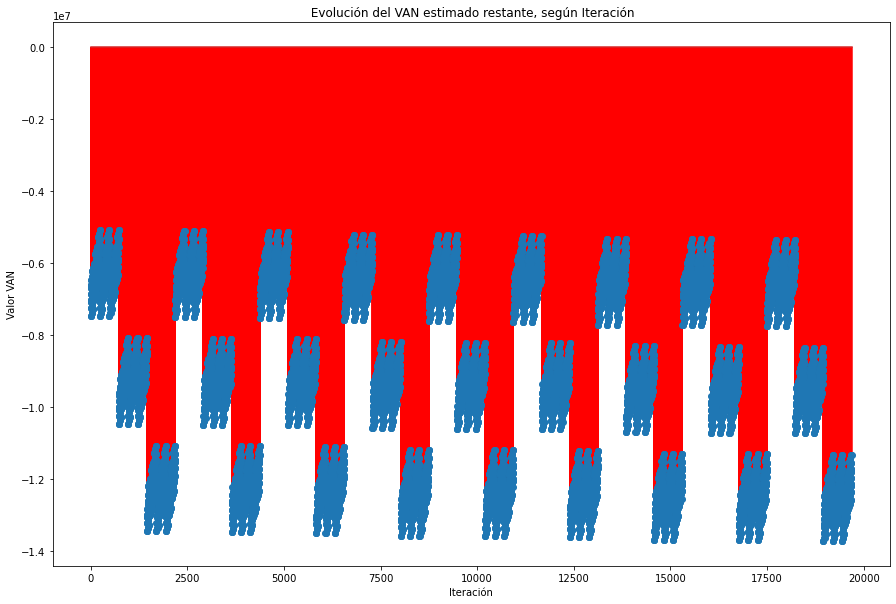

In [20]:
    titulo=' Evolución del VAN estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataVAN['iteracion'], dataVAN['IMPORTES_TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor VAN')
    plt.savefig(rutaSalida+sheet_name+' (VAN).jpg') 
    plt.show()



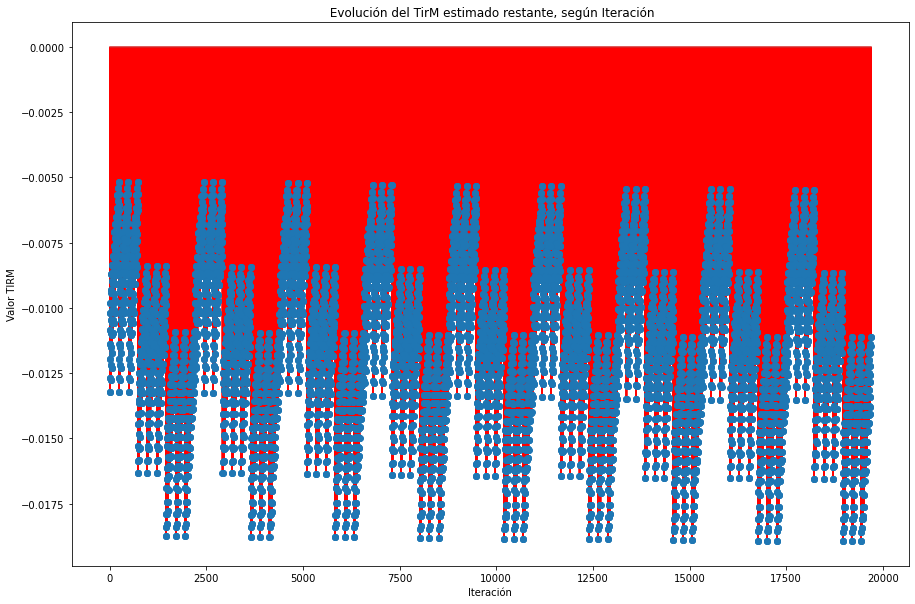

In [21]:
    titulo=' Evolución del TirM estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataTIRM['iteracion'], dataTIRM['IMPORTES_TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor TIRM')
    plt.savefig(rutaSalida+sheet_name+' (TIRM).jpg')
    plt.show()

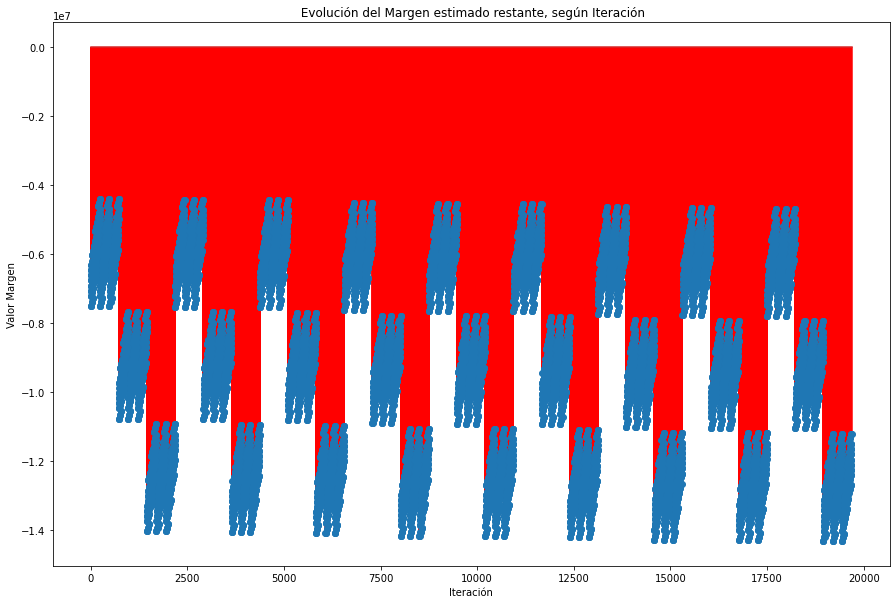

In [22]:
    titulo=' Evolución del Margen estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataMARGEN['iteracion'], dataMARGEN['IMPORTES_TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor Margen')
    plt.savefig(rutaSalida+sheet_name+' (MARGEN).jpg') 
    plt.show()

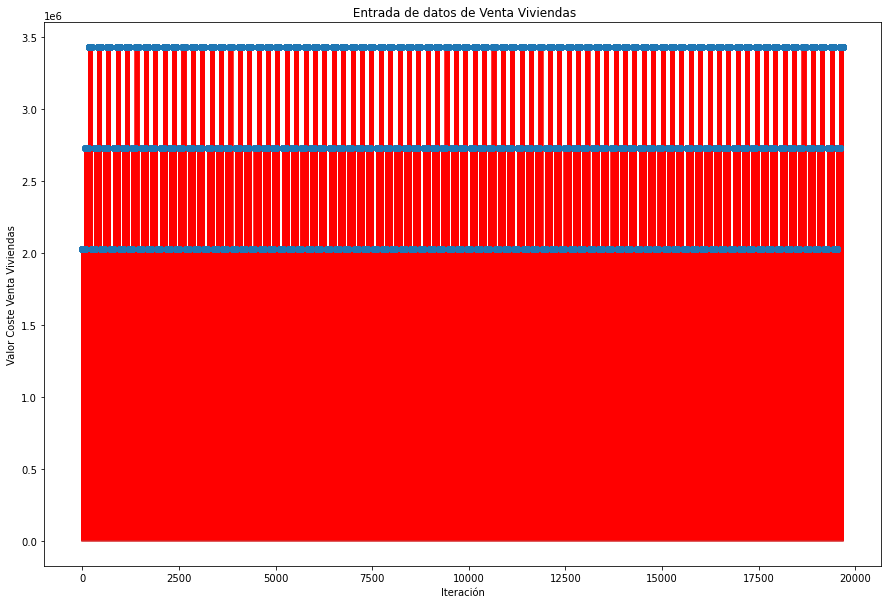

In [23]:
titulo=' Entrada de datos de Venta Viviendas'
plt.subplots(figsize = (15, 10))
plt.stem(dataVentaViviendas['iteracion'], dataVentaViviendas['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Coste Venta Viviendas')
plt.show()


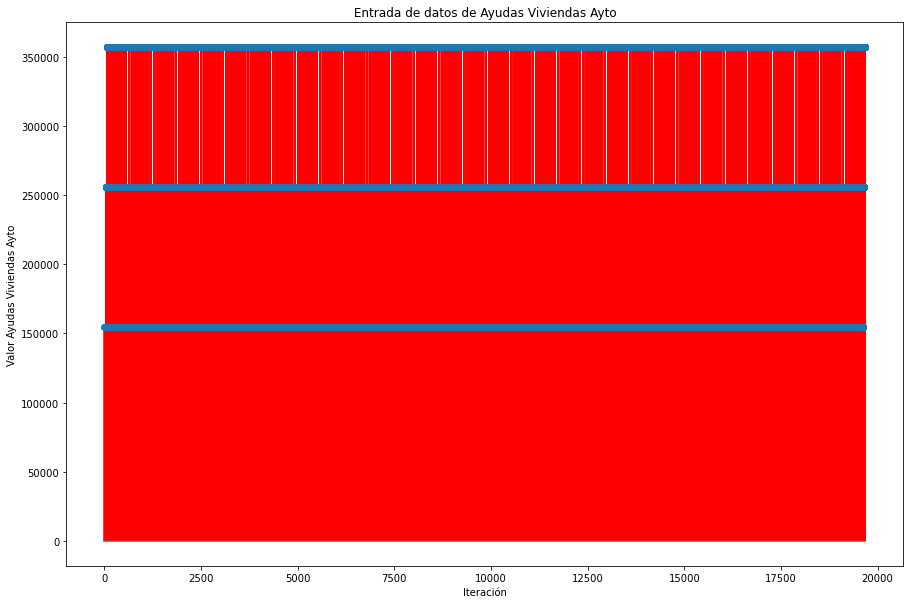

In [24]:
titulo=' Entrada de datos de Ayudas Viviendas Ayto '
plt.subplots(figsize = (15, 10))
plt.stem(dataAyudasViviendasAyto['iteracion'], dataAyudasViviendasAyto['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Ayudas Viviendas Ayto')
plt.show()

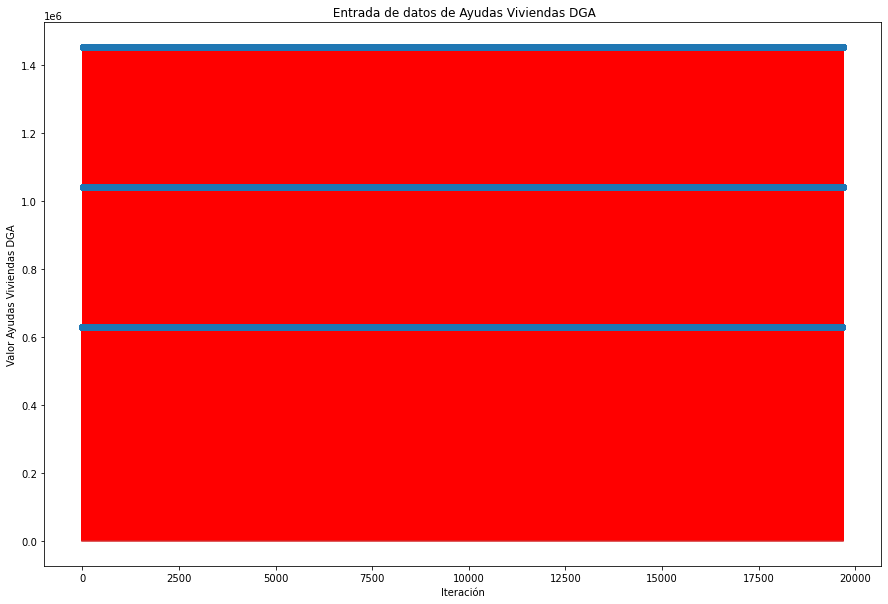

In [25]:
titulo=' Entrada de datos de Ayudas Viviendas DGA'
plt.subplots(figsize = (15, 10))
plt.stem(dataAyudasViviendasDGA['iteracion'], dataAyudasViviendasDGA['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Ayudas Viviendas DGA')
plt.show()


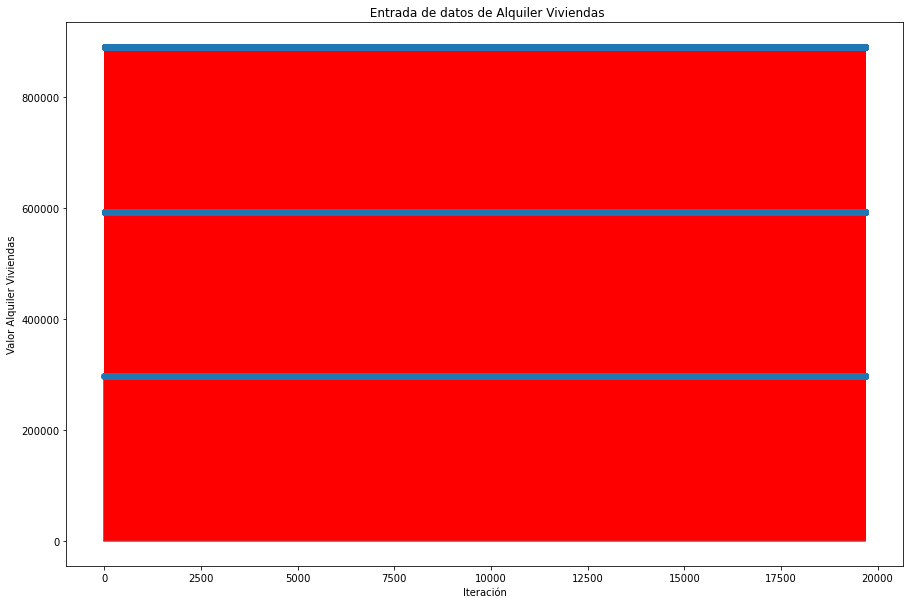

In [26]:
titulo=' Entrada de datos de Alquiler Viviendas'
plt.subplots(figsize = (15, 10))
plt.stem(dataAlquilerViviendas['iteracion'], dataAlquilerViviendas['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Alquiler Viviendas')
plt.show()


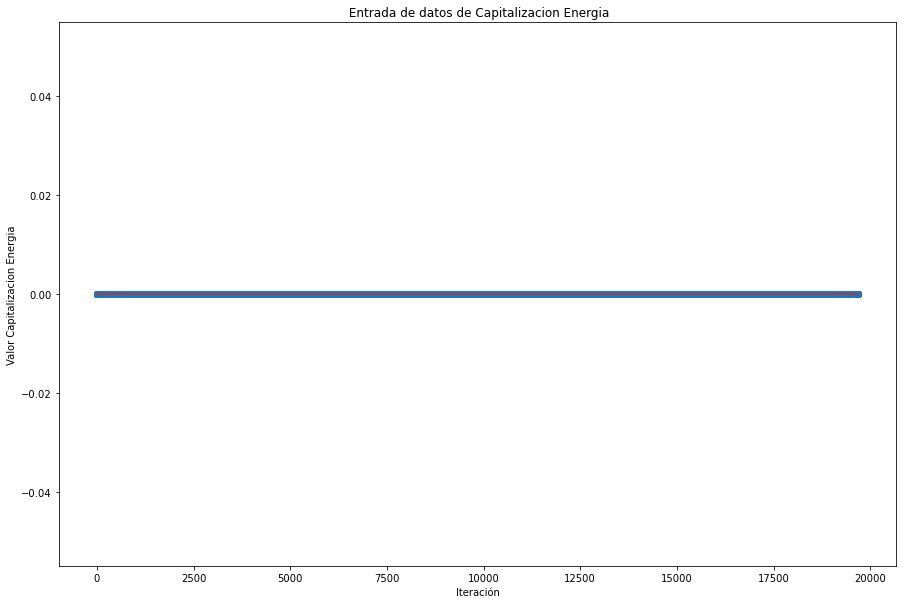

In [27]:
titulo=' Entrada de datos de Capitalizacion Energia'
plt.subplots(figsize = (15, 10))
plt.stem(dataCapitalizacionEnergia['iteracion'], dataCapitalizacionEnergia['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Capitalizacion Energia')
plt.show()

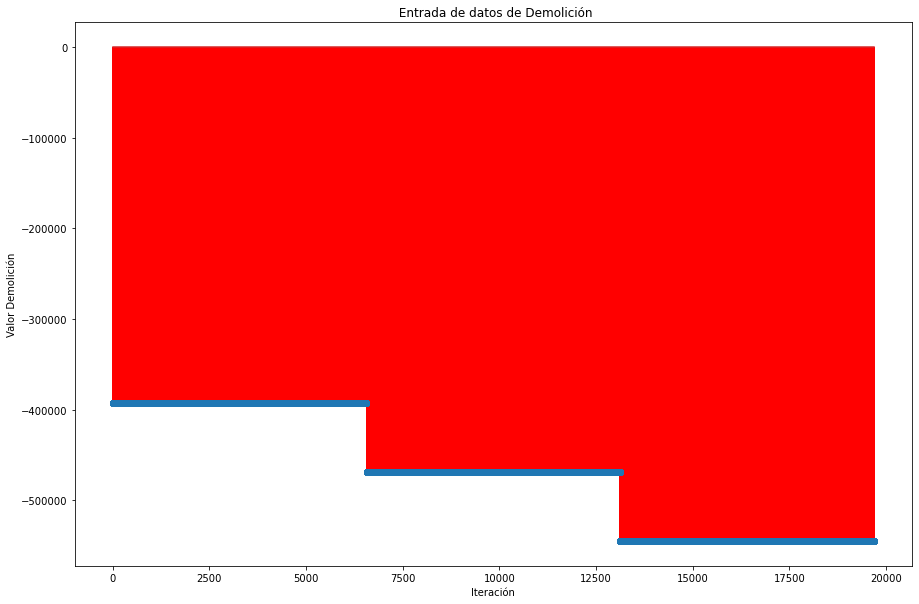

In [28]:
titulo=' Entrada de datos de Demolición'
plt.subplots(figsize = (15, 10))
plt.stem(dataDemolicion['iteracion'], dataDemolicion['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Demolición')
plt.show()

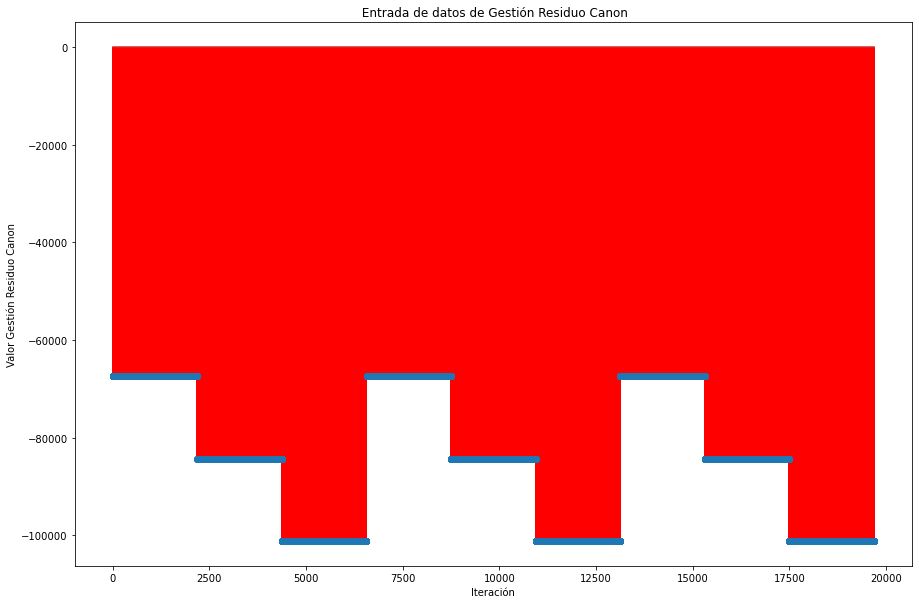

In [29]:
titulo=' Entrada de datos de Gestión Residuo Canon'
plt.subplots(figsize = (15, 10))
plt.stem(dataGestionResiduoCanon['iteracion'], dataGestionResiduoCanon['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Gestión Residuo Canon')
plt.show()

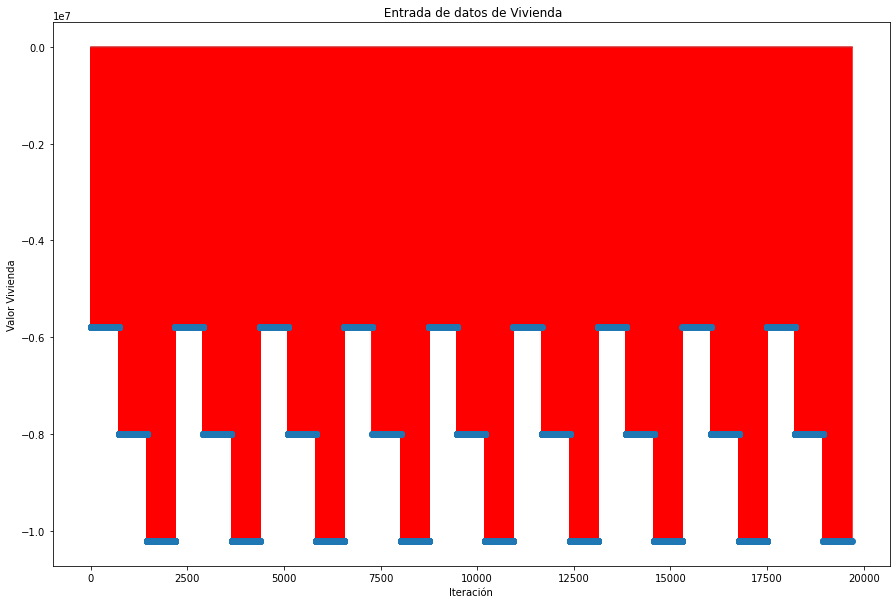

In [30]:
titulo=' Entrada de datos de Vivienda'
plt.subplots(figsize = (15, 10))
plt.stem(dataVivienda['iteracion'], dataVivienda['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Vivienda')
plt.show()

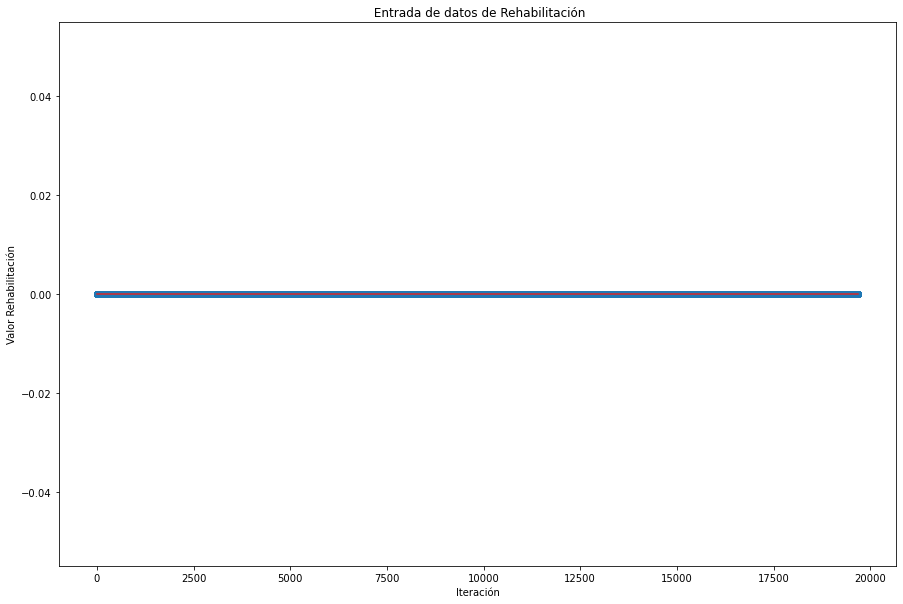

In [31]:
titulo=' Entrada de datos de Rehabilitación'
plt.subplots(figsize = (15, 10))
plt.stem(dataRehabilitacion['iteracion'], dataRehabilitacion['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Rehabilitación')
plt.show()